Triyoza Aprianda

Project-Based Intern Virtual Internship Experience: Data Scientist, Home Credit Indonesia

'Building a Classification model to predict whether or not an applicant of Home Credit Indonesia will be able to repay when applying for the loan'

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import time
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.feature_selection import mutual_info_classif, SelectKBest, VarianceThreshold
from scipy.stats import skew, skewtest, pearsonr,normaltest, t, ttest_ind
from scipy.stats.mstats import spearmanr
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import MinMaxScaler, RobustScaler, OrdinalEncoder, OneHotEncoder
from google.colab import files
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, precision_recall_curve, roc_auc_score, roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier 
from sklearn.svm import SVC

def classif_pr( x,y, estimator, th): 
    y_pred = estimator.predict_proba(x)[:,1] > th
    print(classification_report(y, y_pred, labels = [1,0]))

def classif(x,y, estimator):
    y_pred = estimator.predict(x)
    print(classification_report(y, y_pred, labels = [1,0]))


## Data

In [2]:
# pip install xgboost

In [3]:
# Load Data

In [23]:
from google.colab import drive
drive.mount('/content/gdrive')

train = pd.read_csv('/content/gdrive/MyDrive/Bambams_DSJ/Rakamin_Academy/VIX-DS-HCI/Final_Task/home-credit-default-risk/application_train.csv', delimiter = ',')
test = pd.read_csv('/content/gdrive/MyDrive/Bambams_DSJ/Rakamin_Academy/VIX-DS-HCI/Final_Task/home-credit-default-risk/application_test.csv', delimiter = ',')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [24]:
#train = pd.read_csv('application_train.csv')
#test = pd.read_csv('application_test.csv')

In [25]:
print(train.shape)
print(test.shape)

(307511, 122)
(48744, 121)


In [26]:
pd.set_option('display.max_columns', None)

In [27]:
train.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

In [28]:
test.head()

SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0      100001         Cash loans           F            N               Y   
1      100005         Cash loans           M            N               Y   
2      100013         Cash loans           M            Y               Y   
3      100028         Cash loans           F            N               Y   
4      100038         Cash loans           M            Y               N   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          135000.0    568800.0      20560.5         450000.0   
1             0           99000.0    222768.0      17370.0         180000.0   
2             0          202500.0    663264.0      69777.0         630000.0   
3             2          315000.0   1575000.0      49018.5        1575000.0   
4             1          180000.0    625500.0      32067.0         625500.0   

  NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0   Unaccompanied          Working               Higher education   
1   Unaccompanied          Working  Secondary / secondary special   
2             NaN          Working               Higher education   
3   Unaccompanied          Working  Secondary / secondary special   
4   Unaccompanied          Working  Secondary / secondary special   

  NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0            Married  House / apartment                    0.018850   
1            Married  House / apartment                    0.035792   
2            Married  House / apartment                    0.019101   
3            Married  House / apartment                    0.026392   
4            Married  House / apartment                    0.010032   

   DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  \
0      -19241          -2329            -5170.0             -812          NaN   
1      -18064          -4469            -9118.0            -1623          NaN   
2      -20038          -4458            -2175.0            -3503          5.0   
3      -13976          -1866            -2000.0            -4208          NaN   
4      -13040          -2191            -4000.0            -4262         16.0   

   FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  \
0           1               1                0                 1           0   
1           1               1                0                 1           0   
2           1               1                0                 1           0   
3           1               1                0                 1           1   
4           1               1                1                 1           0   

   FLAG_EMAIL     OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0           1                 NaN              2.0                     2   
1           0  Low-skill Laborers              2.0                     2   
2           0             Drivers              2.0                     2   
3           0         Sales staff              4.0                     2   
4           0                 NaN              3.0                     2   

   REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
0                            2                    TUESDAY   
1                            2                     FRIDAY   
2                            2                     MONDAY   
3                            2                  WEDNESDAY   
4                            2                     FRIDAY   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                       18                           0   
1                        9                           0   
2                       14                           0   
3                       11                           0   
4                        5                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                   

In [29]:
train.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    SK_ID_CURR                    307511 non-null  int64  
 1    TARGET                        307511 non-null  int64  
 2    NAME_CONTRACT_TYPE            307511 non-null  object 
 3    CODE_GENDER                   307511 non-null  object 
 4    FLAG_OWN_CAR                  307511 non-null  object 
 5    FLAG_OWN_REALTY               307511 non-null  object 
 6    CNT_CHILDREN                  307511 non-null  int64  
 7    AMT_INCOME_TOTAL              307511 non-null  float64
 8    AMT_CREDIT                    307511 non-null  float64
 9    AMT_ANNUITY                   307499 non-null  float64
 10   AMT_GOODS_PRICE               307233 non-null  float64
 11   NAME_TYPE_SUITE               306219 non-null  object 
 12   NAME_INCOME_TYPE            

- Drop feature 'SK_ID_CURR'

In [30]:
# train
train.drop(['SK_ID_CURR'], axis =1, inplace=True)

#test
test.drop(['SK_ID_CURR'], axis =1, inplace=True)

- Feature 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', and 'DAYS_ID_PUBLISH' in minus (-) and day format
- Convert them to positive (+) and years format then rename

In [31]:
# train

train['DAYS_BIRTH'] = (train['DAYS_BIRTH']/-365).astype(int)
train['DAYS_EMPLOYED'] = (train['DAYS_EMPLOYED']/-365)#.astype(int)
train['DAYS_REGISTRATION'] = (train['DAYS_REGISTRATION']/-365)#.astype(int)
train['DAYS_ID_PUBLISH'] = (train['DAYS_ID_PUBLISH']/-365)#.astype(int)

train.rename(columns = {'DAYS_BIRTH':'AGE', 'DAYS_EMPLOYED':'YEAR_EMPLOYED',
                       'DAYS_REGISTRATION':'YEAR_REGISTRATION', 'DAYS_ID_PUBLISH':'YEAR_ID_PUBLISH'}, inplace= True)

In [32]:
# test

test['DAYS_BIRTH'] = (test['DAYS_BIRTH']/-365).astype(int)
test['DAYS_EMPLOYED'] = (test['DAYS_EMPLOYED']/-365)#.astype(int)
test['DAYS_REGISTRATION'] = (test['DAYS_REGISTRATION']/-365)#.astype(int)
test['DAYS_ID_PUBLISH'] = (test['DAYS_ID_PUBLISH']/-365)#.astype(int)

test.rename(columns = {'DAYS_BIRTH':'AGE', 'DAYS_EMPLOYED':'YEAR_EMPLOYED',
                       'DAYS_REGISTRATION':'YEAR_REGISTRATION', 'DAYS_ID_PUBLISH':'YEAR_ID_PUBLISH'}, inplace= True)

In [33]:
train.head()

TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0       1         Cash loans           M            N               Y   
1       0         Cash loans           F            N               N   
2       0    Revolving loans           M            Y               Y   
3       0         Cash loans           F            N               Y   
4       0         Cash loans           M            N               Y   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          202500.0    406597.5      24700.5         351000.0   
1             0          270000.0   1293502.5      35698.5        1129500.0   
2             0           67500.0    135000.0       6750.0         135000.0   
3             0          135000.0    312682.5      29686.5         297000.0   
4             0          121500.0    513000.0      21865.5         513000.0   

  NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0   Unaccompanied          Working  Secondary / secondary special   
1          Family    State servant               Higher education   
2   Unaccompanied          Working  Secondary / secondary special   
3   Unaccompanied          Working  Secondary / secondary special   
4   Unaccompanied          Working  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  AGE  \
0  Single / not married  House / apartment                    0.018801   25   
1               Married  House / apartment                    0.003541   45   
2  Single / not married  House / apartment                    0.010032   52   
3        Civil marriage  House / apartment                    0.008019   52   
4  Single / not married  House / apartment                    0.028663   54   

   YEAR_EMPLOYED  YEAR_REGISTRATION  YEAR_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  \
0       1.745205           9.994521         5.808219          NaN           1   
1       3.254795           3.249315         0.797260          NaN           1   
2       0.616438          11.671233         6.934247         26.0           1   
3       8.326027          26.939726         6.676712          NaN           1   
4       8.323288          11.810959         9.473973          NaN           1   

   FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  \
0               1                0                 1           1           0   
1               1                0                 1           1           0   
2               1                1                 1           1           0   
3               1                0                 1           0           0   
4               1                0                 1           0           0   

  OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0        Laborers              1.0                     2   
1      Core staff              2.0                     1   
2        Laborers              1.0                     2   
3        Laborers              2.0                     2   
4      Core staff              1.0                     2   

   REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
0                            2                  WEDNESDAY   
1                            1                     MONDAY   
2                            2                     MONDAY   
3                            2                  WEDNESDAY   
4                            2                   THURSDAY   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                       10                           0   
1                       11                           0   
2                        9                           0   
3                       17                           0   
4                       11                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                           0                            0   
1                           0 

In [34]:
train.head()

TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0       1         Cash loans           M            N               Y   
1       0         Cash loans           F            N               N   
2       0    Revolving loans           M            Y               Y   
3       0         Cash loans           F            N               Y   
4       0         Cash loans           M            N               Y   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          202500.0    406597.5      24700.5         351000.0   
1             0          270000.0   1293502.5      35698.5        1129500.0   
2             0           67500.0    135000.0       6750.0         135000.0   
3             0          135000.0    312682.5      29686.5         297000.0   
4             0          121500.0    513000.0      21865.5         513000.0   

  NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0   Unaccompanied          Working  Secondary / secondary special   
1          Family    State servant               Higher education   
2   Unaccompanied          Working  Secondary / secondary special   
3   Unaccompanied          Working  Secondary / secondary special   
4   Unaccompanied          Working  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  AGE  \
0  Single / not married  House / apartment                    0.018801   25   
1               Married  House / apartment                    0.003541   45   
2  Single / not married  House / apartment                    0.010032   52   
3        Civil marriage  House / apartment                    0.008019   52   
4  Single / not married  House / apartment                    0.028663   54   

   YEAR_EMPLOYED  YEAR_REGISTRATION  YEAR_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  \
0       1.745205           9.994521         5.808219          NaN           1   
1       3.254795           3.249315         0.797260          NaN           1   
2       0.616438          11.671233         6.934247         26.0           1   
3       8.326027          26.939726         6.676712          NaN           1   
4       8.323288          11.810959         9.473973          NaN           1   

   FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  \
0               1                0                 1           1           0   
1               1                0                 1           1           0   
2               1                1                 1           1           0   
3               1                0                 1           0           0   
4               1                0                 1           0           0   

  OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0        Laborers              1.0                     2   
1      Core staff              2.0                     1   
2        Laborers              1.0                     2   
3        Laborers              2.0                     2   
4      Core staff              1.0                     2   

   REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
0                            2                  WEDNESDAY   
1                            1                     MONDAY   
2                            2                     MONDAY   
3                            2                  WEDNESDAY   
4                            2                   THURSDAY   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                       10                           0   
1                       11                           0   
2                        9                           0   
3                       17                           0   
4                       11                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                           0                            0   
1                           0 

## EDA

In [19]:
# Split numerical and categorical data 
train_num = train.select_dtypes('number')
train_cat = train.select_dtypes('object')

In [97]:
 train_num.columns.values

array(['TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE',
       'AGE', 'YEAR_EMPLOYED', 'YEAR_REGISTRATION', 'YEAR_ID_PUBLISH',
       'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_1', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG',
       'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG',
       'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG',
       'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_

In [98]:
# train_cat.columns

### Univariat Numerik

In [99]:
# Identifikasi whisker

def whisk(x):
    q1 = np.nanpercentile(x,25)
    q3 = np.nanpercentile(x,75)
    iqr = q3 - q1
    lower_fence = q1 - 1.5*iqr
    upper_fence = q3 + 1.5*iqr

    #identifikasi non outlier menngunakan lower dan upper whisker
    non_outlier =  []
    for y in x:
        if y >= lower_fence:
            if y <= upper_fence:
                non_outlier.append(y)
    lower_whisker = np.min(non_outlier)
    upper_whisker = np.max(non_outlier)

    #identifikasi outlier menggunakan lower dan upper fence
    outlier = []
    for y in x:
        if y < lower_fence:
            outlier.append(y)
        if y > upper_fence:
            outlier.append(y)

    #print
    print('lower whisker: {}'.format(lower_whisker))
    print('upper whisker: {}'.format(upper_whisker))

    outlier_count = len(outlier)
    print('outlier counts: {}'.format(outlier_count))
    #if outlier_count > 0:
        # print('Outlier list:  {}'.format(outlier))
    #else:
        #print('No Outlier')

1 | TARGET


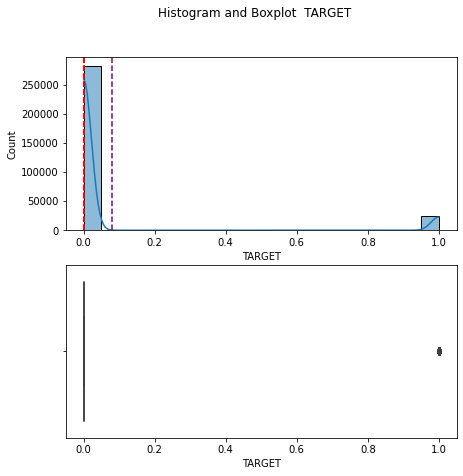

Basic statistical metrics
count    307511.000000
mean          0.080729
std           0.272419
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: TARGET, dtype: float64

Whisker and Outlier
lower whisker: 0
upper whisker: 0
outlier counts: 24825

Skew and Skew test
Data skewed, with skew: 3.0781436510283156
___________________________________________________________________________

2 | CNT_CHILDREN


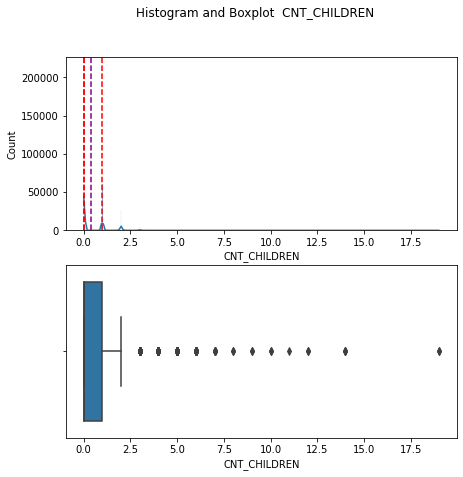

Basic statistical metrics
count    307511.000000
mean          0.417052
std           0.722121
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          19.000000
Name: CNT_CHILDREN, dtype: float64

Whisker and Outlier
lower whisker: 0
upper whisker: 2
outlier counts: 4272

Skew and Skew test
Data skewed, with skew: 1.9745948378093714
___________________________________________________________________________

3 | AMT_INCOME_TOTAL


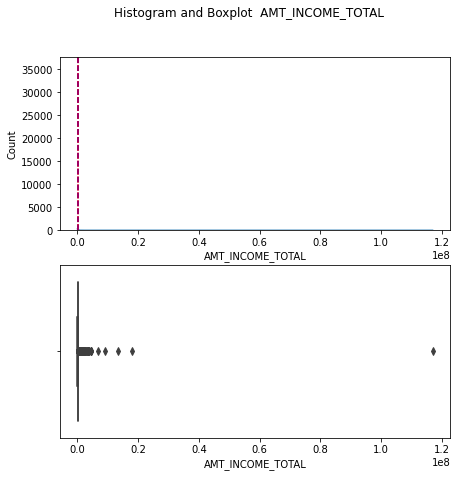

Basic statistical metrics
count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

Whisker and Outlier
lower whisker: 25650.0
upper whisker: 337500.0
outlier counts: 14035

Skew and Skew test
Data skewed, with skew: 391.55774412283097
___________________________________________________________________________

4 | AMT_CREDIT


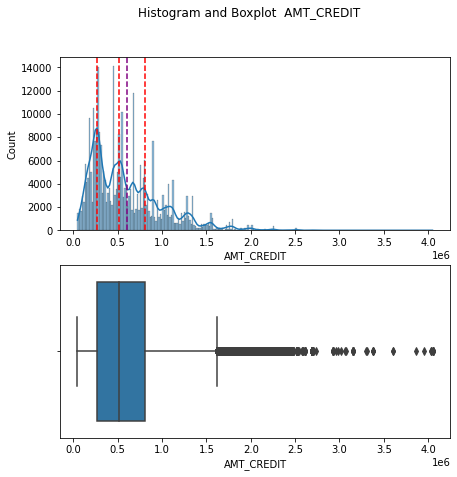

Basic statistical metrics
count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

Whisker and Outlier
lower whisker: 45000.0
upper whisker: 1616278.5
outlier counts: 6562

Skew and Skew test
Data skewed, with skew: 1.234772474032497
___________________________________________________________________________

5 | AMT_ANNUITY


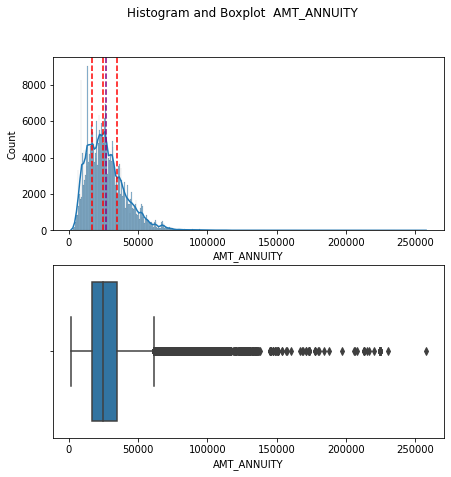

Basic statistical metrics
count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

Whisker and Outlier
lower whisker: 1615.5
upper whisker: 61699.5
outlier counts: 7504

Skew and Skew test
Data not skewed
___________________________________________________________________________

6 | AMT_GOODS_PRICE


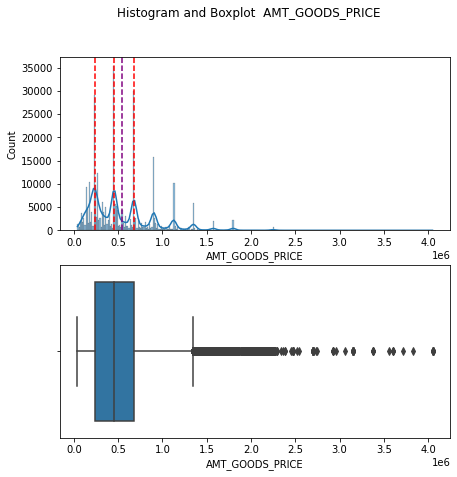

Basic statistical metrics
count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

Whisker and Outlier
lower whisker: 40500.0
upper whisker: 1341000.0
outlier counts: 14728

Skew and Skew test
Data not skewed
___________________________________________________________________________

7 | REGION_POPULATION_RELATIVE


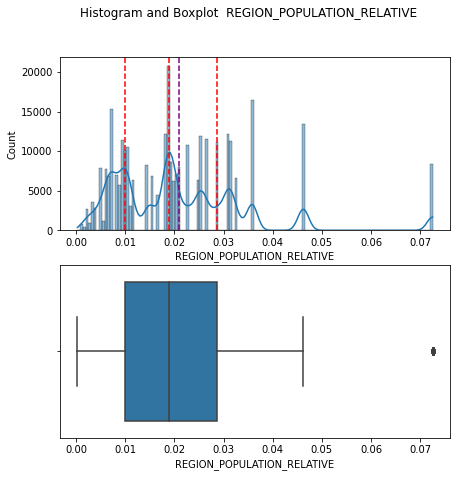

Basic statistical metrics
count    307511.000000
mean          0.020868
std           0.013831
min           0.000290
25%           0.010006
50%           0.018850
75%           0.028663
max           0.072508
Name: REGION_POPULATION_RELATIVE, dtype: float64

Whisker and Outlier
lower whisker: 0.00029
upper whisker: 0.04622
outlier counts: 8412

Skew and Skew test
Data skewed, with skew: 1.4880012623794292
___________________________________________________________________________

8 | AGE


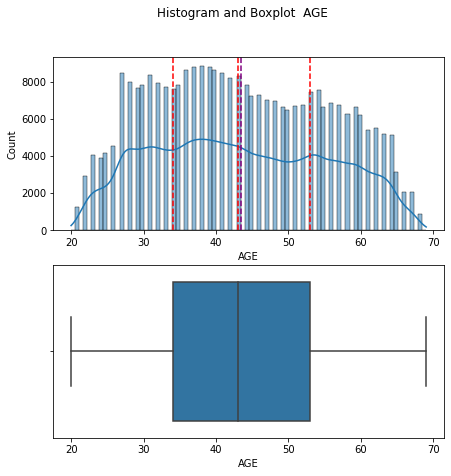

Basic statistical metrics
count    307511.000000
mean         43.435968
std          11.954593
min          20.000000
25%          34.000000
50%          43.000000
75%          53.000000
max          69.000000
Name: AGE, dtype: float64

Whisker and Outlier
lower whisker: 20
upper whisker: 69
outlier counts: 0

Skew and Skew test
Data skewed, with skew: 0.1162264239279713
___________________________________________________________________________

9 | YEAR_EMPLOYED


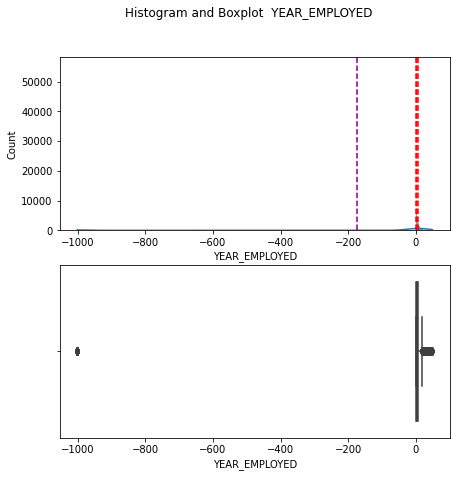

Basic statistical metrics
count    307511.000000
mean       -174.835742
std         387.056895
min       -1000.665753
25%           0.791781
50%           3.323288
75%           7.561644
max          49.073973
Name: YEAR_EMPLOYED, dtype: float64

Whisker and Outlier
lower whisker: -0.0
upper whisker: 17.715068493150685
outlier counts: 72217

Skew and Skew test
Data skewed, with skew: -1.6643380795860176
___________________________________________________________________________

10 | YEAR_REGISTRATION


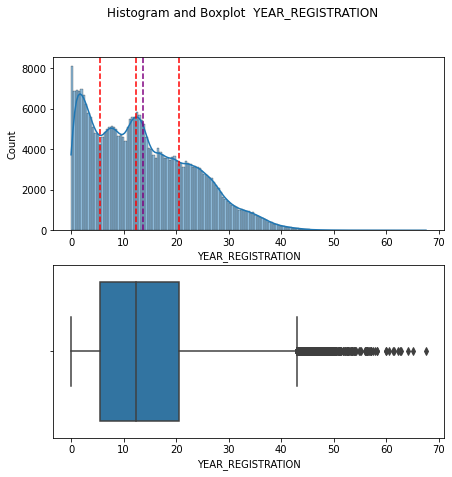

Basic statistical metrics
count    307511.000000
mean         13.660604
std           9.651743
min          -0.000000
25%           5.506849
50%          12.339726
75%          20.491781
max          67.594521
Name: YEAR_REGISTRATION, dtype: float64

Whisker and Outlier
lower whisker: -0.0
upper whisker: 42.95890410958904
outlier counts: 659

Skew and Skew test
Data skewed, with skew: 0.5908687335336353
___________________________________________________________________________

11 | YEAR_ID_PUBLISH


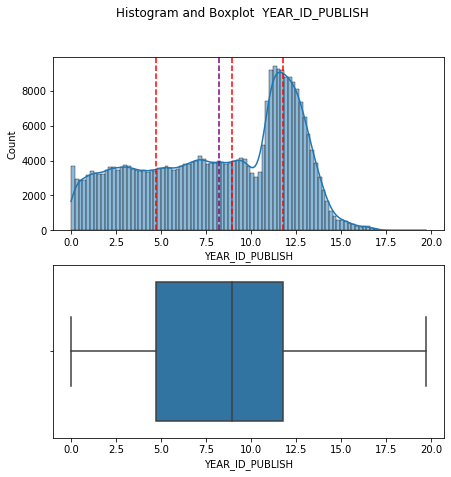

Basic statistical metrics
count    307511.000000
mean          8.203294
std           4.135481
min          -0.000000
25%           4.712329
50%           8.915068
75%          11.778082
max          19.717808
Name: YEAR_ID_PUBLISH, dtype: float64

Whisker and Outlier
lower whisker: -0.0
upper whisker: 19.71780821917808
outlier counts: 0

Skew and Skew test
Data skewed, with skew: -0.3493257892250913
___________________________________________________________________________

12 | OWN_CAR_AGE


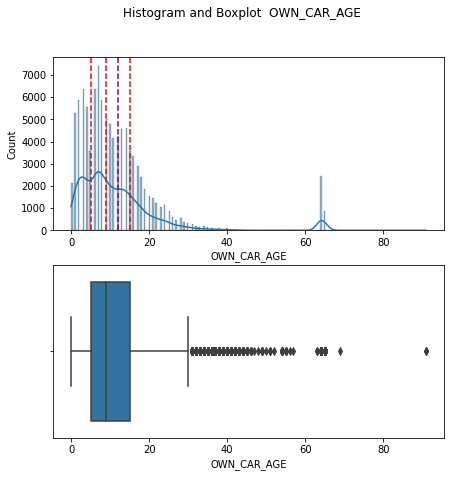

Basic statistical metrics
count    104582.000000
mean         12.061091
std          11.944812
min           0.000000
25%           5.000000
50%           9.000000
75%          15.000000
max          91.000000
Name: OWN_CAR_AGE, dtype: float64

Whisker and Outlier
lower whisker: 0.0
upper whisker: 30.0
outlier counts: 4932

Skew and Skew test
Data not skewed
___________________________________________________________________________

13 | FLAG_MOBIL


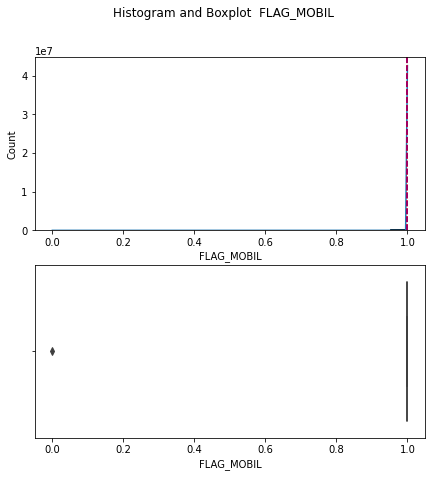

Basic statistical metrics
count    307511.000000
mean          0.999997
std           0.001803
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: FLAG_MOBIL, dtype: float64

Whisker and Outlier
lower whisker: 1
upper whisker: 1
outlier counts: 1

Skew and Skew test
Data skewed, with skew: -554.5340386335657
___________________________________________________________________________

14 | FLAG_EMP_PHONE


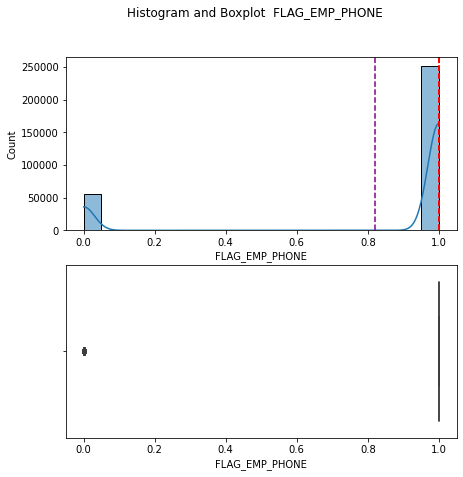

Basic statistical metrics
count    307511.000000
mean          0.819889
std           0.384280
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: FLAG_EMP_PHONE, dtype: float64

Whisker and Outlier
lower whisker: 1
upper whisker: 1
outlier counts: 55386

Skew and Skew test
Data skewed, with skew: -1.6648783404534215
___________________________________________________________________________

15 | FLAG_WORK_PHONE


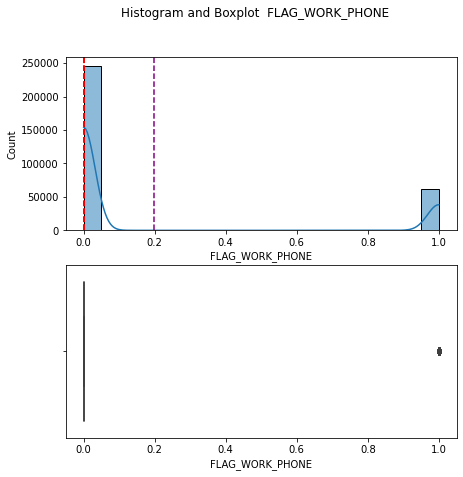

Basic statistical metrics
count    307511.000000
mean          0.199368
std           0.399526
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: FLAG_WORK_PHONE, dtype: float64

Whisker and Outlier
lower whisker: 0
upper whisker: 0
outlier counts: 61308

Skew and Skew test
Data skewed, with skew: 1.5049425532424379
___________________________________________________________________________

16 | FLAG_CONT_MOBILE


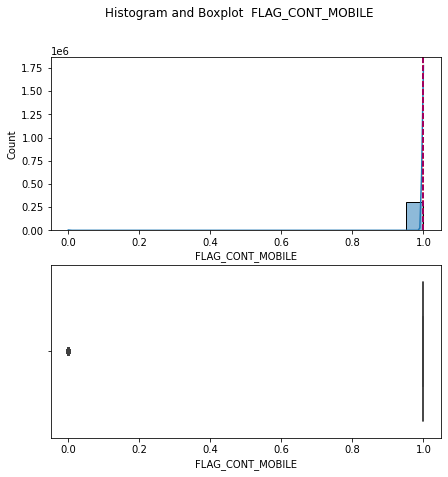

Basic statistical metrics
count    307511.000000
mean          0.998133
std           0.043164
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: FLAG_CONT_MOBILE, dtype: float64

Whisker and Outlier
lower whisker: 1
upper whisker: 1
outlier counts: 574

Skew and Skew test
Data skewed, with skew: -23.081059758337734
___________________________________________________________________________

17 | FLAG_PHONE


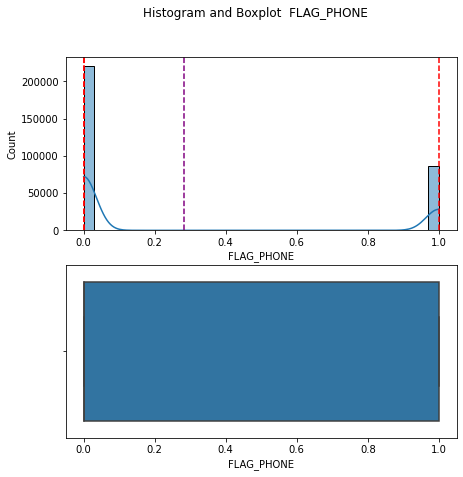

Basic statistical metrics
count    307511.000000
mean          0.281066
std           0.449521
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: FLAG_PHONE, dtype: float64

Whisker and Outlier
lower whisker: 0
upper whisker: 1
outlier counts: 0

Skew and Skew test
Data skewed, with skew: 0.9740777775392261
___________________________________________________________________________

18 | FLAG_EMAIL


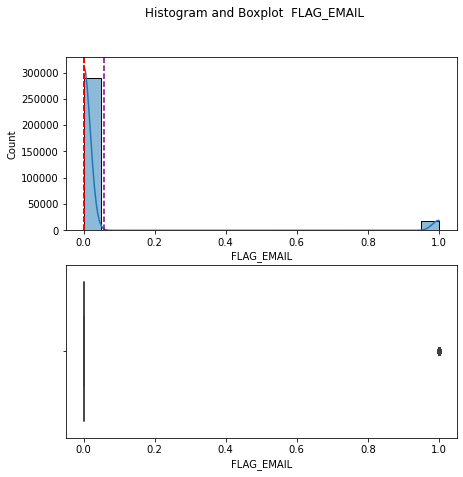

Basic statistical metrics
count    307511.000000
mean          0.056720
std           0.231307
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: FLAG_EMAIL, dtype: float64

Whisker and Outlier
lower whisker: 0
upper whisker: 0
outlier counts: 17442

Skew and Skew test
Data skewed, with skew: 3.8328344790010034
___________________________________________________________________________

19 | CNT_FAM_MEMBERS


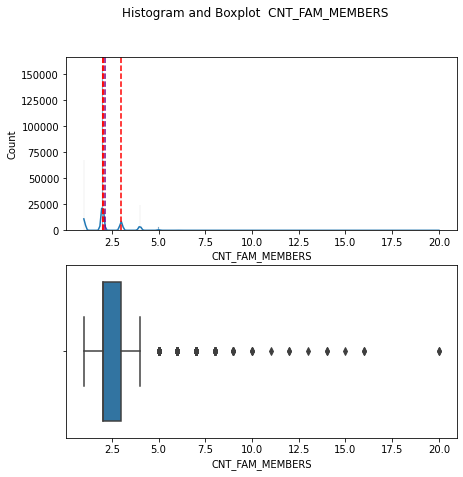

Basic statistical metrics
count    307509.000000
mean          2.152665
std           0.910682
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          20.000000
Name: CNT_FAM_MEMBERS, dtype: float64

Whisker and Outlier
lower whisker: 1.0
upper whisker: 4.0
outlier counts: 4007

Skew and Skew test
Data not skewed
___________________________________________________________________________

20 | REGION_RATING_CLIENT


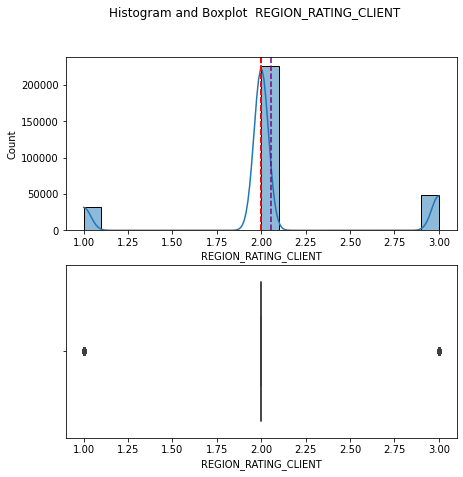

Basic statistical metrics
count    307511.000000
mean          2.052463
std           0.509034
min           1.000000
25%           2.000000
50%           2.000000
75%           2.000000
max           3.000000
Name: REGION_RATING_CLIENT, dtype: float64

Whisker and Outlier
lower whisker: 2
upper whisker: 2
outlier counts: 80527

Skew and Skew test
Data skewed, with skew: 0.08746792304913137
___________________________________________________________________________

21 | REGION_RATING_CLIENT_W_CITY


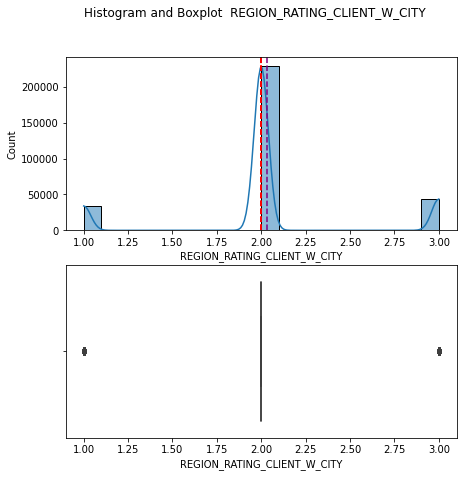

Basic statistical metrics
count    307511.000000
mean          2.031521
std           0.502737
min           1.000000
25%           2.000000
50%           2.000000
75%           2.000000
max           3.000000
Name: REGION_RATING_CLIENT_W_CITY, dtype: float64

Whisker and Outlier
lower whisker: 2
upper whisker: 2
outlier counts: 78027

Skew and Skew test
Data skewed, with skew: 0.059729520794557595
___________________________________________________________________________

22 | HOUR_APPR_PROCESS_START


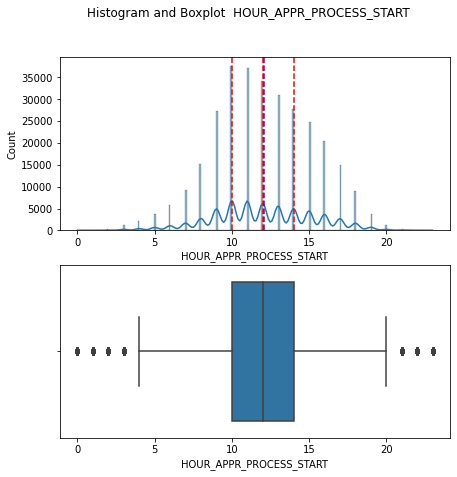

Basic statistical metrics
count    307511.000000
mean         12.063419
std           3.265832
min           0.000000
25%          10.000000
50%          12.000000
75%          14.000000
max          23.000000
Name: HOUR_APPR_PROCESS_START, dtype: float64

Whisker and Outlier
lower whisker: 4
upper whisker: 20
outlier counts: 2257

Skew and Skew test
Data skewed, with skew: -0.028024322760699688
___________________________________________________________________________

23 | REG_REGION_NOT_LIVE_REGION


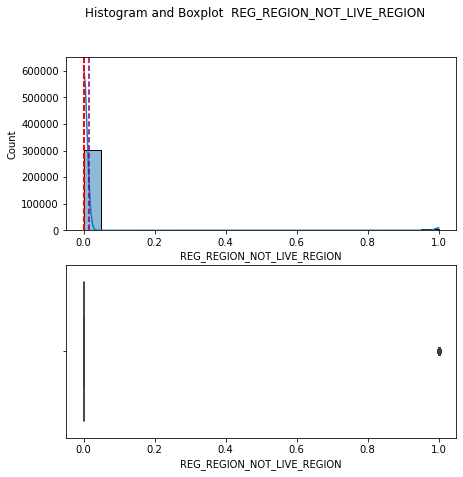

Basic statistical metrics
count    307511.000000
mean          0.015144
std           0.122126
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: REG_REGION_NOT_LIVE_REGION, dtype: float64

Whisker and Outlier
lower whisker: 0
upper whisker: 0
outlier counts: 4657

Skew and Skew test
Data skewed, with skew: 7.940237521184951
___________________________________________________________________________

24 | REG_REGION_NOT_WORK_REGION


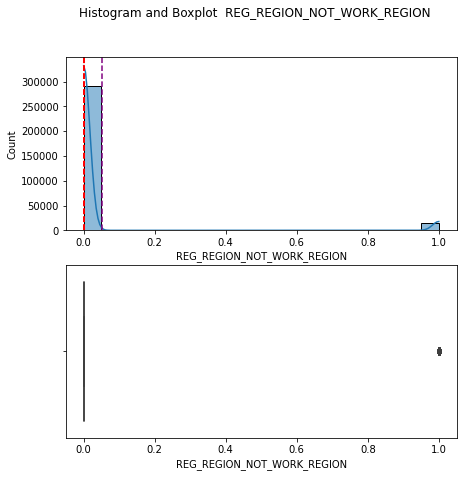

Basic statistical metrics
count    307511.000000
mean          0.050769
std           0.219526
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: REG_REGION_NOT_WORK_REGION, dtype: float64

Whisker and Outlier
lower whisker: 0
upper whisker: 0
outlier counts: 15612

Skew and Skew test
Data skewed, with skew: 4.09274678347473
___________________________________________________________________________

25 | LIVE_REGION_NOT_WORK_REGION


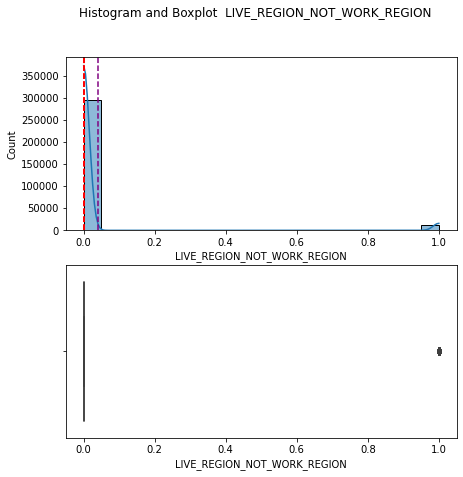

Basic statistical metrics
count    307511.000000
mean          0.040659
std           0.197499
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: LIVE_REGION_NOT_WORK_REGION, dtype: float64

Whisker and Outlier
lower whisker: 0
upper whisker: 0
outlier counts: 12503

Skew and Skew test
Data skewed, with skew: 4.651597479036471
___________________________________________________________________________

26 | REG_CITY_NOT_LIVE_CITY


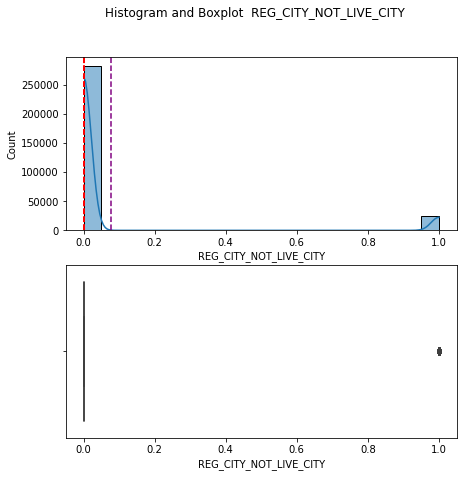

Basic statistical metrics
count    307511.000000
mean          0.078173
std           0.268444
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: REG_CITY_NOT_LIVE_CITY, dtype: float64

Whisker and Outlier
lower whisker: 0
upper whisker: 0
outlier counts: 24039

Skew and Skew test
Data skewed, with skew: 3.142765196713042
___________________________________________________________________________

27 | REG_CITY_NOT_WORK_CITY


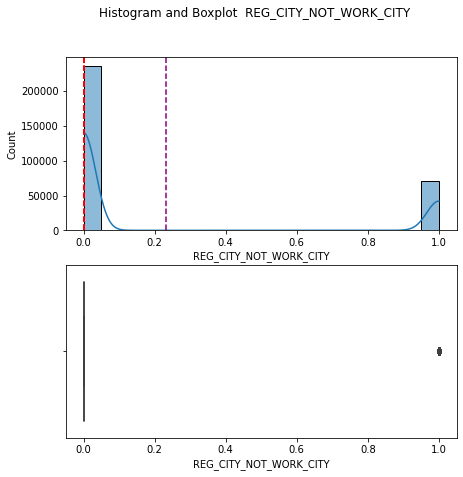

Basic statistical metrics
count    307511.000000
mean          0.230454
std           0.421124
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: REG_CITY_NOT_WORK_CITY, dtype: float64

Whisker and Outlier
lower whisker: 0
upper whisker: 0
outlier counts: 70867

Skew and Skew test
Data skewed, with skew: 1.280131260849252
___________________________________________________________________________

28 | LIVE_CITY_NOT_WORK_CITY


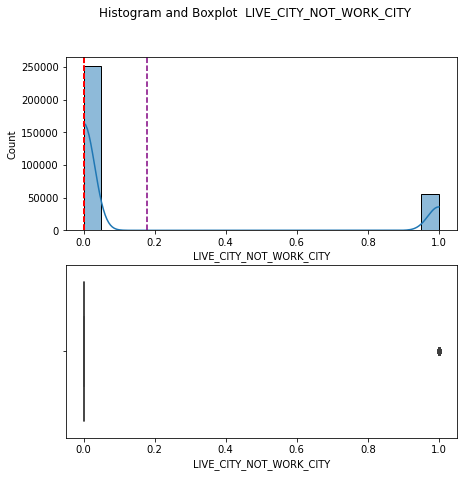

Basic statistical metrics
count    307511.000000
mean          0.179555
std           0.383817
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: LIVE_CITY_NOT_WORK_CITY, dtype: float64

Whisker and Outlier
lower whisker: 0
upper whisker: 0
outlier counts: 55215

Skew and Skew test
Data skewed, with skew: 1.6697868495877215
___________________________________________________________________________

29 | EXT_SOURCE_1


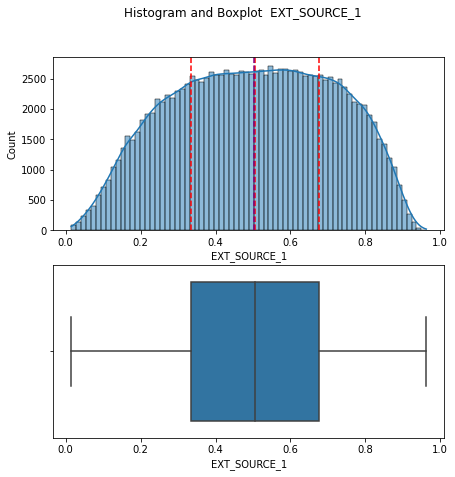

Basic statistical metrics
count    134133.000000
mean          0.502130
std           0.211062
min           0.014568
25%           0.334007
50%           0.505998
75%           0.675053
max           0.962693
Name: EXT_SOURCE_1, dtype: float64

Whisker and Outlier
lower whisker: 0.0145681324124455
upper whisker: 0.962692770561306
outlier counts: 0

Skew and Skew test
Data not skewed
___________________________________________________________________________

30 | EXT_SOURCE_2


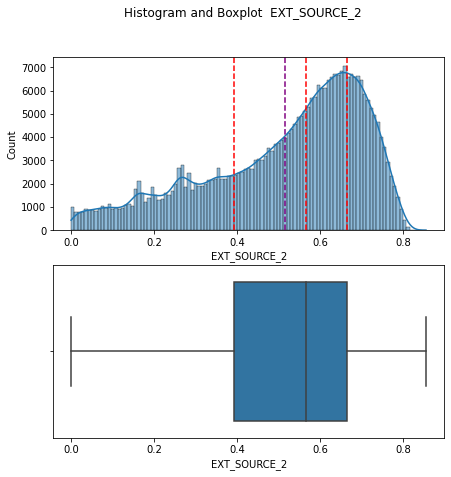

Basic statistical metrics
count    3.068510e+05
mean     5.143927e-01
std      1.910602e-01
min      8.173617e-08
25%      3.924574e-01
50%      5.659614e-01
75%      6.636171e-01
max      8.549997e-01
Name: EXT_SOURCE_2, dtype: float64

Whisker and Outlier
lower whisker: 8.173616518884397e-08
upper whisker: 0.8549996664047012
outlier counts: 0

Skew and Skew test
Data not skewed
___________________________________________________________________________

31 | EXT_SOURCE_3


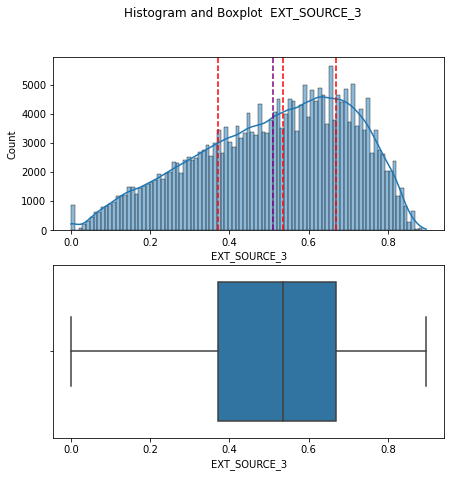

Basic statistical metrics
count    246546.000000
mean          0.510853
std           0.194844
min           0.000527
25%           0.370650
50%           0.535276
75%           0.669057
max           0.896010
Name: EXT_SOURCE_3, dtype: float64

Whisker and Outlier
lower whisker: 0.0005272652387098
upper whisker: 0.8960095494948396
outlier counts: 0

Skew and Skew test
Data not skewed
___________________________________________________________________________

32 | APARTMENTS_AVG


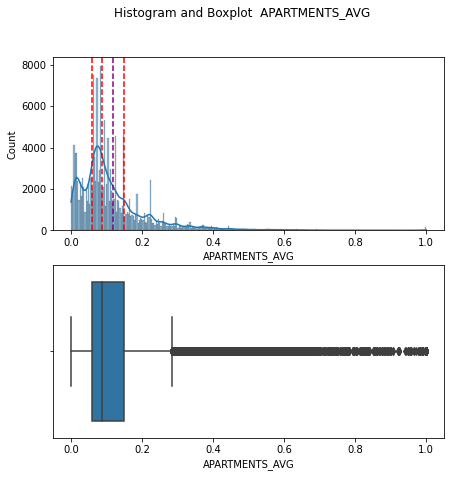

Basic statistical metrics
count    151450.00000
mean          0.11744
std           0.10824
min           0.00000
25%           0.05770
50%           0.08760
75%           0.14850
max           1.00000
Name: APARTMENTS_AVG, dtype: float64

Whisker and Outlier
lower whisker: 0.0
upper whisker: 0.2845
outlier counts: 10655

Skew and Skew test
Data not skewed
___________________________________________________________________________

33 | BASEMENTAREA_AVG


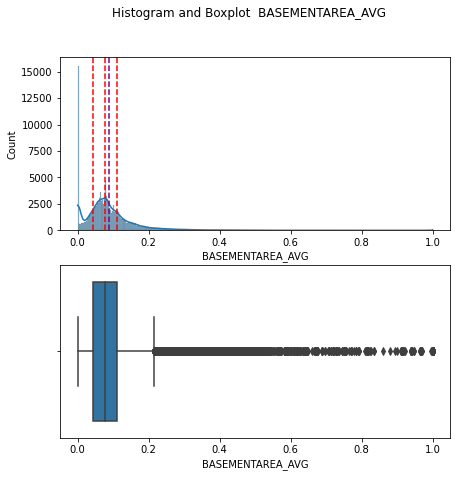

Basic statistical metrics
count    127568.000000
mean          0.088442
std           0.082438
min           0.000000
25%           0.044200
50%           0.076300
75%           0.112200
max           1.000000
Name: BASEMENTAREA_AVG, dtype: float64

Whisker and Outlier
lower whisker: 0.0
upper whisker: 0.2141
outlier counts: 7190

Skew and Skew test
Data not skewed
___________________________________________________________________________

34 | YEARS_BEGINEXPLUATATION_AVG


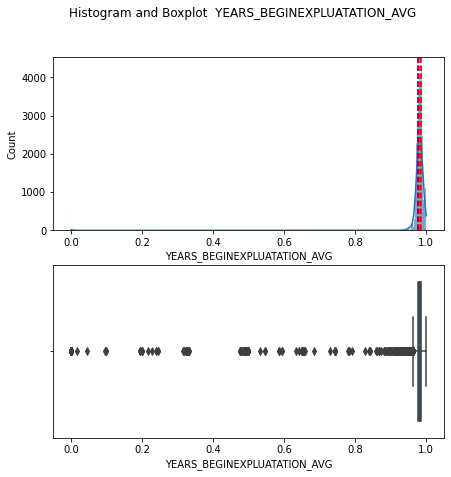

Basic statistical metrics
count    157504.000000
mean          0.977735
std           0.059223
min           0.000000
25%           0.976700
50%           0.981600
75%           0.986600
max           1.000000
Name: YEARS_BEGINEXPLUATATION_AVG, dtype: float64

Whisker and Outlier
lower whisker: 0.9622
upper whisker: 1.0
outlier counts: 4784

Skew and Skew test
Data not skewed
___________________________________________________________________________

35 | YEARS_BUILD_AVG


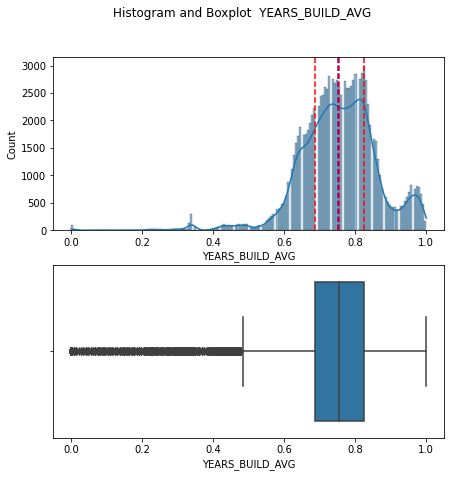

Basic statistical metrics
count    103023.000000
mean          0.752471
std           0.113280
min           0.000000
25%           0.687200
50%           0.755200
75%           0.823200
max           1.000000
Name: YEARS_BUILD_AVG, dtype: float64

Whisker and Outlier
lower whisker: 0.4832
upper whisker: 1.0
outlier counts: 2154

Skew and Skew test
Data not skewed
___________________________________________________________________________

36 | COMMONAREA_AVG


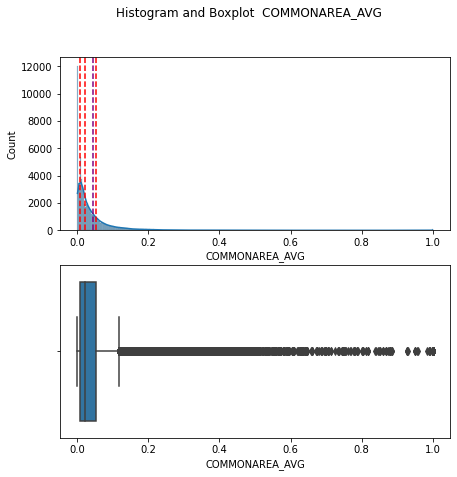

Basic statistical metrics
count    92646.000000
mean         0.044621
std          0.076036
min          0.000000
25%          0.007800
50%          0.021100
75%          0.051500
max          1.000000
Name: COMMONAREA_AVG, dtype: float64

Whisker and Outlier
lower whisker: 0.0
upper whisker: 0.117
outlier counts: 7942

Skew and Skew test
Data not skewed
___________________________________________________________________________

37 | ELEVATORS_AVG


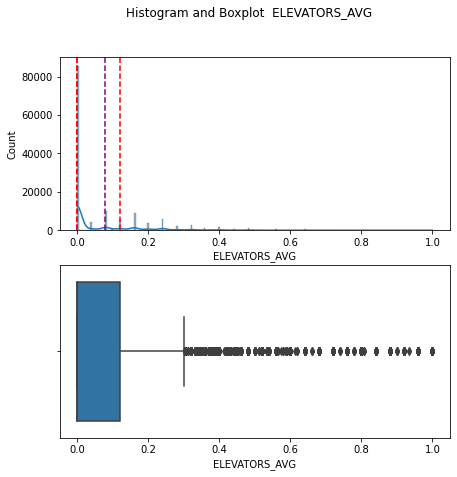

Basic statistical metrics
count    143620.000000
mean          0.078942
std           0.134576
min           0.000000
25%           0.000000
50%           0.000000
75%           0.120000
max           1.000000
Name: ELEVATORS_AVG, dtype: float64

Whisker and Outlier
lower whisker: 0.0
upper whisker: 0.3
outlier counts: 10420

Skew and Skew test
Data not skewed
___________________________________________________________________________

38 | ENTRANCES_AVG


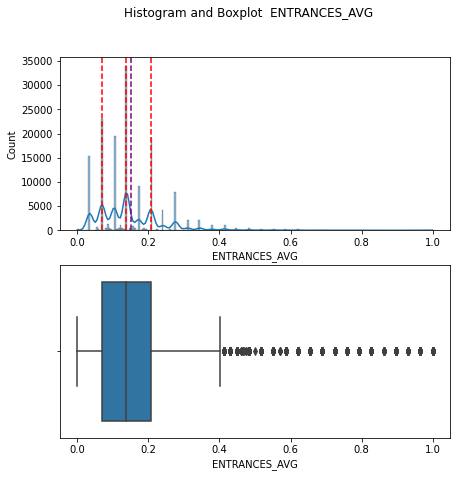

Basic statistical metrics
count    152683.000000
mean          0.149725
std           0.100049
min           0.000000
25%           0.069000
50%           0.137900
75%           0.206900
max           1.000000
Name: ENTRANCES_AVG, dtype: float64

Whisker and Outlier
lower whisker: 0.0
upper whisker: 0.4021
outlier counts: 3882

Skew and Skew test
Data not skewed
___________________________________________________________________________

39 | FLOORSMAX_AVG


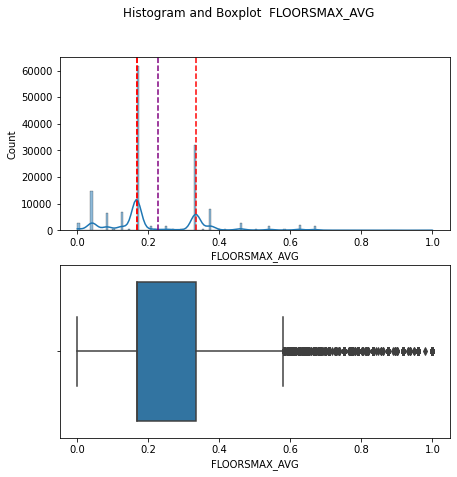

Basic statistical metrics
count    154491.000000
mean          0.226282
std           0.144641
min           0.000000
25%           0.166700
50%           0.166700
75%           0.333300
max           1.000000
Name: FLOORSMAX_AVG, dtype: float64

Whisker and Outlier
lower whisker: 0.0
upper whisker: 0.5792
outlier counts: 5215

Skew and Skew test
Data not skewed
___________________________________________________________________________

40 | FLOORSMIN_AVG


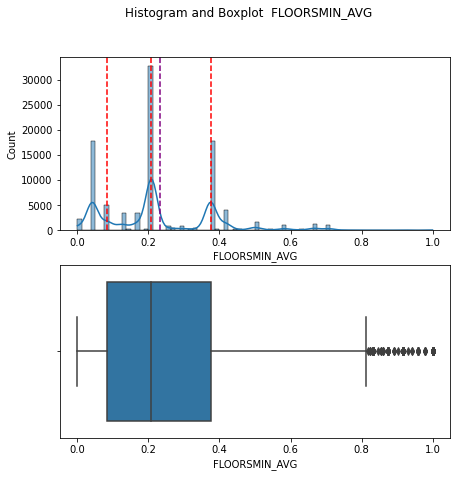

Basic statistical metrics
count    98869.000000
mean         0.231894
std          0.161380
min          0.000000
25%          0.083300
50%          0.208300
75%          0.375000
max          1.000000
Name: FLOORSMIN_AVG, dtype: float64

Whisker and Outlier
lower whisker: 0.0
upper whisker: 0.8125
outlier counts: 343

Skew and Skew test
Data not skewed
___________________________________________________________________________

41 | LANDAREA_AVG


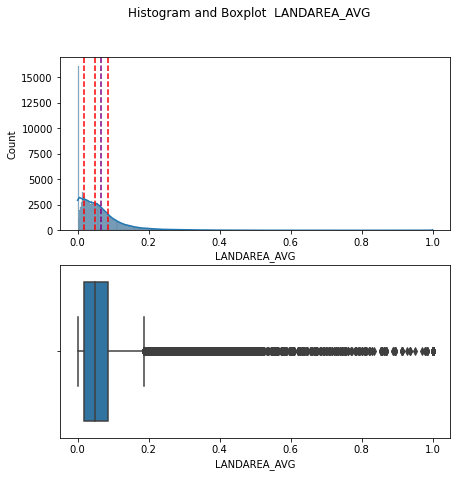

Basic statistical metrics
count    124921.000000
mean          0.066333
std           0.081184
min           0.000000
25%           0.018700
50%           0.048100
75%           0.085600
max           1.000000
Name: LANDAREA_AVG, dtype: float64

Whisker and Outlier
lower whisker: 0.0
upper whisker: 0.1859
outlier counts: 6888

Skew and Skew test
Data not skewed
___________________________________________________________________________

42 | LIVINGAPARTMENTS_AVG


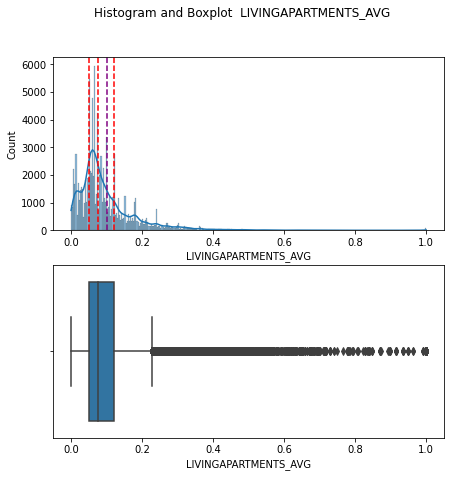

Basic statistical metrics
count    97312.000000
mean         0.100775
std          0.092576
min          0.000000
25%          0.050400
50%          0.075600
75%          0.121000
max          1.000000
Name: LIVINGAPARTMENTS_AVG, dtype: float64

Whisker and Outlier
lower whisker: 0.0
upper whisker: 0.2269
outlier counts: 7881

Skew and Skew test
Data not skewed
___________________________________________________________________________

43 | LIVINGAREA_AVG


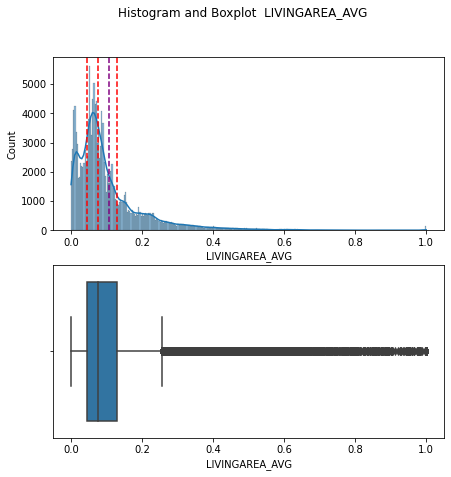

Basic statistical metrics
count    153161.000000
mean          0.107399
std           0.110565
min           0.000000
25%           0.045300
50%           0.074500
75%           0.129900
max           1.000000
Name: LIVINGAREA_AVG, dtype: float64

Whisker and Outlier
lower whisker: 0.0
upper whisker: 0.2567
outlier counts: 12517

Skew and Skew test
Data not skewed
___________________________________________________________________________

44 | NONLIVINGAPARTMENTS_AVG


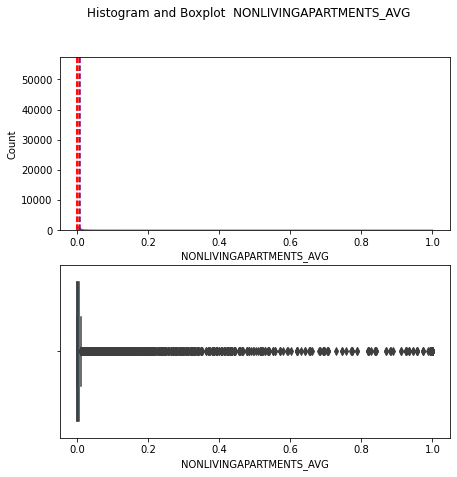

Basic statistical metrics
count    93997.000000
mean         0.008809
std          0.047732
min          0.000000
25%          0.000000
50%          0.000000
75%          0.003900
max          1.000000
Name: NONLIVINGAPARTMENTS_AVG, dtype: float64

Whisker and Outlier
lower whisker: 0.0
upper whisker: 0.0097
outlier counts: 15580

Skew and Skew test
Data not skewed
___________________________________________________________________________

45 | NONLIVINGAREA_AVG


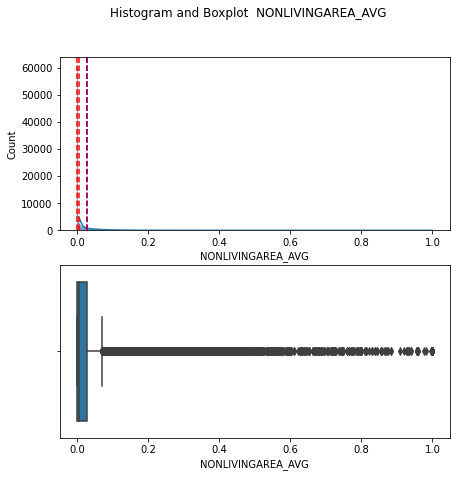

Basic statistical metrics
count    137829.000000
mean          0.028358
std           0.069523
min           0.000000
25%           0.000000
50%           0.003600
75%           0.027700
max           1.000000
Name: NONLIVINGAREA_AVG, dtype: float64

Whisker and Outlier
lower whisker: 0.0
upper whisker: 0.0692
outlier counts: 16546

Skew and Skew test
Data not skewed
___________________________________________________________________________

46 | APARTMENTS_MODE


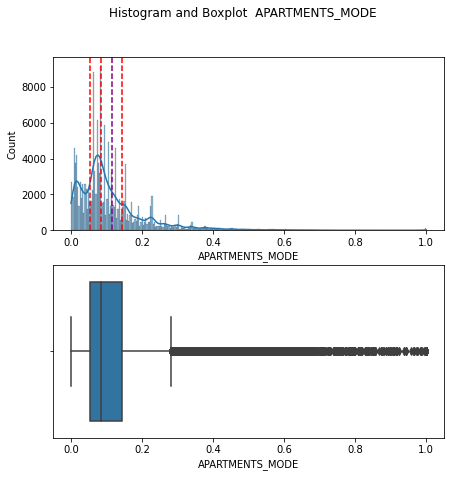

Basic statistical metrics
count    151450.000000
mean          0.114231
std           0.107936
min           0.000000
25%           0.052500
50%           0.084000
75%           0.143900
max           1.000000
Name: APARTMENTS_MODE, dtype: float64

Whisker and Outlier
lower whisker: 0.0
upper whisker: 0.2805
outlier counts: 10397

Skew and Skew test
Data not skewed
___________________________________________________________________________

47 | BASEMENTAREA_MODE


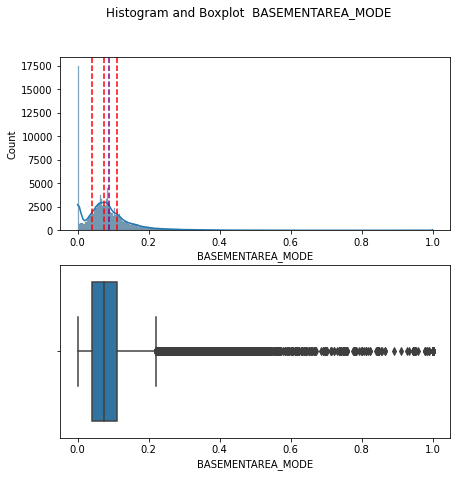

Basic statistical metrics
count    127568.000000
mean          0.087543
std           0.084307
min           0.000000
25%           0.040700
50%           0.074600
75%           0.112400
max           1.000000
Name: BASEMENTAREA_MODE, dtype: float64

Whisker and Outlier
lower whisker: 0.0
upper whisker: 0.2199
outlier counts: 6910

Skew and Skew test
Data not skewed
___________________________________________________________________________

48 | YEARS_BEGINEXPLUATATION_MODE


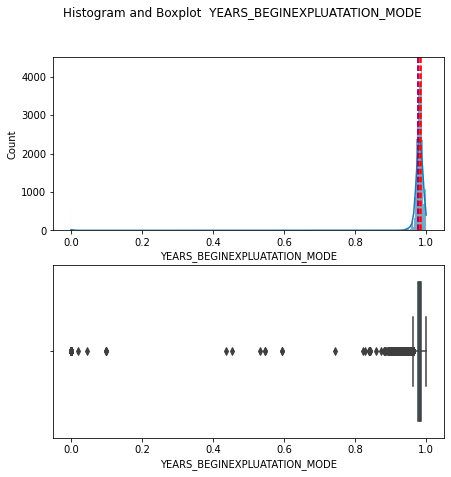

Basic statistical metrics
count    157504.000000
mean          0.977065
std           0.064575
min           0.000000
25%           0.976700
50%           0.981600
75%           0.986600
max           1.000000
Name: YEARS_BEGINEXPLUATATION_MODE, dtype: float64

Whisker and Outlier
lower whisker: 0.9623
upper whisker: 1.0
outlier counts: 5074

Skew and Skew test
Data not skewed
___________________________________________________________________________

49 | YEARS_BUILD_MODE


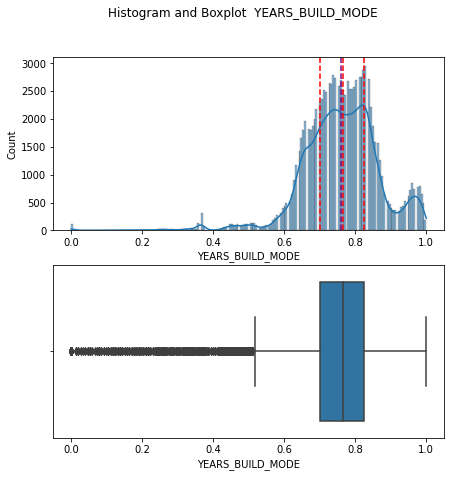

Basic statistical metrics
count    103023.000000
mean          0.759637
std           0.110111
min           0.000000
25%           0.699400
50%           0.764800
75%           0.823600
max           1.000000
Name: YEARS_BUILD_MODE, dtype: float64

Whisker and Outlier
lower whisker: 0.5165
upper whisker: 1.0
outlier counts: 2537

Skew and Skew test
Data not skewed
___________________________________________________________________________

50 | COMMONAREA_MODE


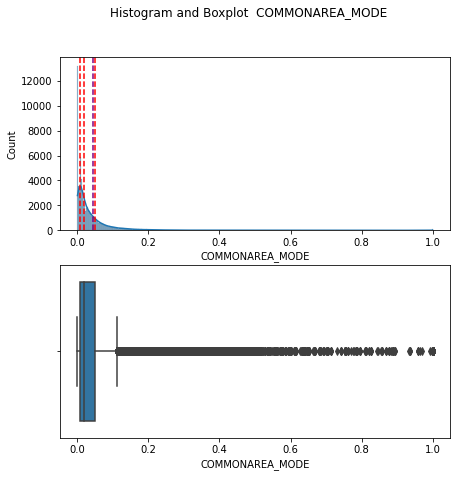

Basic statistical metrics
count    92646.000000
mean         0.042553
std          0.074445
min          0.000000
25%          0.007200
50%          0.019000
75%          0.049000
max          1.000000
Name: COMMONAREA_MODE, dtype: float64

Whisker and Outlier
lower whisker: 0.0
upper whisker: 0.1117
outlier counts: 7938

Skew and Skew test
Data not skewed
___________________________________________________________________________

51 | ELEVATORS_MODE


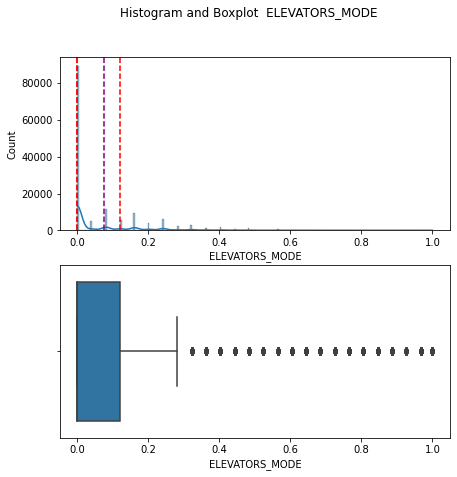

Basic statistical metrics
count    143620.000000
mean          0.074490
std           0.132256
min           0.000000
25%           0.000000
50%           0.000000
75%           0.120800
max           1.000000
Name: ELEVATORS_MODE, dtype: float64

Whisker and Outlier
lower whisker: 0.0
upper whisker: 0.282
outlier counts: 9732

Skew and Skew test
Data not skewed
___________________________________________________________________________

52 | ENTRANCES_MODE


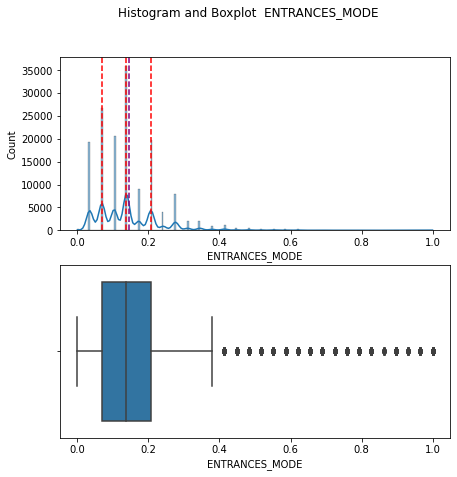

Basic statistical metrics
count    152683.000000
mean          0.145193
std           0.100977
min           0.000000
25%           0.069000
50%           0.137900
75%           0.206900
max           1.000000
Name: ENTRANCES_MODE, dtype: float64

Whisker and Outlier
lower whisker: 0.0
upper whisker: 0.3793
outlier counts: 3840

Skew and Skew test
Data not skewed
___________________________________________________________________________

53 | FLOORSMAX_MODE


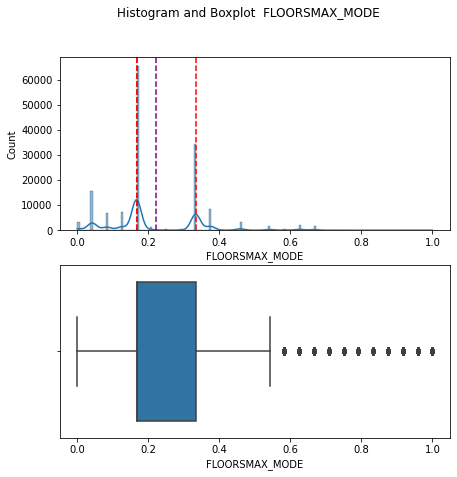

Basic statistical metrics
count    154491.000000
mean          0.222315
std           0.143709
min           0.000000
25%           0.166700
50%           0.166700
75%           0.333300
max           1.000000
Name: FLOORSMAX_MODE, dtype: float64

Whisker and Outlier
lower whisker: 0.0
upper whisker: 0.5417
outlier counts: 5104

Skew and Skew test
Data not skewed
___________________________________________________________________________

54 | FLOORSMIN_MODE


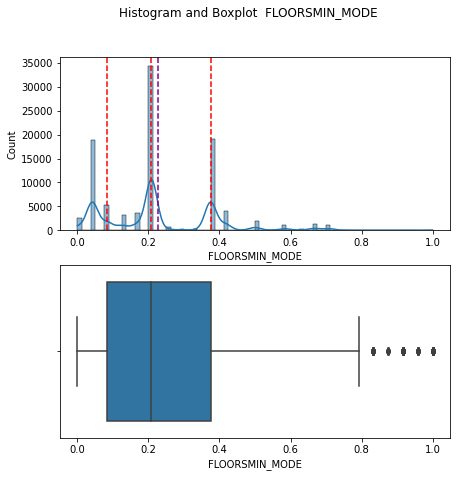

Basic statistical metrics
count    98869.000000
mean         0.228058
std          0.161160
min          0.000000
25%          0.083300
50%          0.208300
75%          0.375000
max          1.000000
Name: FLOORSMIN_MODE, dtype: float64

Whisker and Outlier
lower whisker: 0.0
upper whisker: 0.7917
outlier counts: 320

Skew and Skew test
Data not skewed
___________________________________________________________________________

55 | LANDAREA_MODE


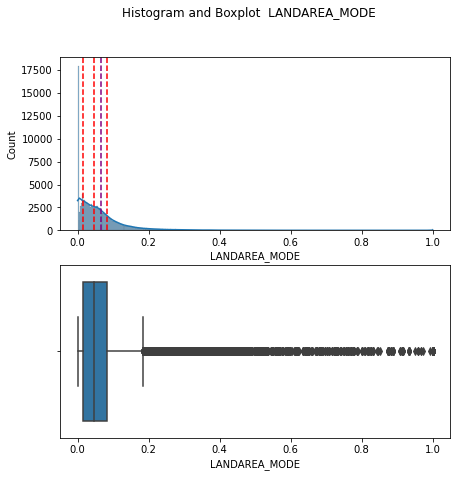

Basic statistical metrics
count    124921.000000
mean          0.064958
std           0.081750
min           0.000000
25%           0.016600
50%           0.045800
75%           0.084100
max           1.000000
Name: LANDAREA_MODE, dtype: float64

Whisker and Outlier
lower whisker: 0.0
upper whisker: 0.1853
outlier counts: 7033

Skew and Skew test
Data not skewed
___________________________________________________________________________

56 | LIVINGAPARTMENTS_MODE


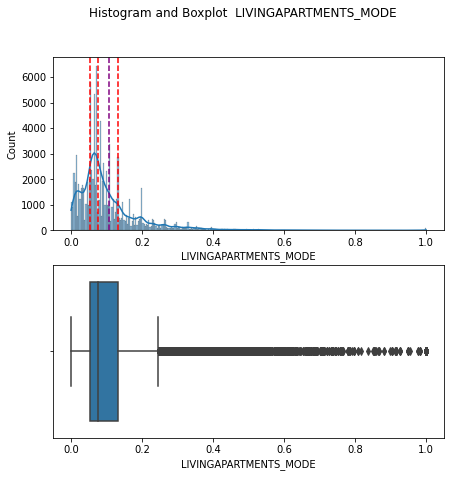

Basic statistical metrics
count    97312.000000
mean         0.105645
std          0.097880
min          0.000000
25%          0.054200
50%          0.077100
75%          0.131300
max          1.000000
Name: LIVINGAPARTMENTS_MODE, dtype: float64

Whisker and Outlier
lower whisker: 0.0
upper whisker: 0.2461
outlier counts: 7469

Skew and Skew test
Data not skewed
___________________________________________________________________________

57 | LIVINGAREA_MODE


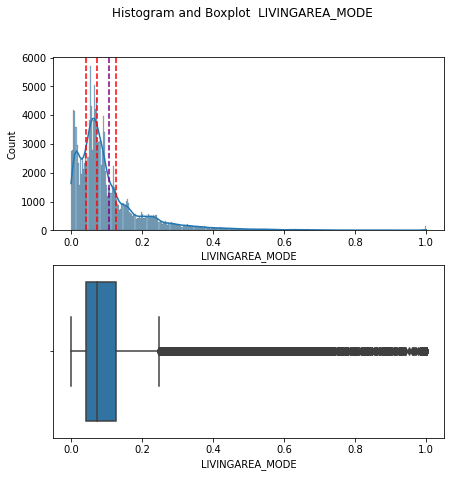

Basic statistical metrics
count    153161.000000
mean          0.105975
std           0.111845
min           0.000000
25%           0.042700
50%           0.073100
75%           0.125200
max           1.000000
Name: LIVINGAREA_MODE, dtype: float64

Whisker and Outlier
lower whisker: 0.0
upper whisker: 0.2489
outlier counts: 13105

Skew and Skew test
Data not skewed
___________________________________________________________________________

58 | NONLIVINGAPARTMENTS_MODE


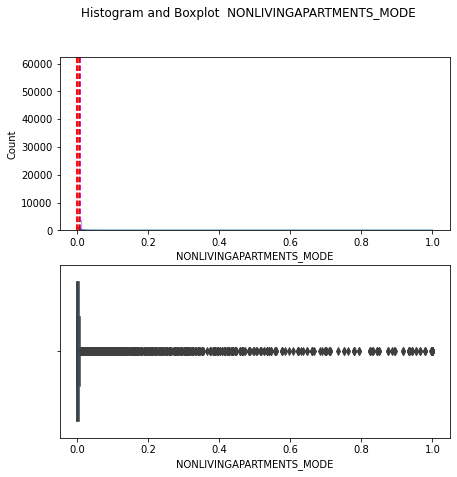

Basic statistical metrics
count    93997.000000
mean         0.008076
std          0.046276
min          0.000000
25%          0.000000
50%          0.000000
75%          0.003900
max          1.000000
Name: NONLIVINGAPARTMENTS_MODE, dtype: float64

Whisker and Outlier
lower whisker: 0.0
upper whisker: 0.0078
outlier counts: 14224

Skew and Skew test
Data not skewed
___________________________________________________________________________

59 | NONLIVINGAREA_MODE


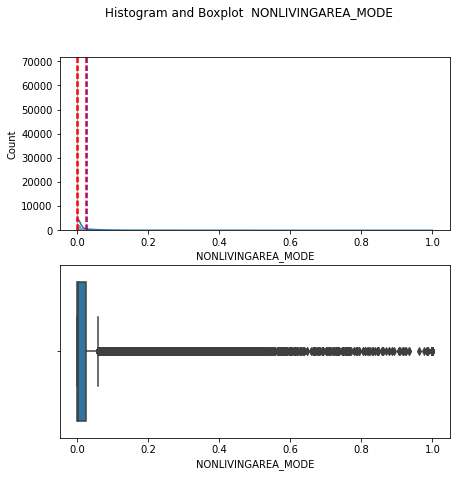

Basic statistical metrics
count    137829.000000
mean          0.027022
std           0.070254
min           0.000000
25%           0.000000
50%           0.001100
75%           0.023100
max           1.000000
Name: NONLIVINGAREA_MODE, dtype: float64

Whisker and Outlier
lower whisker: 0.0
upper whisker: 0.0577
outlier counts: 18817

Skew and Skew test
Data not skewed
___________________________________________________________________________

60 | APARTMENTS_MEDI


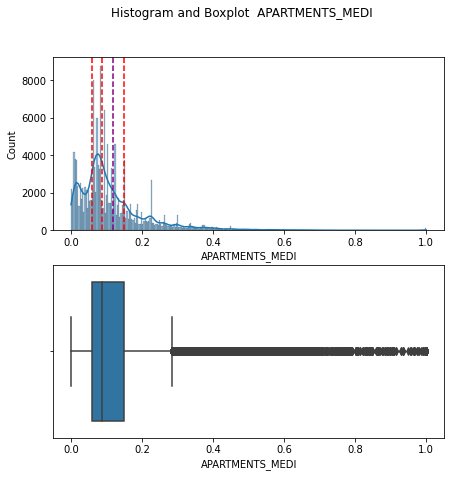

Basic statistical metrics
count    151450.000000
mean          0.117850
std           0.109076
min           0.000000
25%           0.058300
50%           0.086400
75%           0.148900
max           1.000000
Name: APARTMENTS_MEDI, dtype: float64

Whisker and Outlier
lower whisker: 0.0
upper whisker: 0.2847
outlier counts: 10728

Skew and Skew test
Data not skewed
___________________________________________________________________________

61 | BASEMENTAREA_MEDI


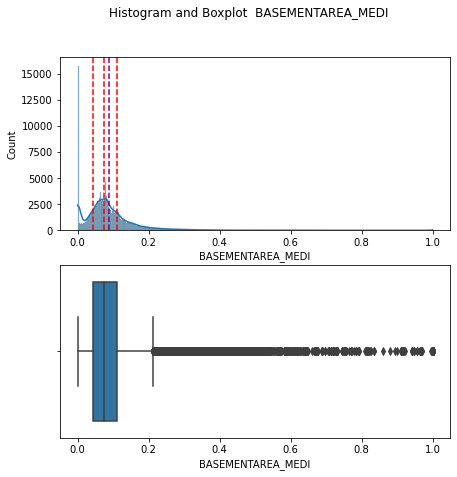

Basic statistical metrics
count    127568.000000
mean          0.087955
std           0.082179
min           0.000000
25%           0.043700
50%           0.075800
75%           0.111600
max           1.000000
Name: BASEMENTAREA_MEDI, dtype: float64

Whisker and Outlier
lower whisker: 0.0
upper whisker: 0.2134
outlier counts: 7188

Skew and Skew test
Data not skewed
___________________________________________________________________________

62 | YEARS_BEGINEXPLUATATION_MEDI


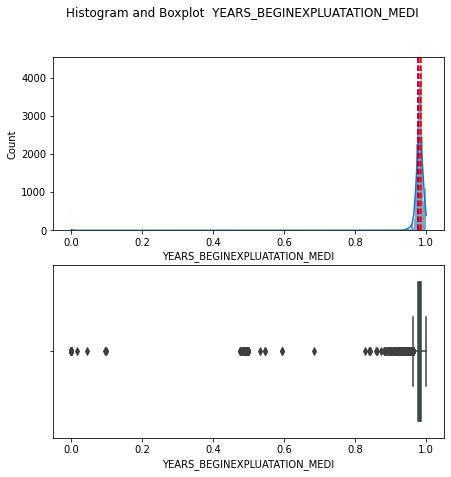

Basic statistical metrics
count    157504.000000
mean          0.977752
std           0.059897
min           0.000000
25%           0.976700
50%           0.981600
75%           0.986600
max           1.000000
Name: YEARS_BEGINEXPLUATATION_MEDI, dtype: float64

Whisker and Outlier
lower whisker: 0.9622
upper whisker: 1.0
outlier counts: 4762

Skew and Skew test
Data not skewed
___________________________________________________________________________

63 | YEARS_BUILD_MEDI


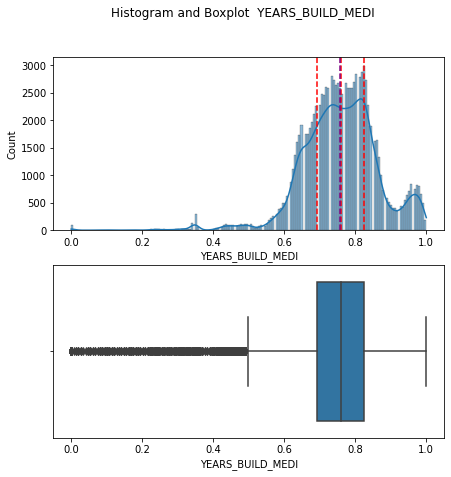

Basic statistical metrics
count    103023.000000
mean          0.755746
std           0.112066
min           0.000000
25%           0.691400
50%           0.758500
75%           0.825600
max           1.000000
Name: YEARS_BUILD_MEDI, dtype: float64

Whisker and Outlier
lower whisker: 0.4968
upper whisker: 1.0
outlier counts: 2274

Skew and Skew test
Data not skewed
___________________________________________________________________________

64 | COMMONAREA_MEDI


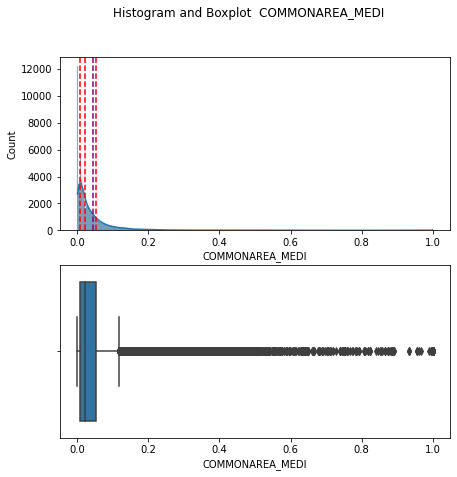

Basic statistical metrics
count    92646.000000
mean         0.044595
std          0.076144
min          0.000000
25%          0.007900
50%          0.020800
75%          0.051300
max          1.000000
Name: COMMONAREA_MEDI, dtype: float64

Whisker and Outlier
lower whisker: 0.0
upper whisker: 0.1163
outlier counts: 8004

Skew and Skew test
Data not skewed
___________________________________________________________________________

65 | ELEVATORS_MEDI


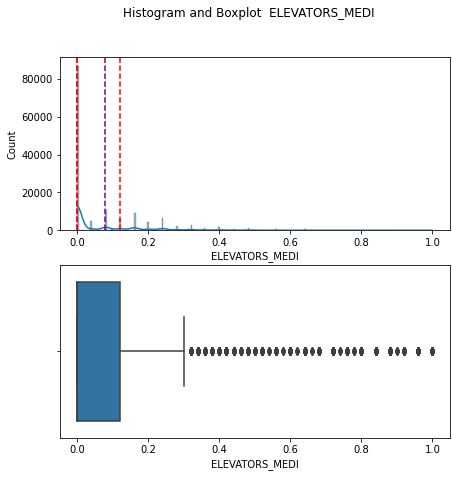

Basic statistical metrics
count    143620.000000
mean          0.078078
std           0.134467
min           0.000000
25%           0.000000
50%           0.000000
75%           0.120000
max           1.000000
Name: ELEVATORS_MEDI, dtype: float64

Whisker and Outlier
lower whisker: 0.0
upper whisker: 0.3
outlier counts: 10383

Skew and Skew test
Data not skewed
___________________________________________________________________________

66 | ENTRANCES_MEDI


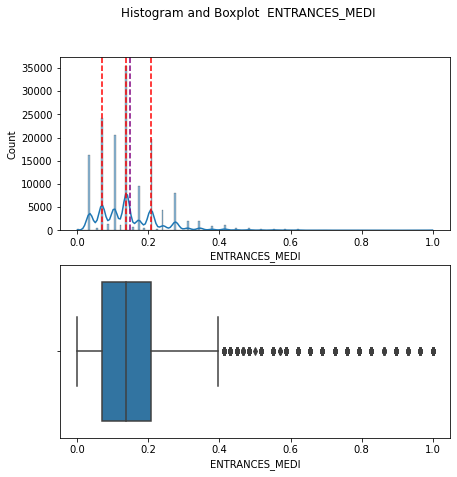

Basic statistical metrics
count    152683.000000
mean          0.149213
std           0.100368
min           0.000000
25%           0.069000
50%           0.137900
75%           0.206900
max           1.000000
Name: ENTRANCES_MEDI, dtype: float64

Whisker and Outlier
lower whisker: 0.0
upper whisker: 0.3966
outlier counts: 3893

Skew and Skew test
Data not skewed
___________________________________________________________________________

67 | FLOORSMAX_MEDI


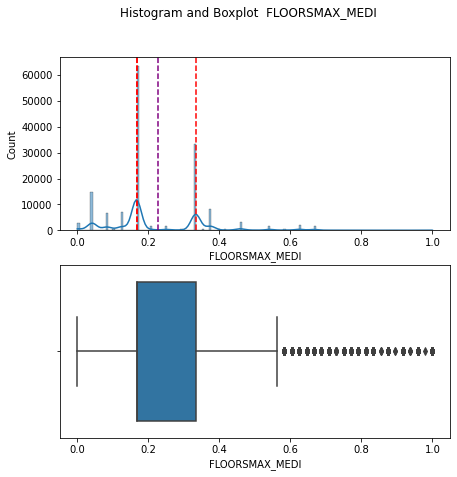

Basic statistical metrics
count    154491.000000
mean          0.225897
std           0.145067
min           0.000000
25%           0.166700
50%           0.166700
75%           0.333300
max           1.000000
Name: FLOORSMAX_MEDI, dtype: float64

Whisker and Outlier
lower whisker: 0.0
upper whisker: 0.5625
outlier counts: 5360

Skew and Skew test
Data not skewed
___________________________________________________________________________

68 | FLOORSMIN_MEDI


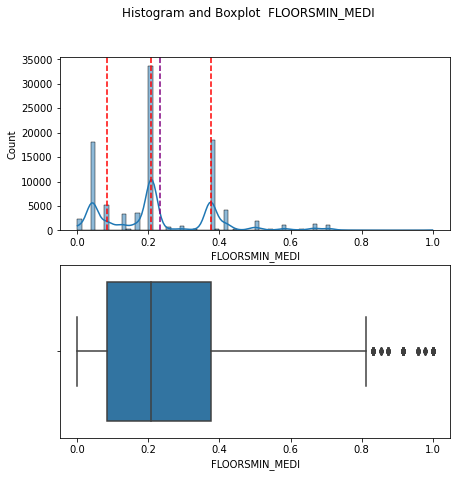

Basic statistical metrics
count    98869.000000
mean         0.231625
std          0.161934
min          0.000000
25%          0.083300
50%          0.208300
75%          0.375000
max          1.000000
Name: FLOORSMIN_MEDI, dtype: float64

Whisker and Outlier
lower whisker: 0.0
upper whisker: 0.8125
outlier counts: 344

Skew and Skew test
Data not skewed
___________________________________________________________________________

69 | LANDAREA_MEDI


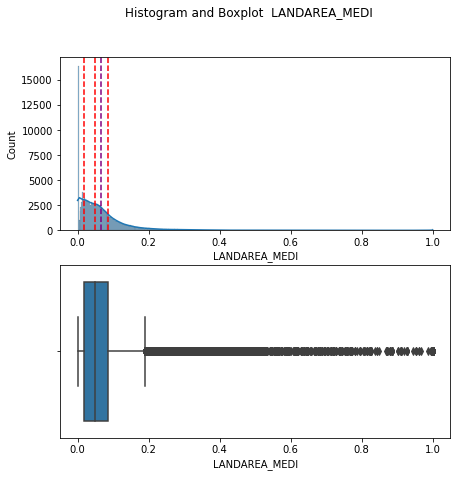

Basic statistical metrics
count    124921.000000
mean          0.067169
std           0.082167
min           0.000000
25%           0.018700
50%           0.048700
75%           0.086800
max           1.000000
Name: LANDAREA_MEDI, dtype: float64

Whisker and Outlier
lower whisker: 0.0
upper whisker: 0.1889
outlier counts: 6873

Skew and Skew test
Data not skewed
___________________________________________________________________________

70 | LIVINGAPARTMENTS_MEDI


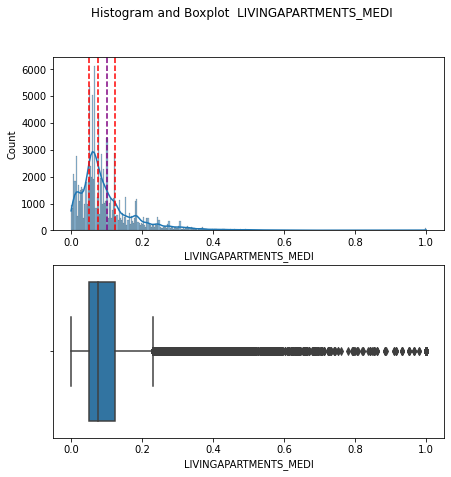

Basic statistical metrics
count    97312.000000
mean         0.101954
std          0.093642
min          0.000000
25%          0.051300
50%          0.076100
75%          0.123100
max          1.000000
Name: LIVINGAPARTMENTS_MEDI, dtype: float64

Whisker and Outlier
lower whisker: 0.0
upper whisker: 0.2304
outlier counts: 7927

Skew and Skew test
Data not skewed
___________________________________________________________________________

71 | LIVINGAREA_MEDI


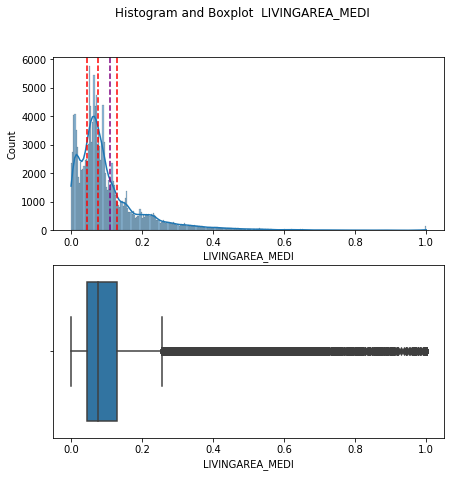

Basic statistical metrics
count    153161.000000
mean          0.108607
std           0.112260
min           0.000000
25%           0.045700
50%           0.074900
75%           0.130300
max           1.000000
Name: LIVINGAREA_MEDI, dtype: float64

Whisker and Outlier
lower whisker: 0.0
upper whisker: 0.2572
outlier counts: 12907

Skew and Skew test
Data not skewed
___________________________________________________________________________

72 | NONLIVINGAPARTMENTS_MEDI


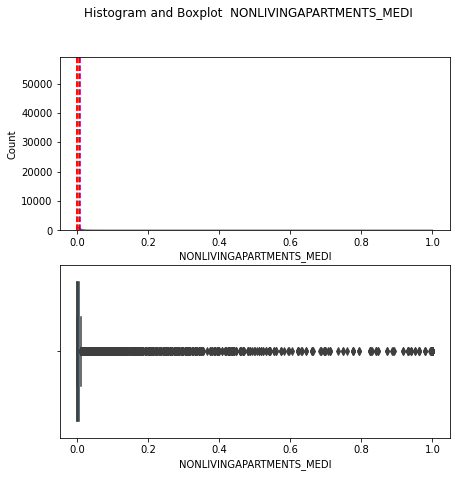

Basic statistical metrics
count    93997.000000
mean         0.008651
std          0.047415
min          0.000000
25%          0.000000
50%          0.000000
75%          0.003900
max          1.000000
Name: NONLIVINGAPARTMENTS_MEDI, dtype: float64

Whisker and Outlier
lower whisker: 0.0
upper whisker: 0.0097
outlier counts: 15215

Skew and Skew test
Data not skewed
___________________________________________________________________________

73 | NONLIVINGAREA_MEDI


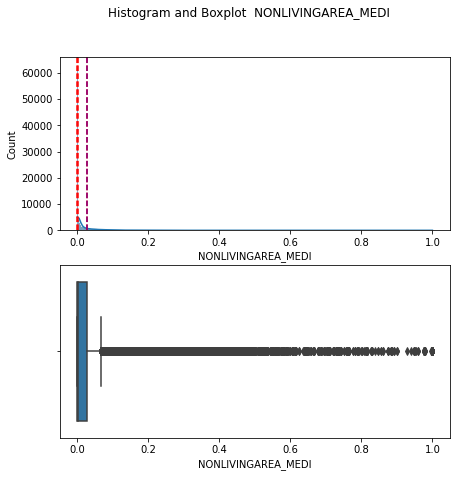

Basic statistical metrics
count    137829.000000
mean          0.028236
std           0.070166
min           0.000000
25%           0.000000
50%           0.003100
75%           0.026600
max           1.000000
Name: NONLIVINGAREA_MEDI, dtype: float64

Whisker and Outlier
lower whisker: 0.0
upper whisker: 0.0665
outlier counts: 17254

Skew and Skew test
Data not skewed
___________________________________________________________________________

74 | TOTALAREA_MODE


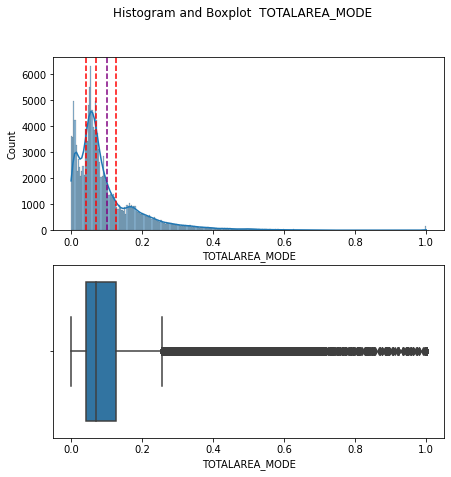

Basic statistical metrics
count    159080.000000
mean          0.102547
std           0.107462
min           0.000000
25%           0.041200
50%           0.068800
75%           0.127600
max           1.000000
Name: TOTALAREA_MODE, dtype: float64

Whisker and Outlier
lower whisker: 0.0
upper whisker: 0.2572
outlier counts: 12091

Skew and Skew test
Data not skewed
___________________________________________________________________________

75 | OBS_30_CNT_SOCIAL_CIRCLE


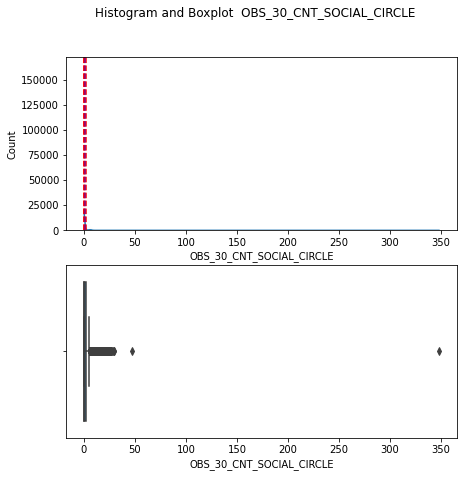

Basic statistical metrics
count    306490.000000
mean          1.422245
std           2.400989
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         348.000000
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64

Whisker and Outlier
lower whisker: 0.0
upper whisker: 5.0
outlier counts: 19971

Skew and Skew test
Data not skewed
___________________________________________________________________________

76 | DEF_30_CNT_SOCIAL_CIRCLE


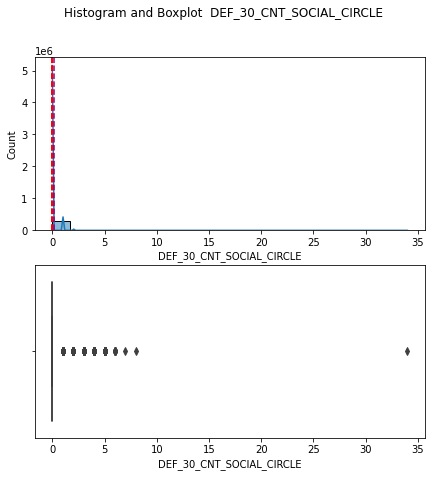

Basic statistical metrics
count    306490.000000
mean          0.143421
std           0.446698
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          34.000000
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: float64

Whisker and Outlier
lower whisker: 0.0
upper whisker: 0.0
outlier counts: 35166

Skew and Skew test
Data not skewed
___________________________________________________________________________

77 | OBS_60_CNT_SOCIAL_CIRCLE


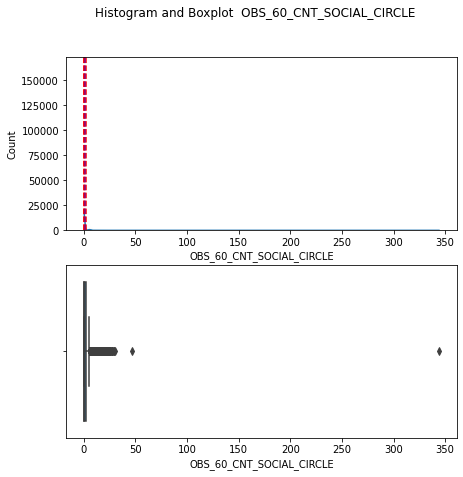

Basic statistical metrics
count    306490.000000
mean          1.405292
std           2.379803
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         344.000000
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: float64

Whisker and Outlier
lower whisker: 0.0
upper whisker: 5.0
outlier counts: 19564

Skew and Skew test
Data not skewed
___________________________________________________________________________

78 | DEF_60_CNT_SOCIAL_CIRCLE


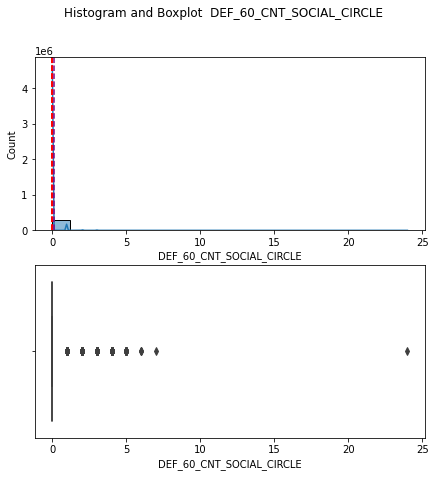

Basic statistical metrics
count    306490.000000
mean          0.100049
std           0.362291
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          24.000000
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: float64

Whisker and Outlier
lower whisker: 0.0
upper whisker: 0.0
outlier counts: 25769

Skew and Skew test
Data not skewed
___________________________________________________________________________

79 | DAYS_LAST_PHONE_CHANGE


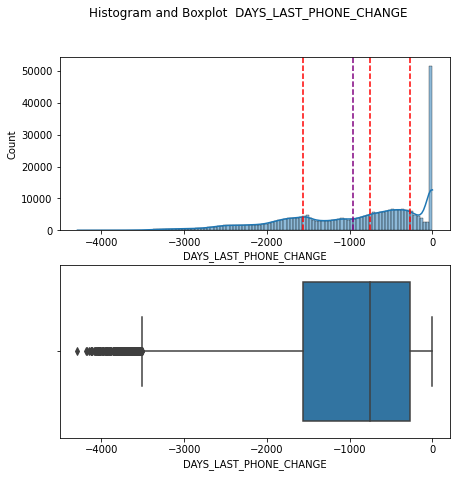

Basic statistical metrics
count    307510.000000
mean       -962.858788
std         826.808487
min       -4292.000000
25%       -1570.000000
50%        -757.000000
75%        -274.000000
max           0.000000
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64

Whisker and Outlier
lower whisker: -3514.0
upper whisker: 0.0
outlier counts: 435

Skew and Skew test
Data not skewed
___________________________________________________________________________

80 | FLAG_DOCUMENT_2


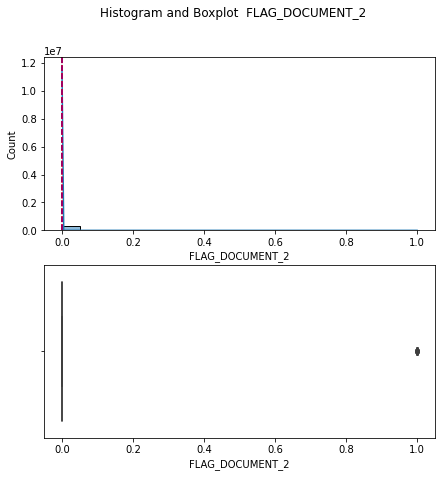

Basic statistical metrics
count    307511.000000
mean          0.000042
std           0.006502
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: FLAG_DOCUMENT_2, dtype: float64

Whisker and Outlier
lower whisker: 0
upper whisker: 0
outlier counts: 13

Skew and Skew test
Data skewed, with skew: 153.79106719822505
___________________________________________________________________________

81 | FLAG_DOCUMENT_3


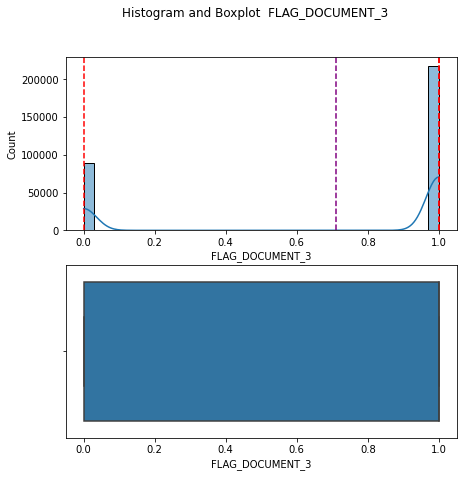

Basic statistical metrics
count    307511.000000
mean          0.710023
std           0.453752
min           0.000000
25%           0.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: FLAG_DOCUMENT_3, dtype: float64

Whisker and Outlier
lower whisker: 0
upper whisker: 1
outlier counts: 0

Skew and Skew test
Data skewed, with skew: -0.9257203819650203
___________________________________________________________________________

82 | FLAG_DOCUMENT_4


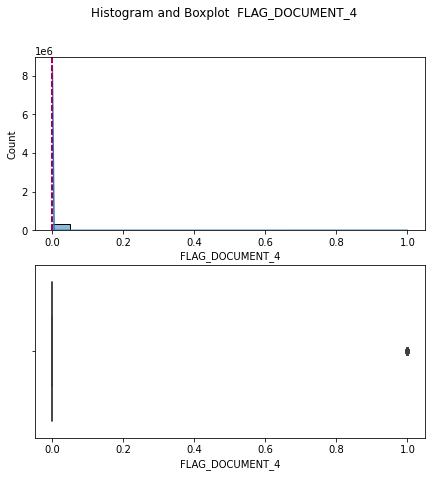

Basic statistical metrics
count    307511.000000
mean          0.000081
std           0.009016
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: FLAG_DOCUMENT_4, dtype: float64

Whisker and Outlier
lower whisker: 0
upper whisker: 0
outlier counts: 25

Skew and Skew test
Data skewed, with skew: 110.8938234587684
___________________________________________________________________________

83 | FLAG_DOCUMENT_5


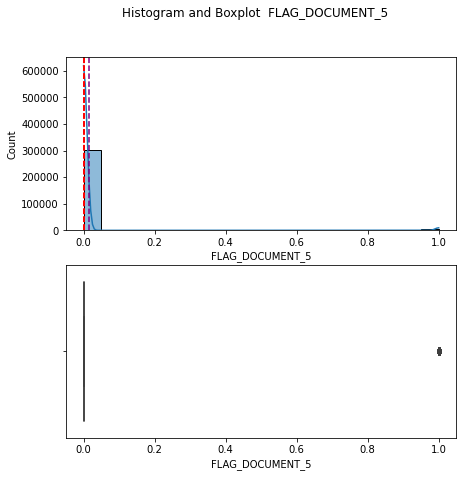

Basic statistical metrics
count    307511.000000
mean          0.015115
std           0.122010
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: FLAG_DOCUMENT_5, dtype: float64

Whisker and Outlier
lower whisker: 0
upper whisker: 0
outlier counts: 4648

Skew and Skew test
Data skewed, with skew: 7.948282869496087
___________________________________________________________________________

84 | FLAG_DOCUMENT_6


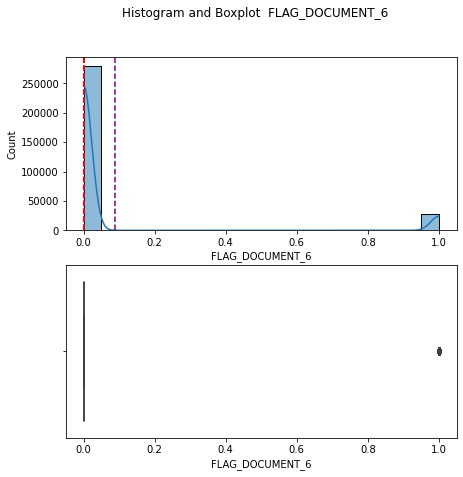

Basic statistical metrics
count    307511.000000
mean          0.088055
std           0.283376
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: FLAG_DOCUMENT_6, dtype: float64

Whisker and Outlier
lower whisker: 0
upper whisker: 0
outlier counts: 27078

Skew and Skew test
Data skewed, with skew: 2.9074123349575802
___________________________________________________________________________

85 | FLAG_DOCUMENT_7


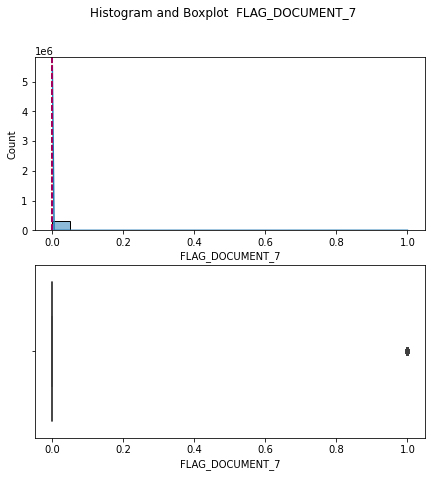

Basic statistical metrics
count    307511.000000
mean          0.000192
std           0.013850
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: FLAG_DOCUMENT_7, dtype: float64

Whisker and Outlier
lower whisker: 0
upper whisker: 0
outlier counts: 59

Skew and Skew test
Data skewed, with skew: 72.1737558906109
___________________________________________________________________________

86 | FLAG_DOCUMENT_8


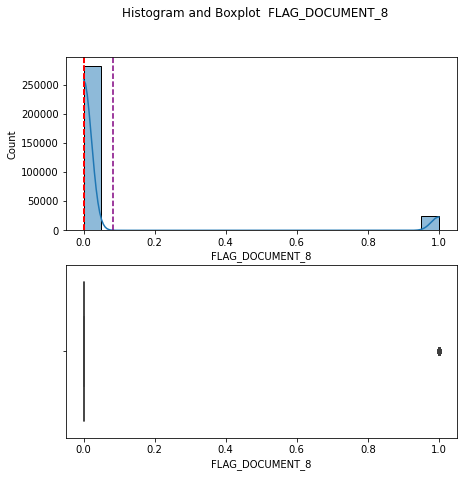

Basic statistical metrics
count    307511.000000
mean          0.081376
std           0.273412
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: FLAG_DOCUMENT_8, dtype: float64

Whisker and Outlier
lower whisker: 0
upper whisker: 0
outlier counts: 25024

Skew and Skew test
Data skewed, with skew: 3.062225907774697
___________________________________________________________________________

87 | FLAG_DOCUMENT_9


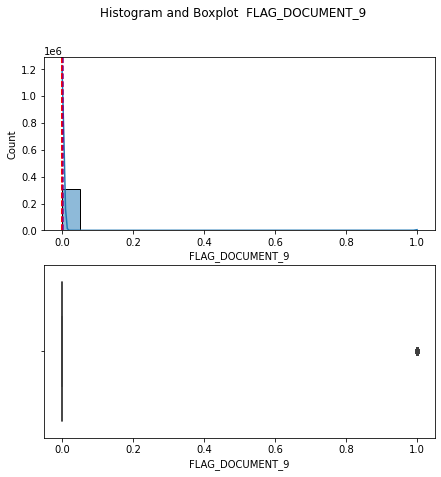

Basic statistical metrics
count    307511.000000
mean          0.003896
std           0.062295
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: FLAG_DOCUMENT_9, dtype: float64

Whisker and Outlier
lower whisker: 0
upper whisker: 0
outlier counts: 1198

Skew and Skew test
Data skewed, with skew: 15.927676834031436
___________________________________________________________________________

88 | FLAG_DOCUMENT_10


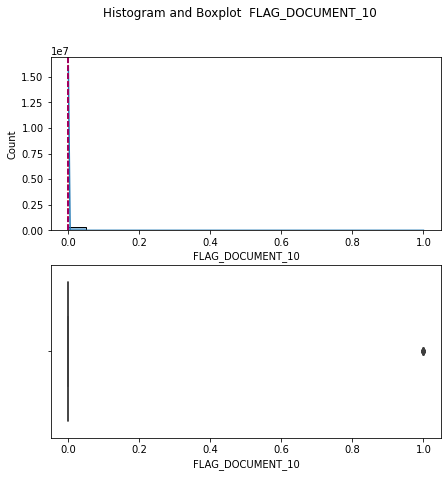

Basic statistical metrics
count    307511.000000
mean          0.000023
std           0.004771
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: FLAG_DOCUMENT_10, dtype: float64

Whisker and Outlier
lower whisker: 0
upper whisker: 0
outlier counts: 7

Skew and Skew test
Data skewed, with skew: 209.5880313374475
___________________________________________________________________________

89 | FLAG_DOCUMENT_11


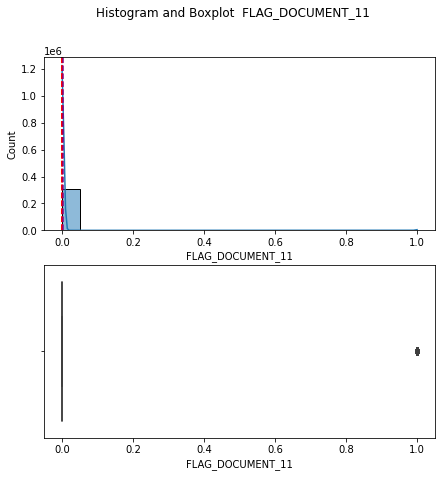

Basic statistical metrics
count    307511.000000
mean          0.003912
std           0.062424
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: FLAG_DOCUMENT_11, dtype: float64

Whisker and Outlier
lower whisker: 0
upper whisker: 0
outlier counts: 1203

Skew and Skew test
Data skewed, with skew: 15.894151244882115
___________________________________________________________________________

90 | FLAG_DOCUMENT_12


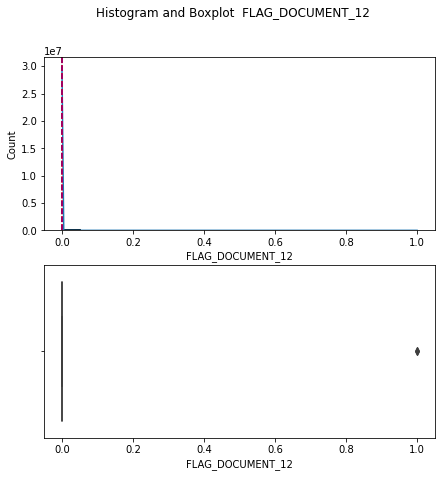

Basic statistical metrics
count    307511.000000
mean          0.000007
std           0.002550
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: FLAG_DOCUMENT_12, dtype: float64

Whisker and Outlier
lower whisker: 0
upper whisker: 0
outlier counts: 2

Skew and Skew test
Data skewed, with skew: 392.1128664128528
___________________________________________________________________________

91 | FLAG_DOCUMENT_13


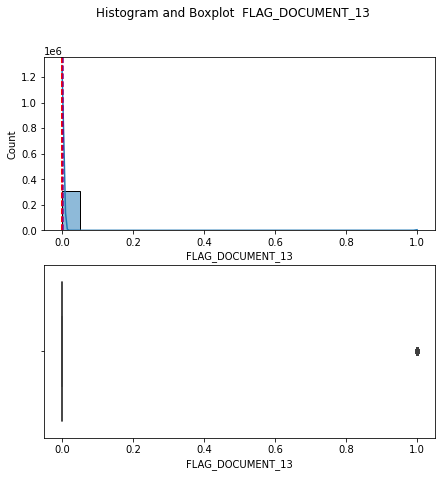

Basic statistical metrics
count    307511.000000
mean          0.003525
std           0.059268
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: FLAG_DOCUMENT_13, dtype: float64

Whisker and Outlier
lower whisker: 0
upper whisker: 0
outlier counts: 1084

Skew and Skew test
Data skewed, with skew: 16.753664430942326
___________________________________________________________________________

92 | FLAG_DOCUMENT_14


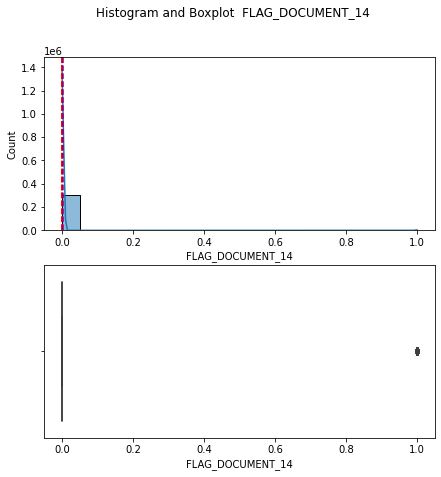

Basic statistical metrics
count    307511.000000
mean          0.002936
std           0.054110
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: FLAG_DOCUMENT_14, dtype: float64

Whisker and Outlier
lower whisker: 0
upper whisker: 0
outlier counts: 903

Skew and Skew test
Data skewed, with skew: 18.37244371898468
___________________________________________________________________________

93 | FLAG_DOCUMENT_15


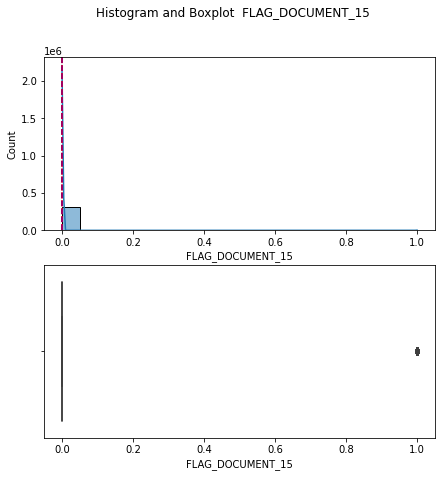

Basic statistical metrics
count    307511.00000
mean          0.00121
std           0.03476
min           0.00000
25%           0.00000
50%           0.00000
75%           0.00000
max           1.00000
Name: FLAG_DOCUMENT_15, dtype: float64

Whisker and Outlier
lower whisker: 0
upper whisker: 0
outlier counts: 372

Skew and Skew test
Data skewed, with skew: 28.699193094863833
___________________________________________________________________________

94 | FLAG_DOCUMENT_16


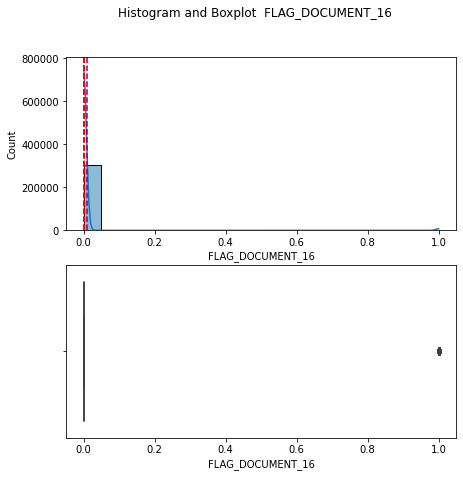

Basic statistical metrics
count    307511.000000
mean          0.009928
std           0.099144
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: FLAG_DOCUMENT_16, dtype: float64

Whisker and Outlier
lower whisker: 0
upper whisker: 0
outlier counts: 3053

Skew and Skew test
Data skewed, with skew: 9.886062580978082
___________________________________________________________________________

95 | FLAG_DOCUMENT_17


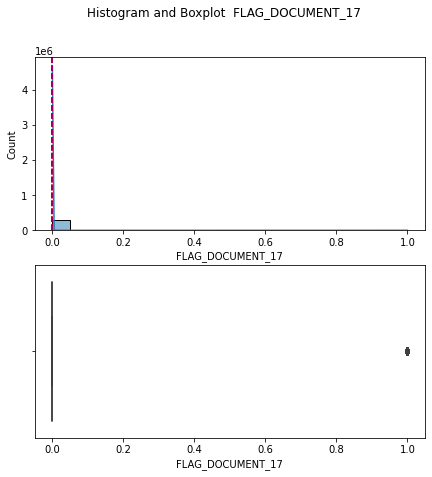

Basic statistical metrics
count    307511.000000
mean          0.000267
std           0.016327
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: FLAG_DOCUMENT_17, dtype: float64

Whisker and Outlier
lower whisker: 0
upper whisker: 0
outlier counts: 82

Skew and Skew test
Data skewed, with skew: 61.21384167873895
___________________________________________________________________________

96 | FLAG_DOCUMENT_18


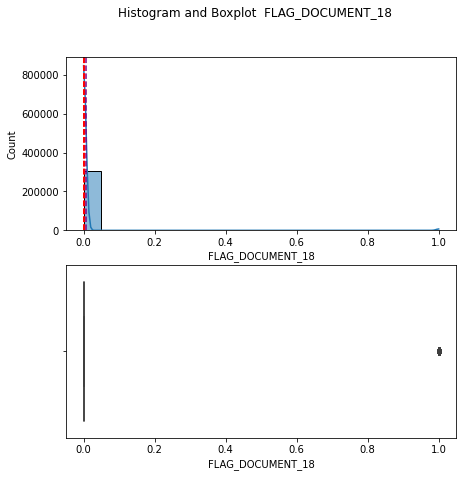

Basic statistical metrics
count    307511.000000
mean          0.008130
std           0.089798
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: FLAG_DOCUMENT_18, dtype: float64

Whisker and Outlier
lower whisker: 0
upper whisker: 0
outlier counts: 2500

Skew and Skew test
Data skewed, with skew: 10.955026080557857
___________________________________________________________________________

97 | FLAG_DOCUMENT_19


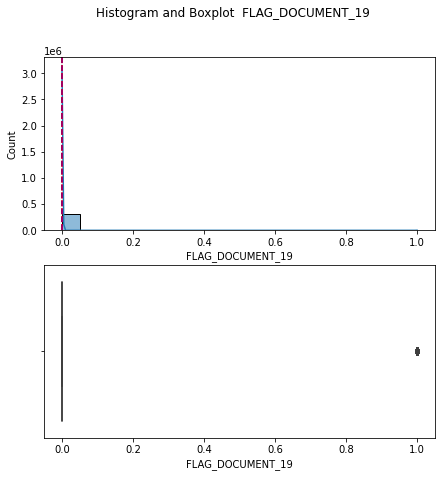

Basic statistical metrics
count    307511.000000
mean          0.000595
std           0.024387
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: FLAG_DOCUMENT_19, dtype: float64

Whisker and Outlier
lower whisker: 0
upper whisker: 0
outlier counts: 183

Skew and Skew test
Data skewed, with skew: 40.95593453453479
___________________________________________________________________________

98 | FLAG_DOCUMENT_20


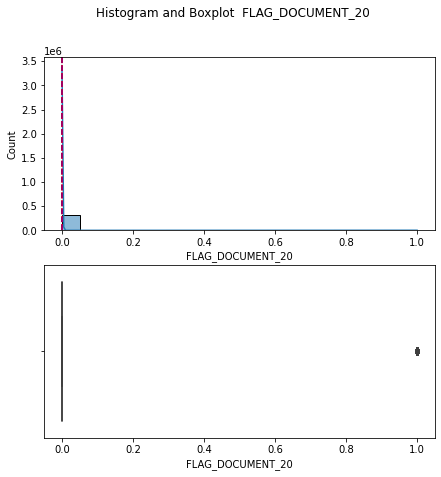

Basic statistical metrics
count    307511.000000
mean          0.000507
std           0.022518
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: FLAG_DOCUMENT_20, dtype: float64

Whisker and Outlier
lower whisker: 0
upper whisker: 0
outlier counts: 156

Skew and Skew test
Data skewed, with skew: 44.36468039477766
___________________________________________________________________________

99 | FLAG_DOCUMENT_21


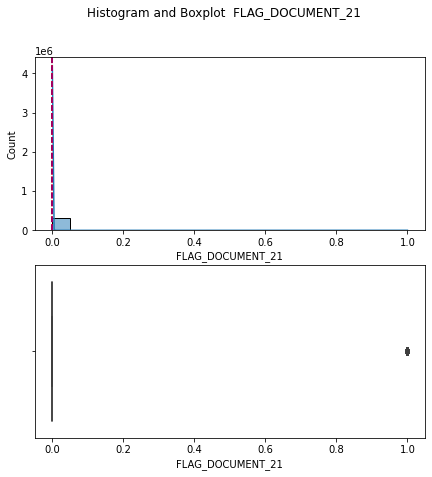

Basic statistical metrics
count    307511.000000
mean          0.000335
std           0.018299
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: FLAG_DOCUMENT_21, dtype: float64

Whisker and Outlier
lower whisker: 0
upper whisker: 0
outlier counts: 103

Skew and Skew test
Data skewed, with skew: 54.61267274525195
___________________________________________________________________________

100 | AMT_REQ_CREDIT_BUREAU_HOUR


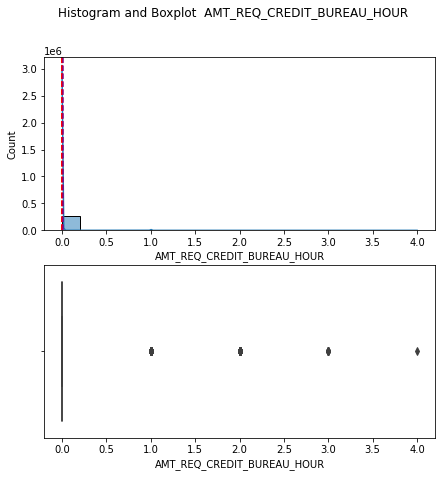

Basic statistical metrics
count    265992.000000
mean          0.006402
std           0.083849
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           4.000000
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64

Whisker and Outlier
lower whisker: 0.0
upper whisker: 0.0
outlier counts: 1626

Skew and Skew test
Data not skewed
___________________________________________________________________________

101 | AMT_REQ_CREDIT_BUREAU_DAY


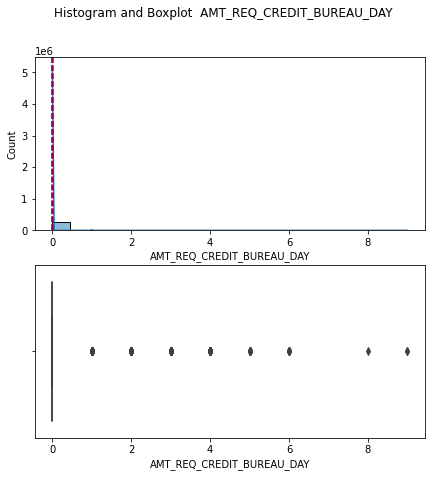

Basic statistical metrics
count    265992.000000
mean          0.007000
std           0.110757
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           9.000000
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64

Whisker and Outlier
lower whisker: 0.0
upper whisker: 0.0
outlier counts: 1489

Skew and Skew test
Data not skewed
___________________________________________________________________________

102 | AMT_REQ_CREDIT_BUREAU_WEEK


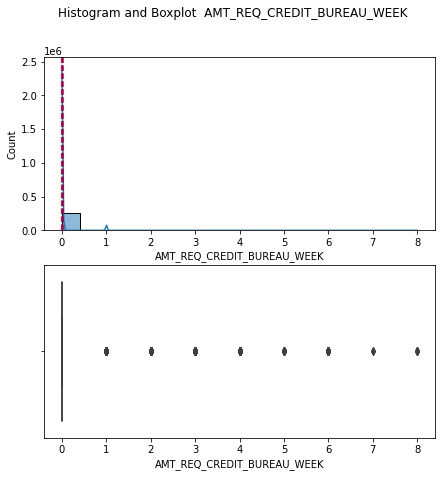

Basic statistical metrics
count    265992.000000
mean          0.034362
std           0.204685
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           8.000000
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: float64

Whisker and Outlier
lower whisker: 0.0
upper whisker: 0.0
outlier counts: 8536

Skew and Skew test
Data not skewed
___________________________________________________________________________

103 | AMT_REQ_CREDIT_BUREAU_MON


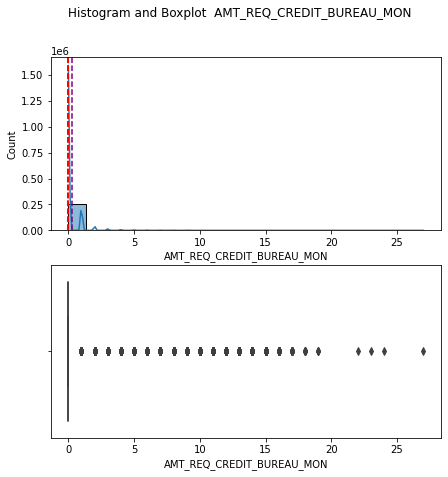

Basic statistical metrics
count    265992.000000
mean          0.267395
std           0.916002
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          27.000000
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: float64

Whisker and Outlier
lower whisker: 0.0
upper whisker: 0.0
outlier counts: 43759

Skew and Skew test
Data not skewed
___________________________________________________________________________

104 | AMT_REQ_CREDIT_BUREAU_QRT


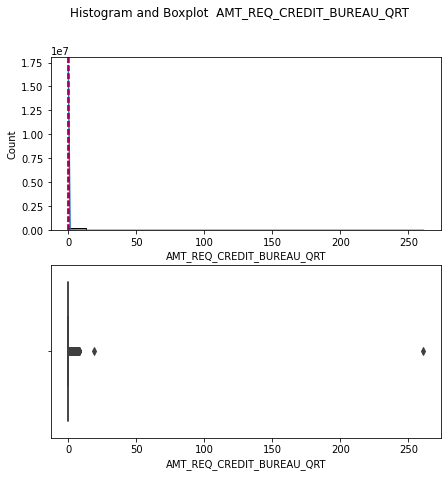

Basic statistical metrics
count    265992.000000
mean          0.265474
std           0.794056
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         261.000000
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64

Whisker and Outlier
lower whisker: 0.0
upper whisker: 0.0
outlier counts: 50575

Skew and Skew test
Data not skewed
___________________________________________________________________________

105 | AMT_REQ_CREDIT_BUREAU_YEAR


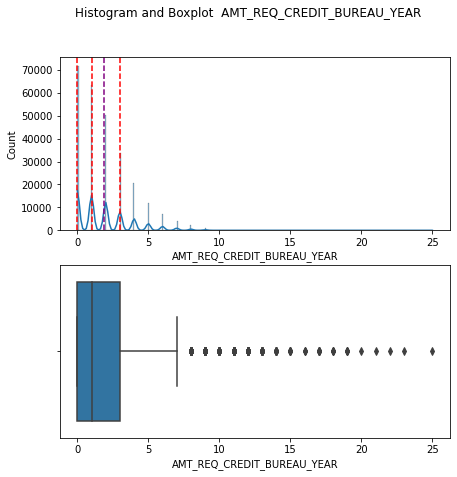

Basic statistical metrics
count    265992.000000
mean          1.899974
std           1.869295
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max          25.000000
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64

Whisker and Outlier
lower whisker: 0.0
upper whisker: 7.0
outlier counts: 3364

Skew and Skew test
Data not skewed
___________________________________________________________________________



In [100]:
# Histogram and boxplot each numerical features, describe(), and outlier

a = 1
for col in train_num.columns:
  print(a,'|', col )

  # Histogram and boxplot each numerical features
  fig, axs = plt.subplots(2,1)
  fig.set_size_inches(7,7)

  sns.histplot(data = train_num, x = col, kde = True, ax = axs[0])
  axs[0].axvline(np.nanpercentile(train_num[col], 25), c = 'r', linestyle = '--')
  axs[0].axvline(np.nanpercentile(train_num[col], 50), c = 'r', linestyle = '--')
  axs[0].axvline(np.nanpercentile(train_num[col], 75), c = 'r', linestyle = '--')
  axs[0].axvline(np.mean(train_num[col]), color = 'purple', linestyle='--')

  sns.boxplot(data = train_num, x = col, ax = axs[1])

  fig.suptitle('Histogram and Boxplot  {}'.format(col))
  plt.show()
  
  # Basic statistical metrics described()
  print('Basic statistical metrics')
  print(train_num[col].describe())
  print('')

  # lower whisker, upper whisker, non outlier, outlier
  print('Whisker and Outlier')
  whisk(train_num[col])
  print('')

  # Identify skew
  print('Skew and Skew test')
  skw = skew(train_num[col])
  stat, p_value = skewtest(train_num[col])
  if p_value < 0.05:
    print('Data skewed, with skew: {}'.format(skw))
  else:
    print('Data not skewed')

  print("_" * 75)
  print('')

  a += 1


From univariat numeric berupa histogram dan boxplot dapat dilihat bahwa
- Pada umumnya didominasi oleh fitur yang memiliki value 0, 1, 2 dan sebagainya, dimana angka-angka ini memiliki makna tersendiri seperti yes dan no, misal pada fitur TARGET, angka 0 dan 1 menujukkan client memiliki kesulitan pembayaran atau tidak
- Pad umumnya fitur memiliki outlier yang banyak, namun outlier ini tidak begitu dipermasalahkan dan tidak akan mempengaruihi model yang akan dibuat, karena misalnya suatu fitur memiliki value 0 dan 1, hampir 90 % nilai 0 sedangkan selebihnya 1, maka semua value 1 dianggap sebagai outlier, hal ini tidak perlu dikhawatirkan karena masih masuk akal dan persebaran datanya memang seperti itu.
- Fitur-fitur dengan outlier yang banyak masih masuk akal, tetapi pada feature YEAR_EMPLOYED, terdapat uoutlier dengan value 1000 yang berarti 1000 tahun, hal ini tidak masuk akal karena umur saja tidak ada yang sampai 1000 tahun apalagi tahun lama berkerja. Untuk masalah ini akan dihandle selanjutnya pada tahapan preprocessing dan feature engineering

### Feature Target
- Feature target merupakan fitur utama permasalahaan yang menunjukkan pelanggan memiliki kesulitan pembayaran atau tidak. This feature is columns target to build model dan akan diprediksi pada test set.
- Target variable (1: client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cas

Text(0.5, 1.0, 'Target feature distribution in data')

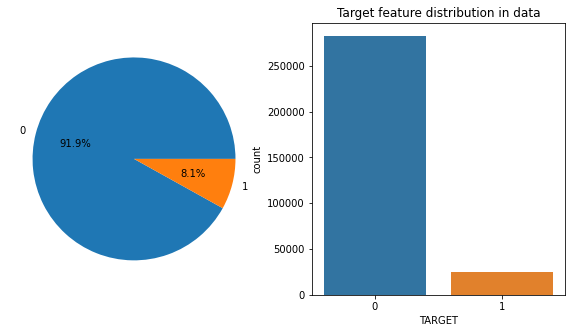

In [101]:
# Distribution of data in target feature

plt.figure(figsize=(10,5))

# plot pie chart
plt.subplot(1,2,1)
label = train.TARGET.value_counts().index
label_count = train.TARGET.value_counts().values
plt.pie(data = train, x = label_count, labels =label, autopct = '%1.1f%%', radius=1)

# countplot
plt.subplot(1,2,2)
sns.countplot(x='TARGET', data = train)
plt.title('Target feature distribution in data')

Berdasarkan pie chart dan countplot untuk feature 'TARGET' dapat dilihat bahwa jumlah TARGET dengan kategori 0 lebih bnyak dibandingkan kategori dengan persentase masing-masing 91.92% dan 8.08%. It means there are far more loans that were repaid on time than loans that were not repaid. From this information, we can see this is an imbalanced class problem. Once we get into more shophisticated  machine learning models, we can weight the class by their representation in the data to reflect this imbalance.

### Multivariat Numerik

In [102]:
train_num_nt = train_num.drop(['TARGET'], axis = 1)

1  CNT_CHILDREN


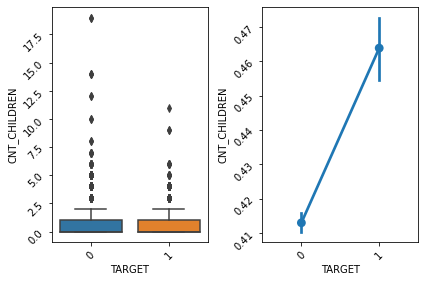

Confidence interval 95% untuk fitur CNT_CHILDREN pada client yang tidak memiliki kesulitan pembayaran adalah (0.4102958993664393, 0.415595725970507)
Confidence interval 95% untuk fitur CNT_CHILDREN pada client yang memiliki kesulitan pembayaran adalah (0.4543906784864558, 0.4732226145649037)
Tolak H(0)
**************************************************
2  AMT_INCOME_TOTAL


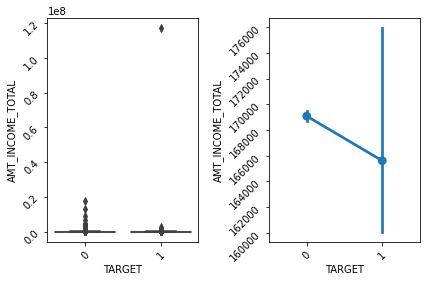

Confidence interval 95% untuk fitur AMT_INCOME_TOTAL pada client yang tidak memiliki kesulitan pembayaran adalah (168670.46691678805, 169484.97761484768)
Confidence interval 95% untuk fitur AMT_INCOME_TOTAL pada client yang memiliki kesulitan pembayaran adalah (156323.00846400924, 174900.5133486796)
Tolak H(0)
**************************************************
3  AMT_CREDIT


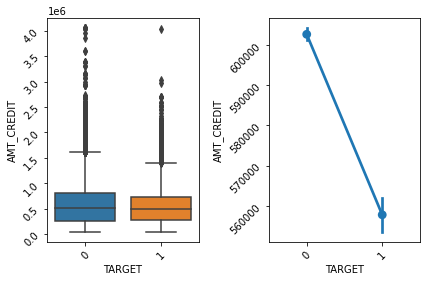

Confidence interval 95% untuk fitur AMT_CREDIT pada client yang tidak memiliki kesulitan pembayaran adalah (601148.5013308495, 604148.0626730276)
Confidence interval 95% untuk fitur AMT_CREDIT pada client yang memiliki kesulitan pembayaran adalah (553468.85597027, 562088.1993771619)
Tolak H(0)
**************************************************
4  AMT_ANNUITY


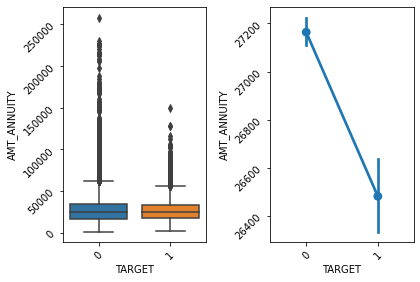

Confidence interval 95% untuk fitur AMT_ANNUITY pada client yang tidak memiliki kesulitan pembayaran adalah (27109.587544685095, 27217.659152924167)
Confidence interval 95% untuk fitur AMT_ANNUITY pada client yang memiliki kesulitan pembayaran adalah (26326.856349636044, 26636.63223042438)
Gagal menolak H(0)
**************************************************
5  AMT_GOODS_PRICE


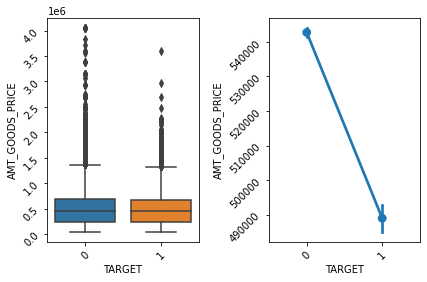

Confidence interval 95% untuk fitur AMT_GOODS_PRICE pada client yang tidak memiliki kesulitan pembayaran adalah (541358.8869361611, 544114.7030705308)
Confidence interval 95% untuk fitur AMT_GOODS_PRICE pada client yang memiliki kesulitan pembayaran adalah (485095.61654483934, 492849.20856401406)
Gagal menolak H(0)
**************************************************
6  REGION_POPULATION_RELATIVE


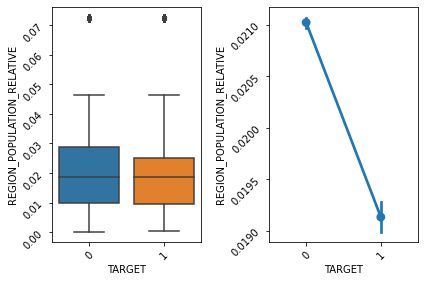

Confidence interval 95% untuk fitur REGION_POPULATION_RELATIVE pada client yang tidak memiliki kesulitan pembayaran adalah (0.020969171609304144, 0.021072223967413477)
Confidence interval 95% untuk fitur REGION_POPULATION_RELATIVE pada client yang memiliki kesulitan pembayaran adalah (0.018982501984522747, 0.01927868891175115)
Tolak H(0)
**************************************************
7  AGE


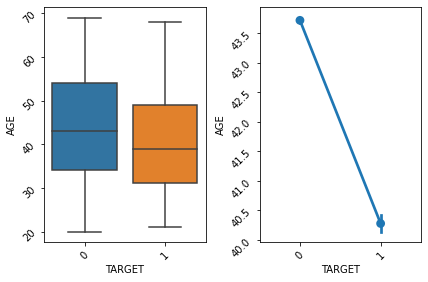

Confidence interval 95% untuk fitur AGE pada client yang tidak memiliki kesulitan pembayaran adalah (43.66905188713024, 43.75719490259405)
Confidence interval 95% untuk fitur AGE pada client yang memiliki kesulitan pembayaran adalah (40.137091659400255, 40.42282777665211)
Tolak H(0)
**************************************************
8  YEAR_EMPLOYED


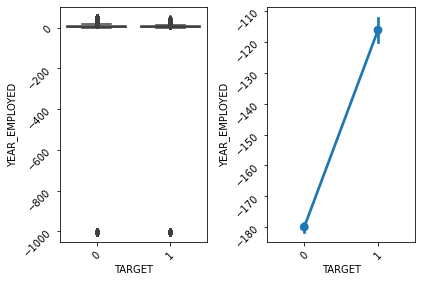

Confidence interval 95% untuk fitur YEAR_EMPLOYED pada client yang tidak memiliki kesulitan pembayaran adalah (-181.43245269728743, -178.54643016989314)
Confidence interval 95% untuk fitur YEAR_EMPLOYED pada client yang memiliki kesulitan pembayaran adalah (-120.2221338929858, -112.07745760365506)
Tolak H(0)
**************************************************
9  YEAR_REGISTRATION


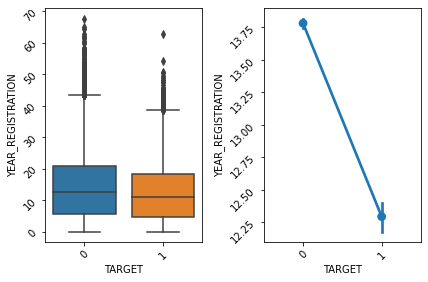

Confidence interval 95% untuk fitur YEAR_REGISTRATION pada client yang tidak memiliki kesulitan pembayaran adalah (13.74492331486946, 13.816397591974702)
Confidence interval 95% untuk fitur YEAR_REGISTRATION pada client yang memiliki kesulitan pembayaran adalah (12.181038240099035, 12.405959069837646)
Tolak H(0)
**************************************************
10  YEAR_ID_PUBLISH


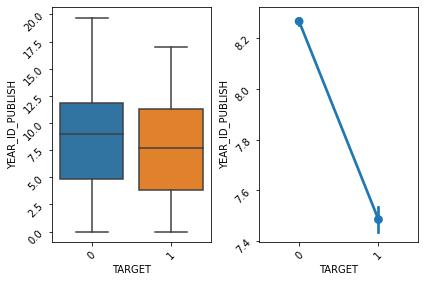

Confidence interval 95% untuk fitur YEAR_ID_PUBLISH pada client yang tidak memiliki kesulitan pembayaran adalah (8.251139357289377, 8.281571810016738)
Confidence interval 95% untuk fitur YEAR_ID_PUBLISH pada client yang memiliki kesulitan pembayaran adalah (7.433502080582992, 7.536906781451247)
Tolak H(0)
**************************************************
11  OWN_CAR_AGE


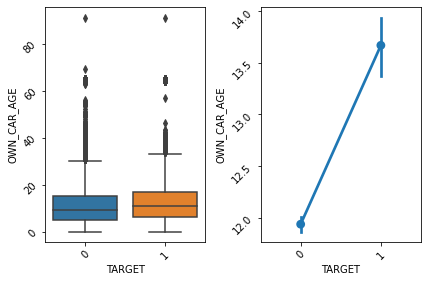

Confidence interval 95% untuk fitur OWN_CAR_AGE pada client yang tidak memiliki kesulitan pembayaran adalah (11.891704233500924, 11.979375905871898)
Confidence interval 95% untuk fitur OWN_CAR_AGE pada client yang memiliki kesulitan pembayaran adalah (13.51320059572382, 13.824180608077658)
Gagal menolak H(0)
**************************************************
12  FLAG_MOBIL


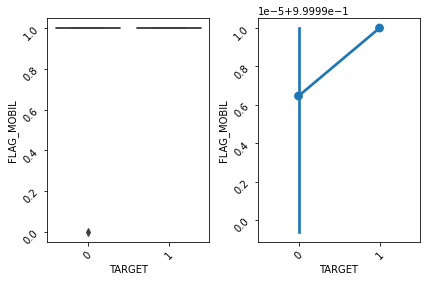

Confidence interval 95% untuk fitur FLAG_MOBIL pada client yang tidak memiliki kesulitan pembayaran adalah (0.9999895291157804, 1.000003395896424)
Confidence interval 95% untuk fitur FLAG_MOBIL pada client yang memiliki kesulitan pembayaran adalah (nan, nan)
Gagal menolak H(0)
**************************************************
13  FLAG_EMP_PHONE


/usr/local/lib/python3.7/dist-packages/scipy/stats/_distn_infrastructure.py:2128: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/usr/local/lib/python3.7/dist-packages/scipy/stats/_distn_infrastructure.py:2129: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


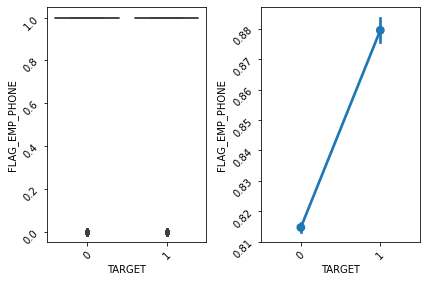

Confidence interval 95% untuk fitur FLAG_EMP_PHONE pada client yang tidak memiliki kesulitan pembayaran adalah (0.8132205631567216, 0.8160854512904033)
Confidence interval 95% untuk fitur FLAG_EMP_PHONE pada client yang memiliki kesulitan pembayaran adalah (0.875466952347178, 0.8835662802812209)
Tolak H(0)
**************************************************
14  FLAG_WORK_PHONE


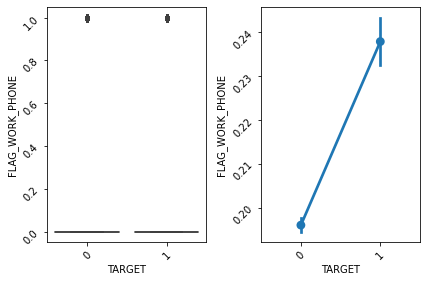

Confidence interval 95% untuk fitur FLAG_WORK_PHONE pada client yang tidak memiliki kesulitan pembayaran adalah (0.19452796482172632, 0.19745465900824757)
Confidence interval 95% untuk fitur FLAG_WORK_PHONE pada client yang memiliki kesulitan pembayaran adalah (0.23252826891405842, 0.24312127791373617)
Tolak H(0)
**************************************************
15  FLAG_CONT_MOBILE


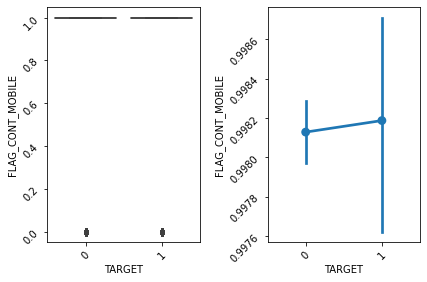

Confidence interval 95% untuk fitur FLAG_CONT_MOBILE pada client yang tidak memiliki kesulitan pembayaran adalah (0.9979693467476717, 0.9982879847084315)
Confidence interval 95% untuk fitur FLAG_CONT_MOBILE pada client yang memiliki kesulitan pembayaran adalah (0.9976581340852042, 0.9987164882712913)
Gagal menolak H(0)
**************************************************
16  FLAG_PHONE


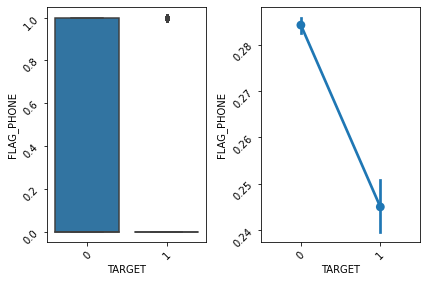

Confidence interval 95% untuk fitur FLAG_PHONE pada client yang tidak memiliki kesulitan pembayaran adalah (0.2825748968196436, 0.28590037256051676)
Confidence interval 95% untuk fitur FLAG_PHONE pada client yang memiliki kesulitan pembayaran adalah (0.23960457208370148, 0.25030479347521095)
Tolak H(0)
**************************************************
17  FLAG_EMAIL


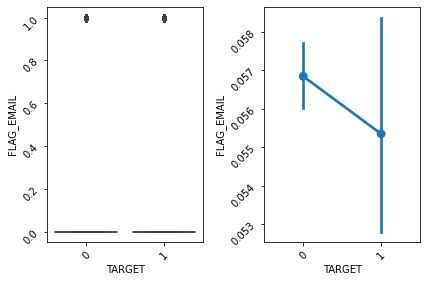

Confidence interval 95% untuk fitur FLAG_EMAIL pada client yang tidak memiliki kesulitan pembayaran adalah (0.055986919744997976, 0.0576939841554428)
Confidence interval 95% untuk fitur FLAG_EMAIL pada client yang memiliki kesulitan pembayaran adalah (0.0525028518551816, 0.05819201219315676)
Gagal menolak H(0)
**************************************************
18  CNT_FAM_MEMBERS


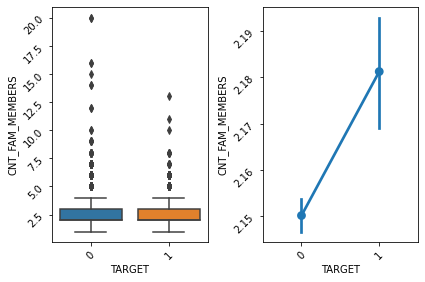

Confidence interval 95% untuk fitur CNT_FAM_MEMBERS pada client yang tidak memiliki kesulitan pembayaran adalah (2.1468100590725805, 2.1534969975701723)
Confidence interval 95% untuk fitur CNT_FAM_MEMBERS pada client yang memiliki kesulitan pembayaran adalah (2.169434258909768, 2.1931035054406847)
Gagal menolak H(0)
**************************************************
19  REGION_RATING_CLIENT


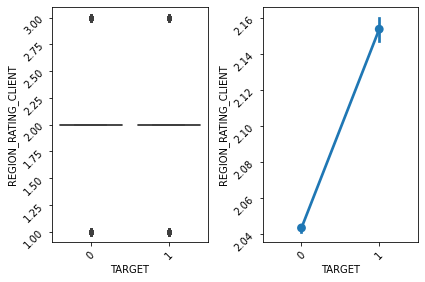

Confidence interval 95% untuk fitur REGION_RATING_CLIENT pada client yang tidak memiliki kesulitan pembayaran adalah (2.0417041594889485, 2.0454526151656154)
Confidence interval 95% untuk fitur REGION_RATING_CLIENT pada client yang memiliki kesulitan pembayaran adalah (2.147352544631856, 2.159918351642061)
Tolak H(0)
**************************************************
20  REGION_RATING_CLIENT_W_CITY


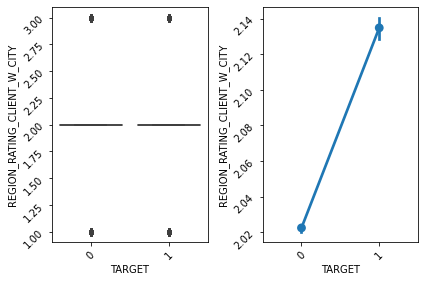

Confidence interval 95% untuk fitur REGION_RATING_CLIENT_W_CITY pada client yang tidak memiliki kesulitan pembayaran adalah (2.0205984899814067, 2.024299382569763)
Confidence interval 95% untuk fitur REGION_RATING_CLIENT_W_CITY pada client yang memiliki kesulitan pembayaran adalah (2.1286048356135403, 2.141042697115563)
Tolak H(0)
**************************************************
21  HOUR_APPR_PROCESS_START


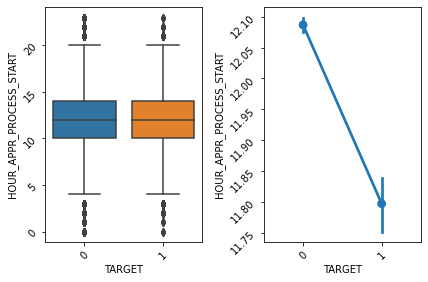

Confidence interval 95% untuk fitur HOUR_APPR_PROCESS_START pada client yang tidak memiliki kesulitan pembayaran adalah (12.074777329358412, 12.098835796158948)
Confidence interval 95% untuk fitur HOUR_APPR_PROCESS_START pada client yang memiliki kesulitan pembayaran adalah (11.756242622473597, 11.837956773296796)
Tolak H(0)
**************************************************
22  REG_REGION_NOT_LIVE_REGION


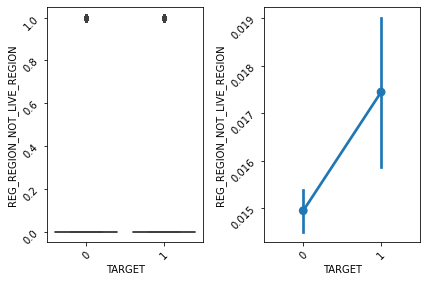

Confidence interval 95% untuk fitur REG_REGION_NOT_LIVE_REGION pada client yang tidak memiliki kesulitan pembayaran adalah (0.014495135714803526, 0.0153896127340054)
Confidence interval 95% untuk fitur REG_REGION_NOT_LIVE_REGION pada client yang memiliki kesulitan pembayaran adalah (0.015813504593616103, 0.019070684731660837)
Tolak H(0)
**************************************************
23  REG_REGION_NOT_WORK_REGION


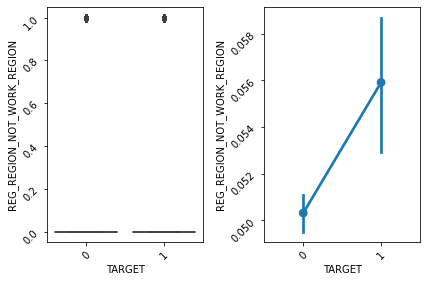

Confidence interval 95% untuk fitur REG_REGION_NOT_WORK_REGION pada client yang tidak memiliki kesulitan pembayaran adalah (0.0495114774160033, 0.05112314898926615)
Confidence interval 95% untuk fitur REG_REGION_NOT_WORK_REGION pada client yang memiliki kesulitan pembayaran adalah (0.05305319771314137, 0.05876956160206508)
Tolak H(0)
**************************************************
24  LIVE_REGION_NOT_WORK_REGION


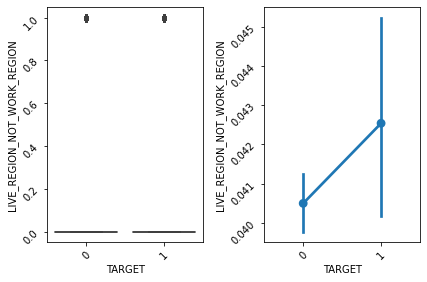

Confidence interval 95% untuk fitur LIVE_REGION_NOT_WORK_REGION pada client yang tidak memiliki kesulitan pembayaran adalah (0.03976705787652183, 0.04122032742023853)
Confidence interval 95% untuk fitur LIVE_REGION_NOT_WORK_REGION pada client yang memiliki kesulitan pembayaran adalah (0.040027141121312754, 0.04504838757959359)
Gagal menolak H(0)
**************************************************
25  REG_CITY_NOT_LIVE_CITY


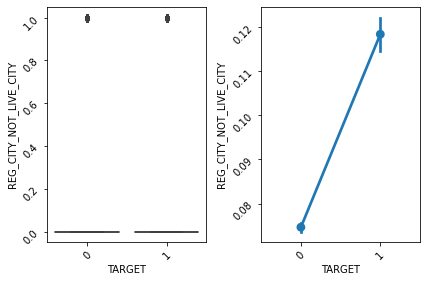

Confidence interval 95% untuk fitur REG_CITY_NOT_LIVE_CITY pada client yang tidak memiliki kesulitan pembayaran adalah (0.07367230202879796, 0.07560994045933375)
Confidence interval 95% untuk fitur REG_CITY_NOT_LIVE_CITY pada client yang memiliki kesulitan pembayaran adalah (0.1143696367175104, 0.12240780537715225)
Tolak H(0)
**************************************************
26  REG_CITY_NOT_WORK_CITY


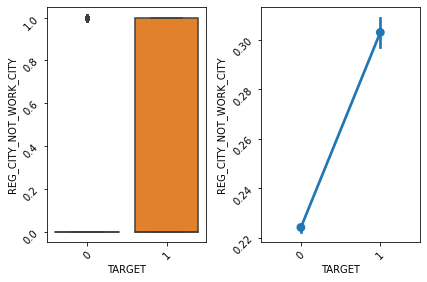

Confidence interval 95% untuk fitur REG_CITY_NOT_WORK_CITY pada client yang tidak memiliki kesulitan pembayaran adalah (0.22255247957663804, 0.22562677231415246)
Confidence interval 95% untuk fitur REG_CITY_NOT_WORK_CITY pada client yang memiliki kesulitan pembayaran adalah (0.29720382934027473, 0.3086370568631493)
Tolak H(0)
**************************************************
27  LIVE_CITY_NOT_WORK_CITY


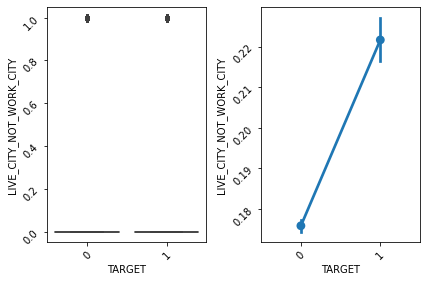

Confidence interval 95% untuk fitur LIVE_CITY_NOT_WORK_CITY pada client yang tidak memiliki kesulitan pembayaran adalah (0.17445250588514788, 0.1772592874120087)
Confidence interval 95% untuk fitur LIVE_CITY_NOT_WORK_CITY pada client yang memiliki kesulitan pembayaran adalah (0.2165043275811762, 0.2268390762456113)
Tolak H(0)
**************************************************
28  EXT_SOURCE_1


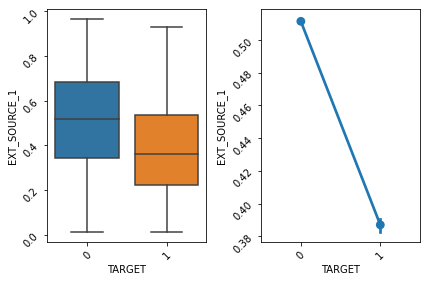

Confidence interval 95% untuk fitur EXT_SOURCE_1 pada client yang tidak memiliki kesulitan pembayaran adalah (0.5106915155310198, 0.5122309723117867)
Confidence interval 95% untuk fitur EXT_SOURCE_1 pada client yang memiliki kesulitan pembayaran adalah (0.3844212764321197, 0.38951497533261364)
Gagal menolak H(0)
**************************************************
29  EXT_SOURCE_2


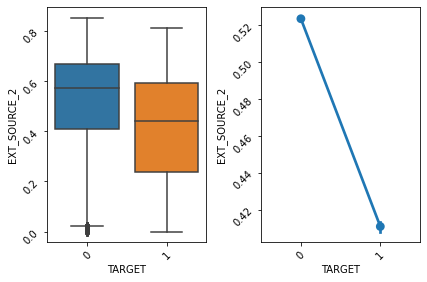

Confidence interval 95% untuk fitur EXT_SOURCE_2 pada client yang tidak memiliki kesulitan pembayaran adalah (0.522791986033408, 0.5241653520034366)
Confidence interval 95% untuk fitur EXT_SOURCE_2 pada client yang memiliki kesulitan pembayaran adalah (0.4082838279908748, 0.4135859859473484)
Gagal menolak H(0)
**************************************************
30  EXT_SOURCE_3


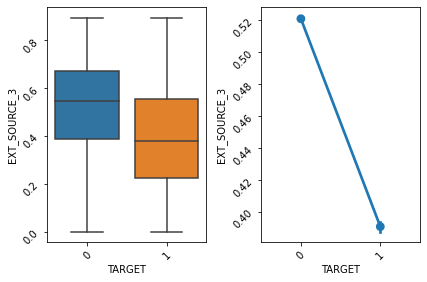

Confidence interval 95% untuk fitur EXT_SOURCE_3 pada client yang tidak memiliki kesulitan pembayaran adalah (0.5202668363410249, 0.5216710815340967)
Confidence interval 95% untuk fitur EXT_SOURCE_3 pada client yang memiliki kesulitan pembayaran adalah (0.3881562870542276, 0.3932768947467313)
Gagal menolak H(0)
**************************************************
31  APARTMENTS_AVG


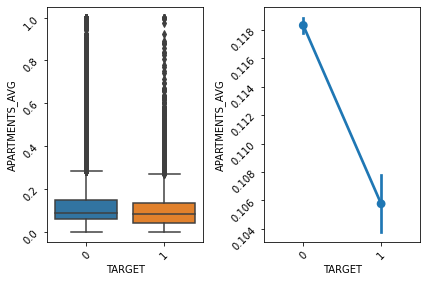

Confidence interval 95% untuk fitur APARTMENTS_AVG pada client yang tidak memiliki kesulitan pembayaran adalah (0.11791295416457798, 0.11871448178744812)
Confidence interval 95% untuk fitur APARTMENTS_AVG pada client yang memiliki kesulitan pembayaran adalah (0.10451043608565844, 0.10702231533749146)
Gagal menolak H(0)
**************************************************
32  BASEMENTAREA_AVG


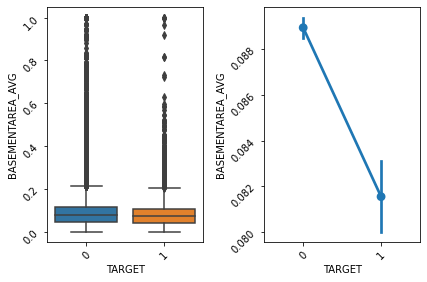

Confidence interval 95% untuk fitur BASEMENTAREA_AVG pada client yang tidak memiliki kesulitan pembayaran adalah (0.08864630376485556, 0.0892581422323999)
Confidence interval 95% untuk fitur BASEMENTAREA_AVG pada client yang memiliki kesulitan pembayaran adalah (0.08062392314209367, 0.08247224164679905)
Gagal menolak H(0)
**************************************************
33  YEARS_BEGINEXPLUATATION_AVG


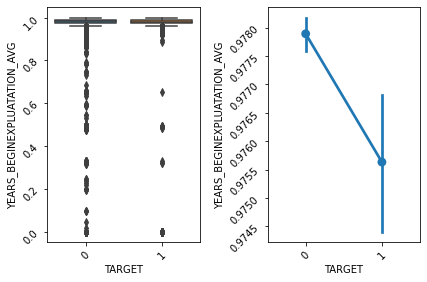

Confidence interval 95% untuk fitur YEARS_BEGINEXPLUATATION_AVG pada client yang tidak memiliki kesulitan pembayaran adalah (0.9776775436793926, 0.9781081547102254)
Confidence interval 95% untuk fitur YEARS_BEGINEXPLUATATION_AVG pada client yang memiliki kesulitan pembayaran adalah (0.9747739303315809, 0.9764943459686827)
Gagal menolak H(0)
**************************************************
34  YEARS_BUILD_AVG


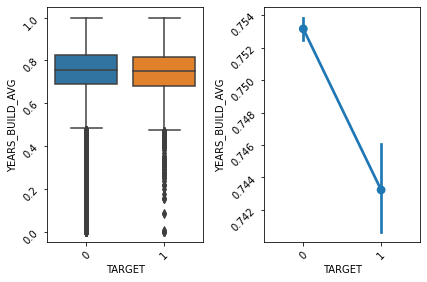

Confidence interval 95% untuk fitur YEARS_BUILD_AVG pada client yang tidak memiliki kesulitan pembayaran adalah (0.7527349842632289, 0.7535704321559109)
Confidence interval 95% untuk fitur YEARS_BUILD_AVG pada client yang memiliki kesulitan pembayaran adalah (0.7418327397494532, 0.7446290074939735)
Gagal menolak H(0)
**************************************************
35  COMMONAREA_AVG


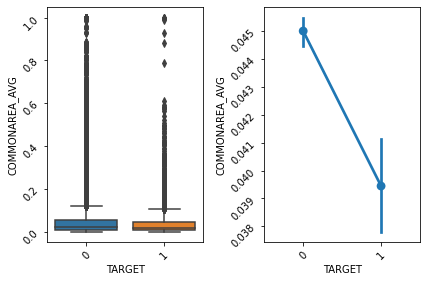

Confidence interval 95% untuk fitur COMMONAREA_AVG pada client yang tidak memiliki kesulitan pembayaran adalah (0.044722363874584926, 0.04528762174760329)
Confidence interval 95% untuk fitur COMMONAREA_AVG pada client yang memiliki kesulitan pembayaran adalah (0.03861400098538563, 0.04027390904273059)
Gagal menolak H(0)
**************************************************
36  ELEVATORS_AVG


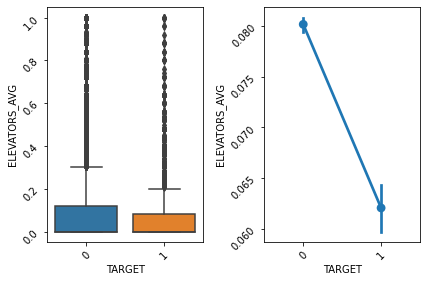

Confidence interval 95% untuk fitur ELEVATORS_AVG pada client yang tidak memiliki kesulitan pembayaran adalah (0.07969470704858092, 0.08069420627129043)
Confidence interval 95% untuk fitur ELEVATORS_AVG pada client yang memiliki kesulitan pembayaran adalah (0.06055423468977721, 0.06351825774210976)
Gagal menolak H(0)
**************************************************
37  ENTRANCES_AVG


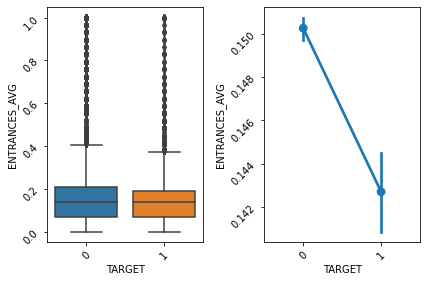

Confidence interval 95% untuk fitur ENTRANCES_AVG pada client yang tidak memiliki kesulitan pembayaran adalah (0.14987969452469194, 0.15061822972338482)
Confidence interval 95% untuk fitur ENTRANCES_AVG pada client yang memiliki kesulitan pembayaran adalah (0.14148618968352766, 0.14392779185029558)
Gagal menolak H(0)
**************************************************
38  FLOORSMAX_AVG


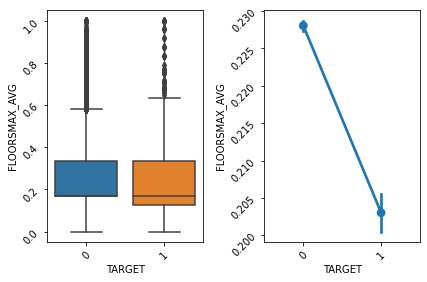

Confidence interval 95% untuk fitur FLOORSMAX_AVG pada client yang tidak memiliki kesulitan pembayaran adalah (0.22748806092038765, 0.2285587866410123)
Confidence interval 95% untuk fitur FLOORSMAX_AVG pada client yang memiliki kesulitan pembayaran adalah (0.20134909797594447, 0.2046933516105252)
Gagal menolak H(0)
**************************************************
39  FLOORSMIN_AVG


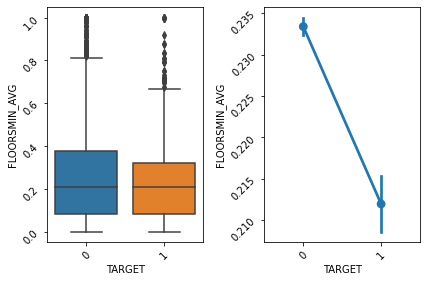

Confidence interval 95% untuk fitur FLOORSMIN_AVG pada client yang tidak memiliki kesulitan pembayaran adalah (0.23277183135245028, 0.23396754856324947)
Confidence interval 95% untuk fitur FLOORSMIN_AVG pada client yang memiliki kesulitan pembayaran adalah (0.2101098546432629, 0.2138102861811467)
Gagal menolak H(0)
**************************************************
40  LANDAREA_AVG


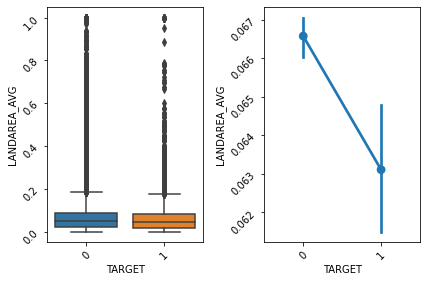

Confidence interval 95% untuk fitur LANDAREA_AVG pada client yang tidak memiliki kesulitan pembayaran adalah (0.06627593760384538, 0.06687460112248848)
Confidence interval 95% untuk fitur LANDAREA_AVG pada client yang memiliki kesulitan pembayaran adalah (0.06210115334755053, 0.06411405133081206)
Gagal menolak H(0)
**************************************************
41  LIVINGAPARTMENTS_AVG


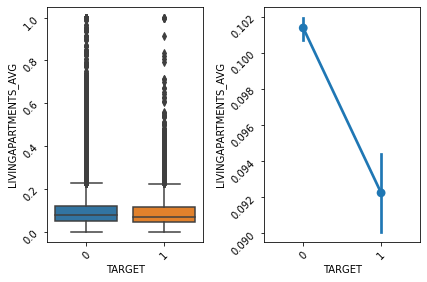

Confidence interval 95% untuk fitur LIVINGAPARTMENTS_AVG pada client yang tidak memiliki kesulitan pembayaran adalah (0.10106252936362613, 0.10174752923982387)
Confidence interval 95% untuk fitur LIVINGAPARTMENTS_AVG pada client yang memiliki kesulitan pembayaran adalah (0.09116668524696546, 0.09334371308214091)
Gagal menolak H(0)
**************************************************
42  LIVINGAREA_AVG


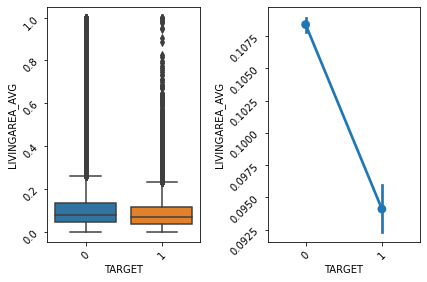

Confidence interval 95% untuk fitur LIVINGAREA_AVG pada client yang tidak memiliki kesulitan pembayaran adalah (0.10798959042366622, 0.10880955171340932)
Confidence interval 95% untuk fitur LIVINGAREA_AVG pada client yang memiliki kesulitan pembayaran adalah (0.09284509932363216, 0.0953474524777492)
Gagal menolak H(0)
**************************************************
43  NONLIVINGAPARTMENTS_AVG


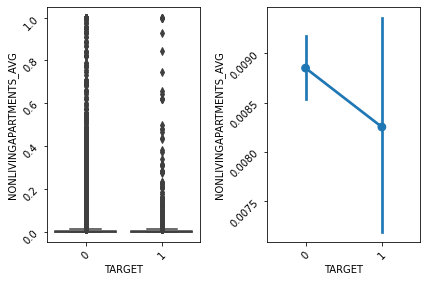

Confidence interval 95% untuk fitur NONLIVINGAPARTMENTS_AVG pada client yang tidak memiliki kesulitan pembayaran adalah (0.008673729454301655, 0.009026241973943238)
Confidence interval 95% untuk fitur NONLIVINGAPARTMENTS_AVG pada client yang memiliki kesulitan pembayaran adalah (0.007672393173735998, 0.008832346746239379)
Gagal menolak H(0)
**************************************************
44  NONLIVINGAREA_AVG


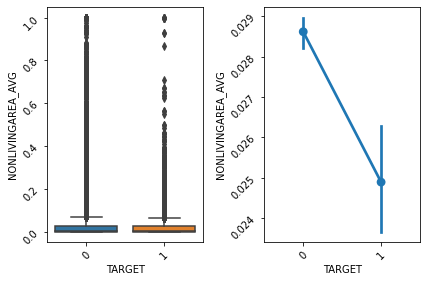

Confidence interval 95% untuk fitur NONLIVINGAREA_AVG pada client yang tidak memiliki kesulitan pembayaran adalah (0.028356419411034978, 0.02887263290557636)
Confidence interval 95% untuk fitur NONLIVINGAREA_AVG pada client yang memiliki kesulitan pembayaran adalah (0.02411136891121908, 0.025663186117743528)
Gagal menolak H(0)
**************************************************
45  APARTMENTS_MODE


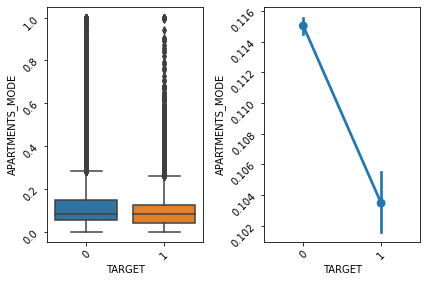

Confidence interval 95% untuk fitur APARTMENTS_MODE pada client yang tidak memiliki kesulitan pembayaran adalah (0.11463691220062684, 0.11543593429713762)
Confidence interval 95% untuk fitur APARTMENTS_MODE pada client yang memiliki kesulitan pembayaran adalah (0.10220351870645744, 0.1047231606104306)
Gagal menolak H(0)
**************************************************
46  BASEMENTAREA_MODE


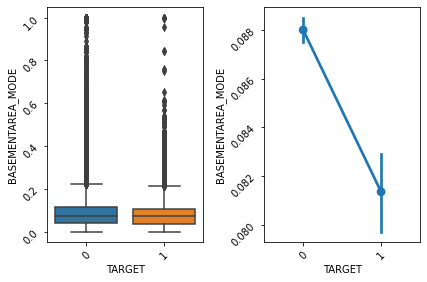

Confidence interval 95% untuk fitur BASEMENTAREA_MODE pada client yang tidak memiliki kesulitan pembayaran adalah (0.0876879073556205, 0.08831354068741669)
Confidence interval 95% untuk fitur BASEMENTAREA_MODE pada client yang memiliki kesulitan pembayaran adalah (0.08041058893712191, 0.08230672072487877)
Gagal menolak H(0)
**************************************************
47  YEARS_BEGINEXPLUATATION_MODE


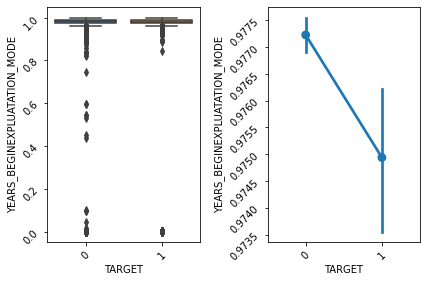

Confidence interval 95% untuk fitur YEARS_BEGINEXPLUATATION_MODE pada client yang tidak memiliki kesulitan pembayaran adalah (0.9769901338346905, 0.9774606679429421)
Confidence interval 95% untuk fitur YEARS_BEGINEXPLUATATION_MODE pada client yang memiliki kesulitan pembayaran adalah (0.9740188794322677, 0.9758562589901703)
Gagal menolak H(0)
**************************************************
48  YEARS_BUILD_MODE


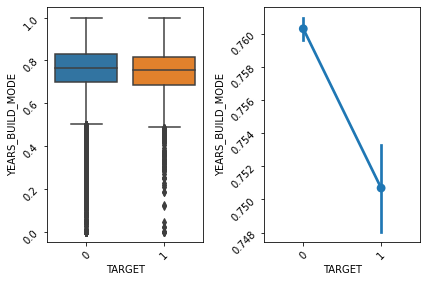

Confidence interval 95% untuk fitur YEARS_BUILD_MODE pada client yang tidak memiliki kesulitan pembayaran adalah (0.7598910863342317, 0.7607031460183723)
Confidence interval 95% untuk fitur YEARS_BUILD_MODE pada client yang memiliki kesulitan pembayaran adalah (0.7493286811192762, 0.7520475982134914)
Gagal menolak H(0)
**************************************************
49  COMMONAREA_MODE


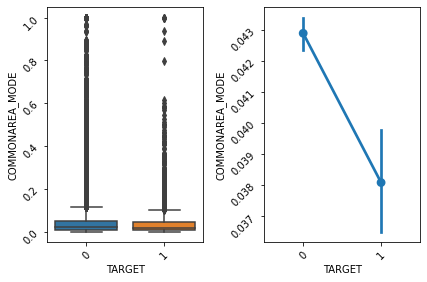

Confidence interval 95% untuk fitur COMMONAREA_MODE pada client yang tidak memiliki kesulitan pembayaran adalah (0.04260806496246857, 0.04316105984621379)
Confidence interval 95% untuk fitur COMMONAREA_MODE pada client yang memiliki kesulitan pembayaran adalah (0.03726396524105352, 0.03891279202230169)
Gagal menolak H(0)
**************************************************
50  ELEVATORS_MODE


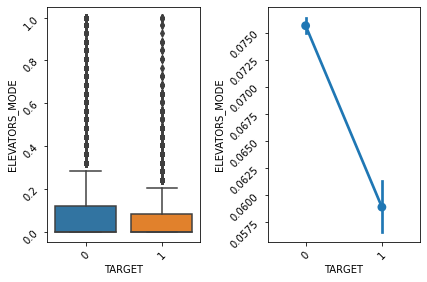

Confidence interval 95% untuk fitur ELEVATORS_MODE pada client yang tidak memiliki kesulitan pembayaran adalah (0.07515560614799664, 0.0761376658585848)
Confidence interval 95% untuk fitur ELEVATORS_MODE pada client yang memiliki kesulitan pembayaran adalah (0.05741661257969224, 0.06034407359588798)
Gagal menolak H(0)
**************************************************
51  ENTRANCES_MODE


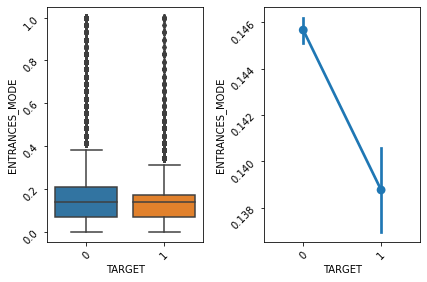

Confidence interval 95% untuk fitur ENTRANCES_MODE pada client yang tidak memiliki kesulitan pembayaran adalah (0.14529983874000707, 0.14604526821506408)
Confidence interval 95% untuk fitur ENTRANCES_MODE pada client yang memiliki kesulitan pembayaran adalah (0.13753755263629533, 0.14000092484627488)
Gagal menolak H(0)
**************************************************
52  FLOORSMAX_MODE


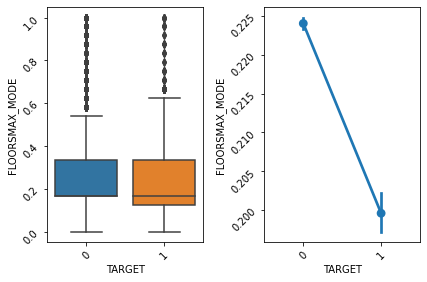

Confidence interval 95% untuk fitur FLOORSMAX_MODE pada client yang tidak memiliki kesulitan pembayaran adalah (0.22348285856530872, 0.22454672885554985)
Confidence interval 95% untuk fitur FLOORSMAX_MODE pada client yang memiliki kesulitan pembayaran adalah (0.19795091940961232, 0.20127363221198422)
Gagal menolak H(0)
**************************************************
53  FLOORSMIN_MODE


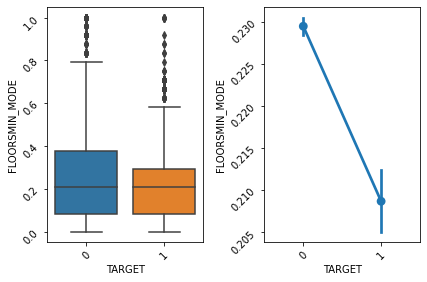

Confidence interval 95% untuk fitur FLOORSMIN_MODE pada client yang tidak memiliki kesulitan pembayaran adalah (0.2288954338606706, 0.23008957895817087)
Confidence interval 95% untuk fitur FLOORSMIN_MODE pada client yang memiliki kesulitan pembayaran adalah (0.20684746183478142, 0.21054168295031467)
Gagal menolak H(0)
**************************************************
54  LANDAREA_MODE


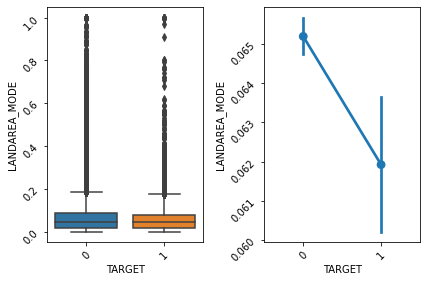

Confidence interval 95% untuk fitur LANDAREA_MODE pada client yang tidak memiliki kesulitan pembayaran adalah (0.06488399629053761, 0.06548708804681179)
Confidence interval 95% untuk fitur LANDAREA_MODE pada client yang memiliki kesulitan pembayaran adalah (0.06091374107989977, 0.062929602573351)
Gagal menolak H(0)
**************************************************
55  LIVINGAPARTMENTS_MODE


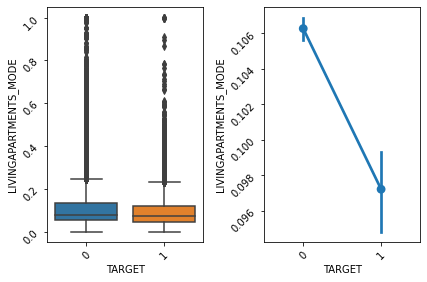

Confidence interval 95% untuk fitur LIVINGAPARTMENTS_MODE pada client yang tidak memiliki kesulitan pembayaran adalah (0.10590569185608162, 0.10662957726729463)
Confidence interval 95% untuk fitur LIVINGAPARTMENTS_MODE pada client yang memiliki kesulitan pembayaran adalah (0.09606597763892066, 0.09838671518518796)
Gagal menolak H(0)
**************************************************
56  LIVINGAREA_MODE


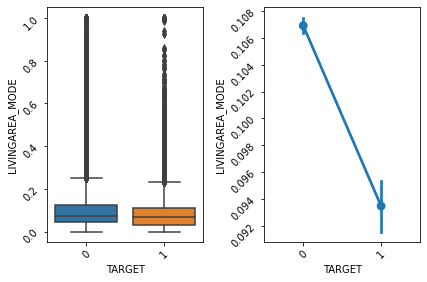

Confidence interval 95% untuk fitur LIVINGAREA_MODE pada client yang tidak memiliki kesulitan pembayaran adalah (0.10650163459347914, 0.10733088416788478)
Confidence interval 95% untuk fitur LIVINGAREA_MODE pada client yang memiliki kesulitan pembayaran adalah (0.09218882585796953, 0.0947337614110243)
Gagal menolak H(0)
**************************************************
57  NONLIVINGAPARTMENTS_MODE


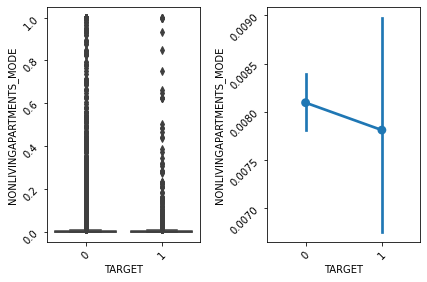

Confidence interval 95% untuk fitur NONLIVINGAPARTMENTS_MODE pada client yang tidak memiliki kesulitan pembayaran adalah (0.007925521871733647, 0.008266512322942865)
Confidence interval 95% untuk fitur NONLIVINGAPARTMENTS_MODE pada client yang memiliki kesulitan pembayaran adalah (0.007232013785358132, 0.008392116716334696)
Gagal menolak H(0)
**************************************************
58  NONLIVINGAREA_MODE


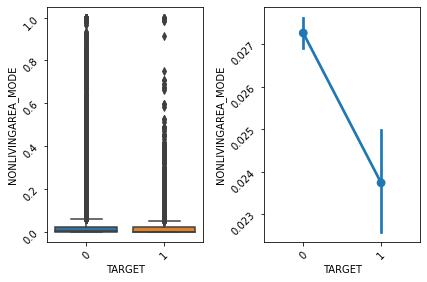

Confidence interval 95% untuk fitur NONLIVINGAREA_MODE pada client yang tidak memiliki kesulitan pembayaran adalah (0.027004436107228906, 0.02752598295552921)
Confidence interval 95% untuk fitur NONLIVINGAREA_MODE pada client yang memiliki kesulitan pembayaran adalah (0.02295285662602254, 0.024526005933219165)
Gagal menolak H(0)
**************************************************
59  APARTMENTS_MEDI


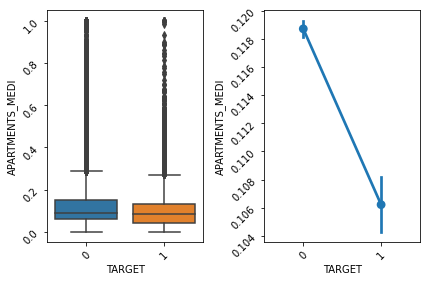

Confidence interval 95% untuk fitur APARTMENTS_MEDI pada client yang tidak memiliki kesulitan pembayaran adalah (0.11831659783273858, 0.11912444112830033)
Confidence interval 95% untuk fitur APARTMENTS_MEDI pada client yang memiliki kesulitan pembayaran adalah (0.10494810772503707, 0.10747354312885288)
Gagal menolak H(0)
**************************************************
60  BASEMENTAREA_MEDI


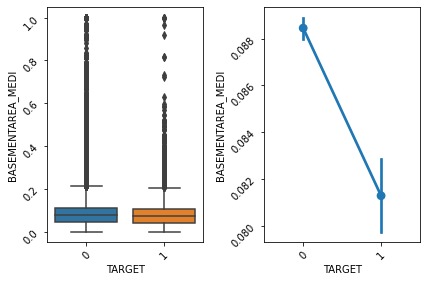

Confidence interval 95% untuk fitur BASEMENTAREA_MEDI pada client yang tidak memiliki kesulitan pembayaran adalah (0.08814352111926427, 0.08875328224154255)
Confidence interval 95% untuk fitur BASEMENTAREA_MEDI pada client yang memiliki kesulitan pembayaran adalah (0.0803578178975162, 0.08220854149704396)
Gagal menolak H(0)
**************************************************
61  YEARS_BEGINEXPLUATATION_MEDI


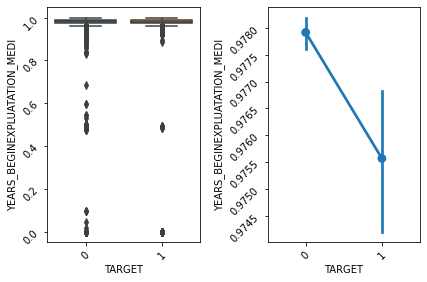

Confidence interval 95% untuk fitur YEARS_BEGINEXPLUATATION_MEDI pada client yang tidak memiliki kesulitan pembayaran adalah (0.9776987166603852, 0.9781341094607037)
Confidence interval 95% untuk fitur YEARS_BEGINEXPLUATATION_MEDI pada client yang memiliki kesulitan pembayaran adalah (0.9746974412256445, 0.9764418889005243)
Gagal menolak H(0)
**************************************************
62  YEARS_BUILD_MEDI


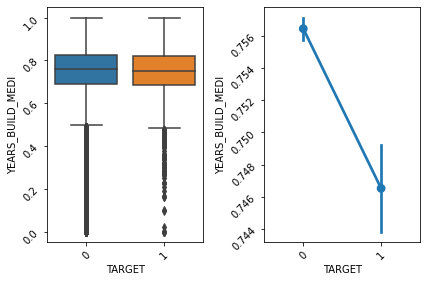

Confidence interval 95% untuk fitur YEARS_BUILD_MEDI pada client yang tidak memiliki kesulitan pembayaran adalah (0.7560123781904561, 0.7568388698684086)
Confidence interval 95% untuk fitur YEARS_BUILD_MEDI pada client yang memiliki kesulitan pembayaran adalah (0.7451486004331155, 0.7479150127984365)
Gagal menolak H(0)
**************************************************
63  COMMONAREA_MEDI


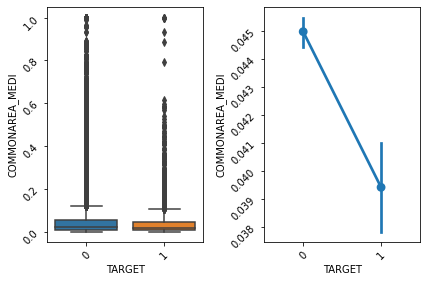

Confidence interval 95% untuk fitur COMMONAREA_MEDI pada client yang tidak memiliki kesulitan pembayaran adalah (0.04469737773504624, 0.04526344040882463)
Confidence interval 95% untuk fitur COMMONAREA_MEDI pada client yang memiliki kesulitan pembayaran adalah (0.0385732851971926, 0.04023564951071117)
Gagal menolak H(0)
**************************************************
64  ELEVATORS_MEDI


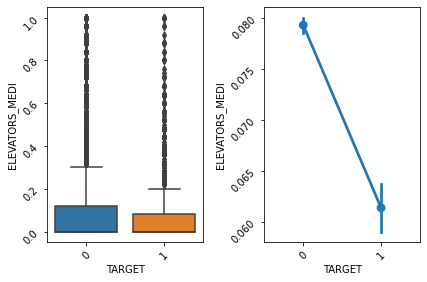

Confidence interval 95% untuk fitur ELEVATORS_MEDI pada client yang tidak memiliki kesulitan pembayaran adalah (0.07881811447090291, 0.07981684177769481)
Confidence interval 95% untuk fitur ELEVATORS_MEDI pada client yang memiliki kesulitan pembayaran adalah (0.05987199055706105, 0.06283234849440211)
Gagal menolak H(0)
**************************************************
65  ENTRANCES_MEDI


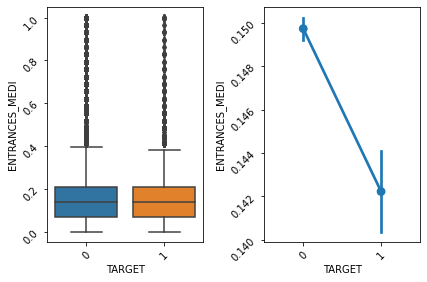

Confidence interval 95% untuk fitur ENTRANCES_MEDI pada client yang tidak memiliki kesulitan pembayaran adalah (0.14936425329925937, 0.1501051495965167)
Confidence interval 95% untuk fitur ENTRANCES_MEDI pada client yang memiliki kesulitan pembayaran adalah (0.14100219278635703, 0.1434514910274737)
Gagal menolak H(0)
**************************************************
66  FLOORSMAX_MEDI


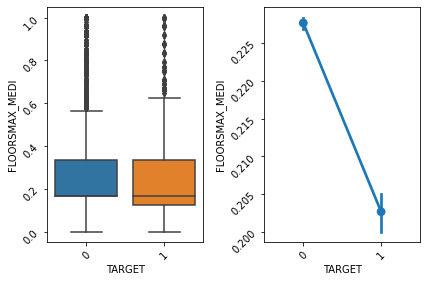

Confidence interval 95% untuk fitur FLOORSMAX_MEDI pada client yang tidak memiliki kesulitan pembayaran adalah (0.22709692046012786, 0.22817086775388445)
Confidence interval 95% untuk fitur FLOORSMAX_MEDI pada client yang memiliki kesulitan pembayaran adalah (0.20101643060916796, 0.20436792028758888)
Gagal menolak H(0)
**************************************************
67  FLOORSMIN_MEDI


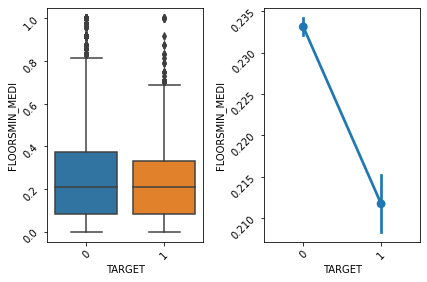

Confidence interval 95% untuk fitur FLOORSMIN_MEDI pada client yang tidak memiliki kesulitan pembayaran adalah (0.23249653804033002, 0.23369651805839678)
Confidence interval 95% untuk fitur FLOORSMIN_MEDI pada client yang memiliki kesulitan pembayaran adalah (0.20990089337494874, 0.21360633854525082)
Gagal menolak H(0)
**************************************************
68  LANDAREA_MEDI


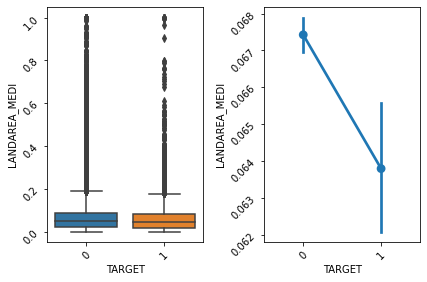

Confidence interval 95% untuk fitur LANDAREA_MEDI pada client yang tidak memiliki kesulitan pembayaran adalah (0.06711894490047139, 0.06772529089987285)
Confidence interval 95% untuk fitur LANDAREA_MEDI pada client yang memiliki kesulitan pembayaran adalah (0.06278401787900352, 0.064801625969179)
Gagal menolak H(0)
**************************************************
69  LIVINGAPARTMENTS_MEDI


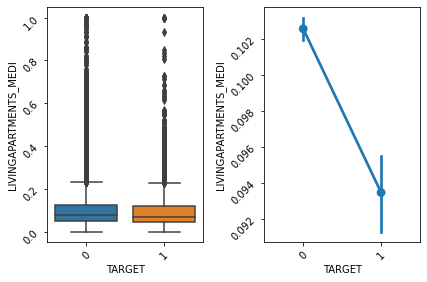

Confidence interval 95% untuk fitur LIVINGAPARTMENTS_MEDI pada client yang tidak memiliki kesulitan pembayaran adalah (0.10223519283404378, 0.10292790133982416)
Confidence interval 95% untuk fitur LIVINGAPARTMENTS_MEDI pada client yang memiliki kesulitan pembayaran adalah (0.09237229569921532, 0.09458348529436961)
Gagal menolak H(0)
**************************************************
70  LIVINGAREA_MEDI


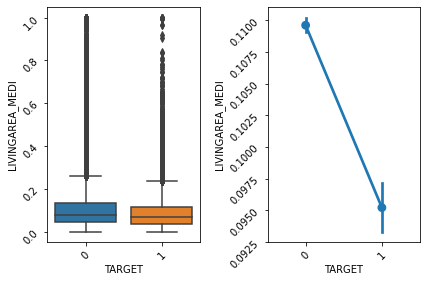

Confidence interval 95% untuk fitur LIVINGAREA_MEDI pada client yang tidak memiliki kesulitan pembayaran adalah (0.10919838527709917, 0.11003100530325706)
Confidence interval 95% untuk fitur LIVINGAREA_MEDI pada client yang memiliki kesulitan pembayaran adalah (0.09393701386961055, 0.09647399975741953)
Gagal menolak H(0)
**************************************************
71  NONLIVINGAPARTMENTS_MEDI


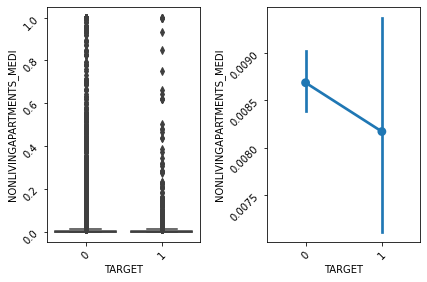

Confidence interval 95% untuk fitur NONLIVINGAPARTMENTS_MEDI pada client yang tidak memiliki kesulitan pembayaran adalah (0.00851165393901967, 0.008861623469865002)
Confidence interval 95% untuk fitur NONLIVINGAPARTMENTS_MEDI pada client yang memiliki kesulitan pembayaran adalah (0.007590467421200926, 0.008752130301175191)
Gagal menolak H(0)
**************************************************
72  NONLIVINGAREA_MEDI


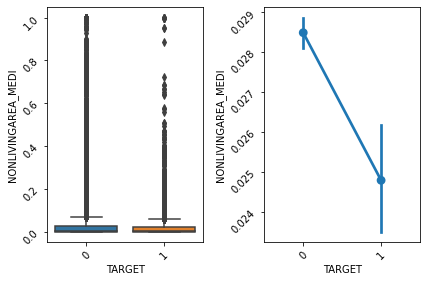

Confidence interval 95% untuk fitur NONLIVINGAREA_MEDI pada client yang tidak memiliki kesulitan pembayaran adalah (0.028230009145711346, 0.028750909394971554)
Confidence interval 95% untuk fitur NONLIVINGAREA_MEDI pada client yang memiliki kesulitan pembayaran adalah (0.024010158444380484, 0.025581015857883863)
Gagal menolak H(0)
**************************************************
73  TOTALAREA_MODE


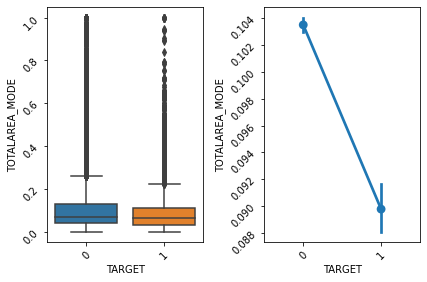

Confidence interval 95% untuk fitur TOTALAREA_MODE pada client yang tidak memiliki kesulitan pembayaran adalah (0.10310860060054815, 0.10390517194762329)
Confidence interval 95% untuk fitur TOTALAREA_MODE pada client yang memiliki kesulitan pembayaran adalah (0.08854320631496003, 0.09099464780861223)
Gagal menolak H(0)
**************************************************
74  OBS_30_CNT_SOCIAL_CIRCLE


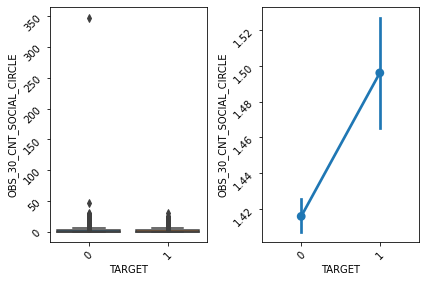

Confidence interval 95% untuk fitur OBS_30_CNT_SOCIAL_CIRCLE pada client yang tidak memiliki kesulitan pembayaran adalah (1.4068844208273616, 1.4246000254472344)
Confidence interval 95% untuk fitur OBS_30_CNT_SOCIAL_CIRCLE pada client yang memiliki kesulitan pembayaran adalah (1.4665594284853507, 1.525735541057592)
Gagal menolak H(0)
**************************************************
75  DEF_30_CNT_SOCIAL_CIRCLE


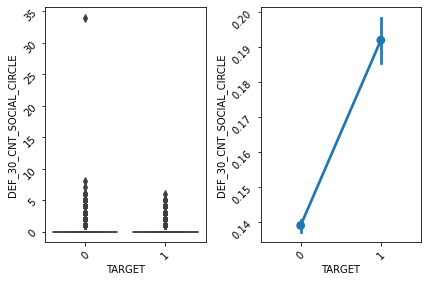

Confidence interval 95% untuk fitur DEF_30_CNT_SOCIAL_CIRCLE pada client yang tidak memiliki kesulitan pembayaran adalah (0.1375263914265539, 0.14076868029843112)
Confidence interval 95% untuk fitur DEF_30_CNT_SOCIAL_CIRCLE pada client yang memiliki kesulitan pembayaran adalah (0.18555469200304653, 0.19840593569472265)
Gagal menolak H(0)
**************************************************
76  OBS_60_CNT_SOCIAL_CIRCLE


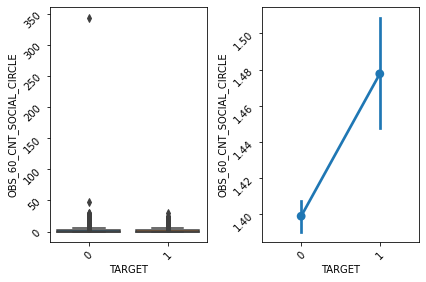

Confidence interval 95% untuk fitur OBS_60_CNT_SOCIAL_CIRCLE pada client yang tidak memiliki kesulitan pembayaran adalah (1.3901428222334316, 1.4077031208054644)
Confidence interval 95% untuk fitur OBS_60_CNT_SOCIAL_CIRCLE pada client yang memiliki kesulitan pembayaran adalah (1.4483637657858424, 1.5069793299421015)
Gagal menolak H(0)
**************************************************
77  DEF_60_CNT_SOCIAL_CIRCLE


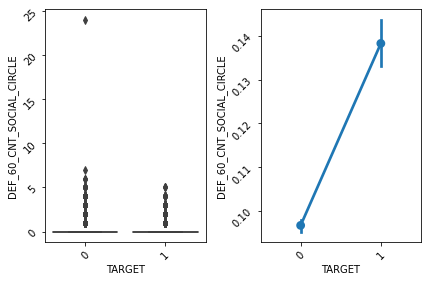

Confidence interval 95% untuk fitur DEF_60_CNT_SOCIAL_CIRCLE pada client yang tidak memiliki kesulitan pembayaran adalah (0.09537612430974267, 0.09799912107454777)
Confidence interval 95% untuk fitur DEF_60_CNT_SOCIAL_CIRCLE pada client yang memiliki kesulitan pembayaran adalah (0.13292685136309282, 0.14356675467184202)
Gagal menolak H(0)
**************************************************
78  DAYS_LAST_PHONE_CHANGE


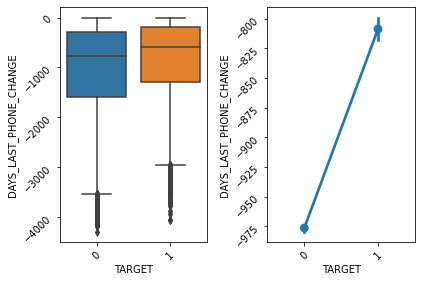

Confidence interval 95% untuk fitur DAYS_LAST_PHONE_CHANGE pada client yang tidak memiliki kesulitan pembayaran adalah (-979.4524367993293, -973.3241519832378)
Confidence interval 95% untuk fitur DAYS_LAST_PHONE_CHANGE pada client yang memiliki kesulitan pembayaran adalah (-818.2275586533572, -799.3660767947797)
Gagal menolak H(0)
**************************************************
79  FLAG_DOCUMENT_2


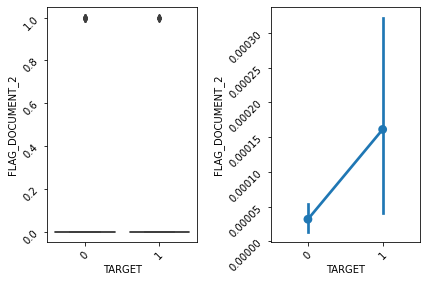

Confidence interval 95% untuk fitur FLAG_DOCUMENT_2 pada client yang tidak memiliki kesulitan pembayaran adalah (1.1037568440130229e-05, 5.2637321720684243e-05)
Confidence interval 95% untuk fitur FLAG_DOCUMENT_2 pada client yang memiliki kesulitan pembayaran adalah (3.227302172264737e-06, 0.00031902848836147144)
Tolak H(0)
**************************************************
80  FLAG_DOCUMENT_3


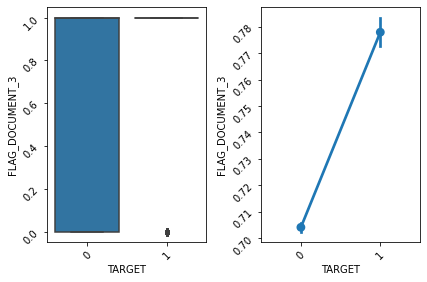

Confidence interval 95% untuk fitur FLAG_DOCUMENT_3 pada client yang tidak memiliki kesulitan pembayaran adalah (0.7023776416900342, 0.7057430293018083)
Confidence interval 95% untuk fitur FLAG_DOCUMENT_3 pada client yang memiliki kesulitan pembayaran adalah (0.7727547496565312, 0.7830962070403469)
Tolak H(0)
**************************************************
81  FLAG_DOCUMENT_4


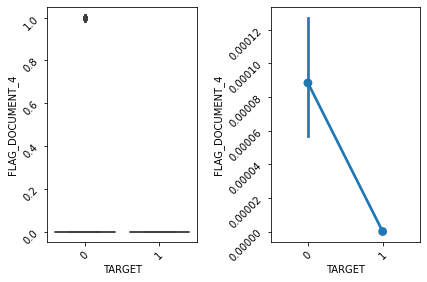

Confidence interval 95% untuk fitur FLAG_DOCUMENT_4 pada client yang tidak memiliki kesulitan pembayaran adalah (5.377186748272185e-05, 0.00012310282740842947)
Confidence interval 95% untuk fitur FLAG_DOCUMENT_4 pada client yang memiliki kesulitan pembayaran adalah (nan, nan)
Gagal menolak H(0)
**************************************************
82  FLAG_DOCUMENT_5


/usr/local/lib/python3.7/dist-packages/scipy/stats/_distn_infrastructure.py:2128: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/usr/local/lib/python3.7/dist-packages/scipy/stats/_distn_infrastructure.py:2129: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


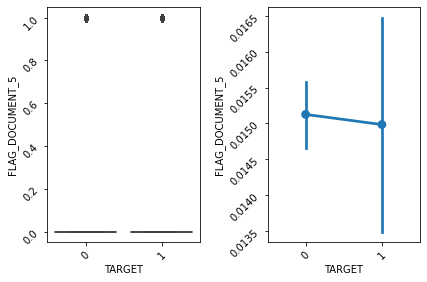

Confidence interval 95% untuk fitur FLAG_DOCUMENT_5 pada client yang tidak memiliki kesulitan pembayaran adalah (0.014676382946493179, 0.015576264867689342)
Confidence interval 95% untuk fitur FLAG_DOCUMENT_5 pada client yang memiliki kesulitan pembayaran adalah (0.013473486414500867, 0.016496302105136595)
Gagal menolak H(0)
**************************************************
83  FLAG_DOCUMENT_6


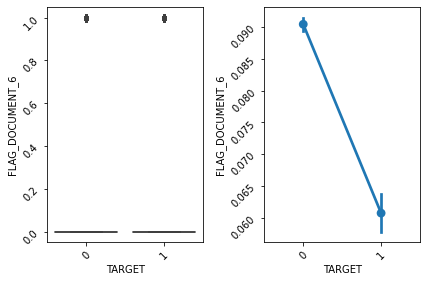

Confidence interval 95% untuk fitur FLAG_DOCUMENT_6 pada client yang tidak memiliki kesulitan pembayaran adalah (0.08939987466139003, 0.09151463826107518)
Confidence interval 95% untuk fitur FLAG_DOCUMENT_6 pada client yang memiliki kesulitan pembayaran adalah (0.05773431931065007, 0.06367554977293503)
Tolak H(0)
**************************************************
84  FLAG_DOCUMENT_7


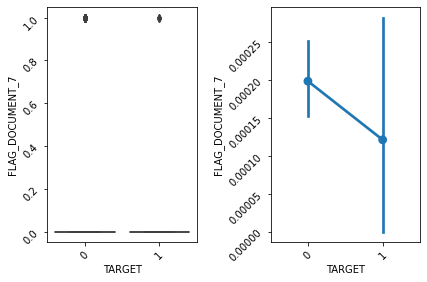

Confidence interval 95% untuk fitur FLAG_DOCUMENT_7 pada client yang tidak memiliki kesulitan pembayaran adalah (0.00014621996371967134, 0.0002499793528365076)
Confidence interval 95% untuk fitur FLAG_DOCUMENT_7 pada client yang memiliki kesulitan pembayaran adalah (-1.590275805639333e-05, 0.0002575946009566954)
Gagal menolak H(0)
**************************************************
85  FLAG_DOCUMENT_8


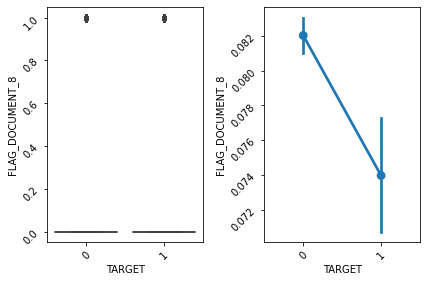

Confidence interval 95% untuk fitur FLAG_DOCUMENT_8 pada client yang tidak memiliki kesulitan pembayaran adalah (0.08101584553682611, 0.08303897146861455)
Confidence interval 95% untuk fitur FLAG_DOCUMENT_8 pada client yang memiliki kesulitan pembayaran adalah (0.07070203295863031, 0.07721337489635458)
Tolak H(0)
**************************************************
86  FLAG_DOCUMENT_9


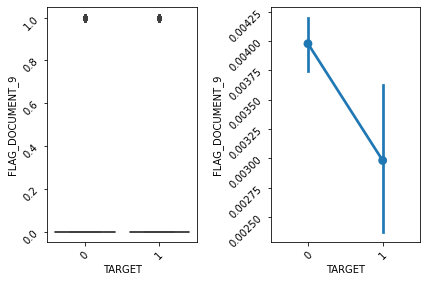

Confidence interval 95% untuk fitur FLAG_DOCUMENT_9 pada client yang tidak memiliki kesulitan pembayaran adalah (0.003744155716303895, 0.004208130566002268)
Confidence interval 95% untuk fitur FLAG_DOCUMENT_9 pada client yang memiliki kesulitan pembayaran adalah (0.002302668283308877, 0.0036590638415652417)
Tolak H(0)
**************************************************
87  FLAG_DOCUMENT_10


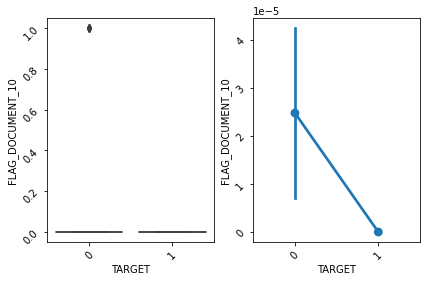

Confidence interval 95% untuk fitur FLAG_DOCUMENT_10 pada client yang tidak memiliki kesulitan pembayaran adalah (6.418625428181367e-06, 4.3106289141341e-05)
Confidence interval 95% untuk fitur FLAG_DOCUMENT_10 pada client yang memiliki kesulitan pembayaran adalah (nan, nan)
Gagal menolak H(0)
**************************************************
88  FLAG_DOCUMENT_11


/usr/local/lib/python3.7/dist-packages/scipy/stats/_distn_infrastructure.py:2128: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/usr/local/lib/python3.7/dist-packages/scipy/stats/_distn_infrastructure.py:2129: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


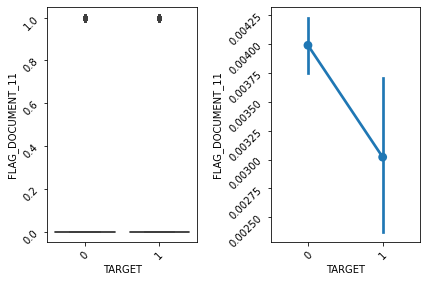

Confidence interval 95% untuk fitur FLAG_DOCUMENT_11 pada client yang tidak memiliki kesulitan pembayaran adalah (0.003757894920276714, 0.004222691313212033)
Confidence interval 95% untuk fitur FLAG_DOCUMENT_11 pada client yang memiliki kesulitan pembayaran adalah (0.002338397009922609, 0.003703899062584944)
Tolak H(0)
**************************************************
89  FLAG_DOCUMENT_12


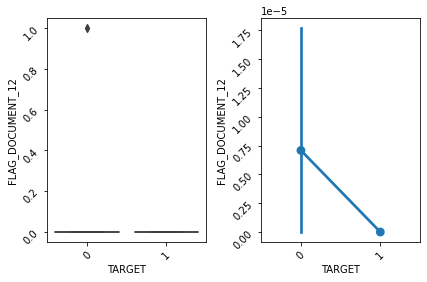

Confidence interval 95% untuk fitur FLAG_DOCUMENT_12 pada client yang tidak memiliki kesulitan pembayaran adalah (-2.730289487466731e-06, 1.6880265078758837e-05)
Confidence interval 95% untuk fitur FLAG_DOCUMENT_12 pada client yang memiliki kesulitan pembayaran adalah (nan, nan)
Gagal menolak H(0)
**************************************************
90  FLAG_DOCUMENT_13


/usr/local/lib/python3.7/dist-packages/scipy/stats/_distn_infrastructure.py:2128: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/usr/local/lib/python3.7/dist-packages/scipy/stats/_distn_infrastructure.py:2129: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


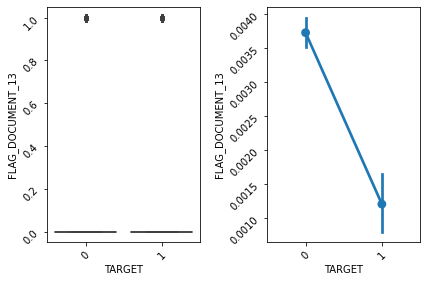

Confidence interval 95% untuk fitur FLAG_DOCUMENT_13 pada client yang tidak memiliki kesulitan pembayaran adalah (0.00350384314280704, 0.003953193993803899)
Confidence interval 95% untuk fitur FLAG_DOCUMENT_13 pada client yang memiliki kesulitan pembayaran adalah (0.0007762571749287701, 0.001640661254074251)
Tolak H(0)
**************************************************
91  FLAG_DOCUMENT_14


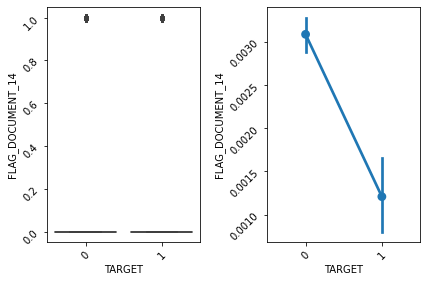

Confidence interval 95% untuk fitur FLAG_DOCUMENT_14 pada client yang tidak memiliki kesulitan pembayaran adalah (0.0028836904539439843, 0.0032927738916550195)
Confidence interval 95% untuk fitur FLAG_DOCUMENT_14 pada client yang memiliki kesulitan pembayaran adalah (0.0007762571749287701, 0.001640661254074251)
Tolak H(0)
**************************************************
92  FLAG_DOCUMENT_15


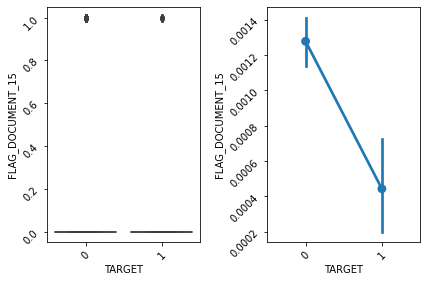

Confidence interval 95% untuk fitur FLAG_DOCUMENT_15 pada client yang tidak memiliki kesulitan pembayaran adalah (0.0011453847897649784, 0.0014086858044632467)
Confidence interval 95% untuk fitur FLAG_DOCUMENT_15 pada client yang memiliki kesulitan pembayaran adalah (0.00018129012701416196, 0.0007049132969536125)
Tolak H(0)
**************************************************
93  FLAG_DOCUMENT_16


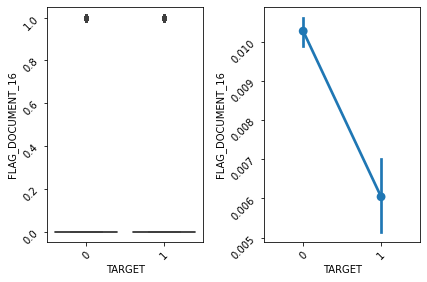

Confidence interval 95% untuk fitur FLAG_DOCUMENT_16 pada client yang tidak memiliki kesulitan pembayaran adalah (0.009897699654733505, 0.010640989916026985)
Confidence interval 95% untuk fitur FLAG_DOCUMENT_16 pada client yang memiliki kesulitan pembayaran adalah (0.005078204384608302, 0.007006387760406804)
Tolak H(0)
**************************************************
94  FLAG_DOCUMENT_17


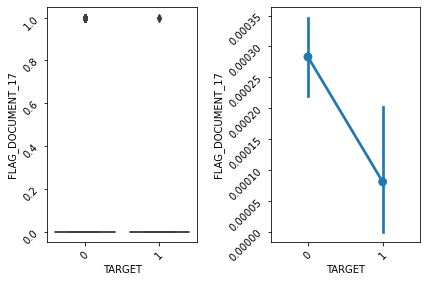

Confidence interval 95% untuk fitur FLAG_DOCUMENT_17 pada client yang tidak memiliki kesulitan pembayaran adalah (0.00022099404946263334, 0.00034500497418905087)
Confidence interval 95% untuk fitur FLAG_DOCUMENT_17 pada client yang memiliki kesulitan pembayaran adalah (-3.1093130717639155e-05, 0.00019222102598450723)
Gagal menolak H(0)
**************************************************
95  FLAG_DOCUMENT_18


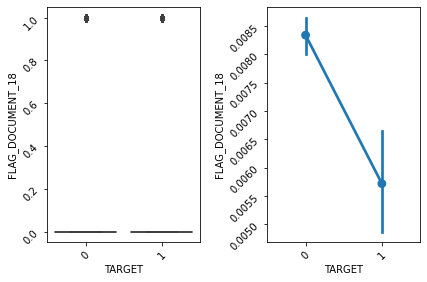

Confidence interval 95% untuk fitur FLAG_DOCUMENT_18 pada client yang tidak memiliki kesulitan pembayaran adalah (0.008006136972694691, 0.008676684249438701)
Confidence interval 95% untuk fitur FLAG_DOCUMENT_18 pada client yang memiliki kesulitan pembayaran adalah (0.00478185790214486, 0.006658222661802773)
Tolak H(0)
**************************************************
96  FLAG_DOCUMENT_19


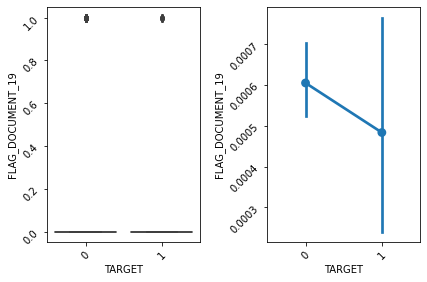

Confidence interval 95% untuk fitur FLAG_DOCUMENT_19 pada client yang tidak memiliki kesulitan pembayaran adalah (0.0005142728795166592, 0.0006955500335388157)
Confidence interval 95% untuk fitur FLAG_DOCUMENT_19 pada client yang memiliki kesulitan pembayaran adalah (0.0002099359138351559, 0.0007568314577660526)
Gagal menolak H(0)
**************************************************
97  FLAG_DOCUMENT_20


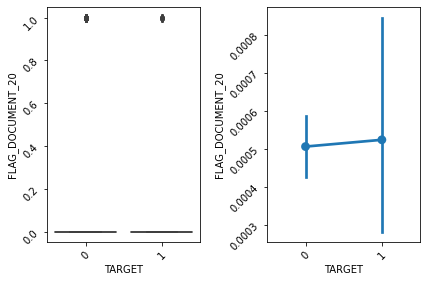

Confidence interval 95% untuk fitur FLAG_DOCUMENT_20 pada client yang tidak memiliki kesulitan pembayaran adalah (0.000422971164947503, 0.0005887520898298826)
Confidence interval 95% untuk fitur FLAG_DOCUMENT_20 pada client yang memiliki kesulitan pembayaran adalah (0.00023905793007834, 0.0008082733891563024)
Gagal menolak H(0)
**************************************************
98  FLAG_DOCUMENT_21


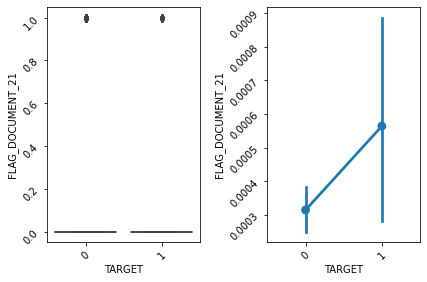

Confidence interval 95% untuk fitur FLAG_DOCUMENT_21 pada client yang tidak memiliki kesulitan pembayaran adalah (0.00024943766522494206, 0.00038023624858755657)
Confidence interval 95% untuk fitur FLAG_DOCUMENT_21 pada client yang memiliki kesulitan pembayaran adalah (0.00026860218622728327, 0.0008592930806407932)
Tolak H(0)
**************************************************
99  AMT_REQ_CREDIT_BUREAU_HOUR


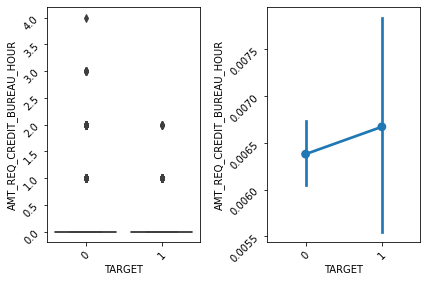

Confidence interval 95% untuk fitur AMT_REQ_CREDIT_BUREAU_HOUR pada client yang tidak memiliki kesulitan pembayaran adalah (0.006071120026867318, 0.0066886484069648075)
Confidence interval 95% untuk fitur AMT_REQ_CREDIT_BUREAU_HOUR pada client yang memiliki kesulitan pembayaran adalah (0.005615695045590617, 0.0077286774279885)
Gagal menolak H(0)
**************************************************
100  AMT_REQ_CREDIT_BUREAU_DAY


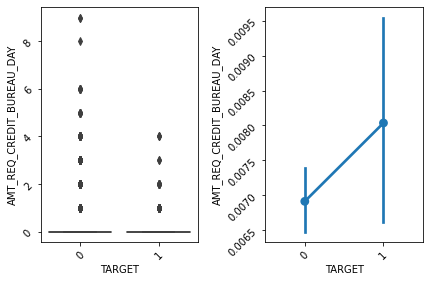

Confidence interval 95% untuk fitur AMT_REQ_CREDIT_BUREAU_DAY pada client yang tidak memiliki kesulitan pembayaran adalah (0.006504055489077633, 0.007323100981045687)
Confidence interval 95% untuk fitur AMT_REQ_CREDIT_BUREAU_DAY pada client yang memiliki kesulitan pembayaran adalah (0.0067087122326000646, 0.009362977242878432)
Gagal menolak H(0)
**************************************************
101  AMT_REQ_CREDIT_BUREAU_WEEK


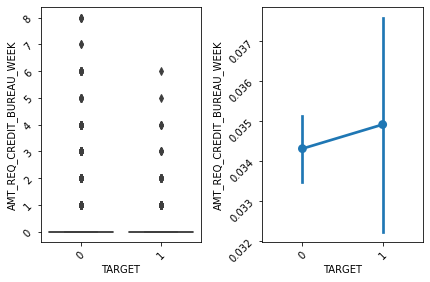

Confidence interval 95% untuk fitur AMT_REQ_CREDIT_BUREAU_WEEK pada client yang tidak memiliki kesulitan pembayaran adalah (0.033560530621570134, 0.035070075711870485)
Confidence interval 95% untuk fitur AMT_REQ_CREDIT_BUREAU_WEEK pada client yang memiliki kesulitan pembayaran adalah (0.03238235120734561, 0.03745644487700641)
Gagal menolak H(0)
**************************************************
102  AMT_REQ_CREDIT_BUREAU_MON


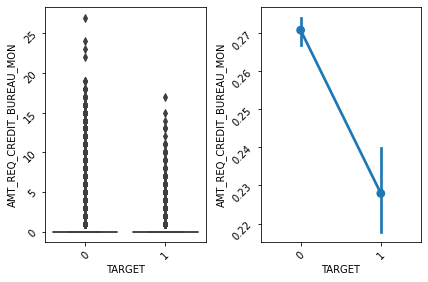

Confidence interval 95% untuk fitur AMT_REQ_CREDIT_BUREAU_MON pada client yang tidak memiliki kesulitan pembayaran adalah (0.26727305223710557, 0.27412082617028627)
Confidence interval 95% untuk fitur AMT_REQ_CREDIT_BUREAU_MON pada client yang memiliki kesulitan pembayaran adalah (0.21865645018506635, 0.2371951058466874)
Gagal menolak H(0)
**************************************************
103  AMT_REQ_CREDIT_BUREAU_QRT


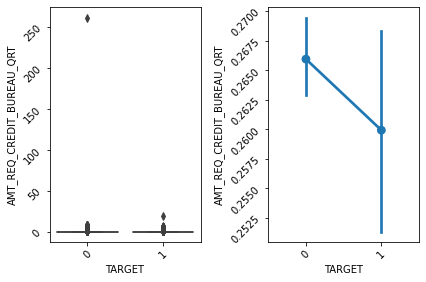

Confidence interval 95% untuk fitur AMT_REQ_CREDIT_BUREAU_QRT pada client yang tidak memiliki kesulitan pembayaran adalah (0.2629696773750912, 0.2689073367087273)
Confidence interval 95% untuk fitur AMT_REQ_CREDIT_BUREAU_QRT pada client yang memiliki kesulitan pembayaran adalah (0.2519142322428939, 0.2679318691548561)
Gagal menolak H(0)
**************************************************
104  AMT_REQ_CREDIT_BUREAU_YEAR


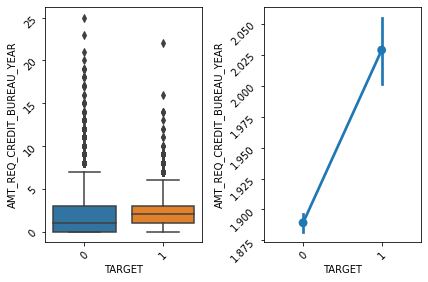

Confidence interval 95% untuk fitur AMT_REQ_CREDIT_BUREAU_YEAR pada client yang tidak memiliki kesulitan pembayaran adalah (1.8823303441234147, 1.8960684923421458)
Confidence interval 95% untuk fitur AMT_REQ_CREDIT_BUREAU_YEAR pada client yang memiliki kesulitan pembayaran adalah (2.0047229557333903, 2.0528429138424142)
Gagal menolak H(0)
**************************************************


In [103]:
n1 = len(train_num[train_num['TARGET']== 0])
n2 = len(train_num[train_num['TARGET']== 1])

a = 1
for col in train_num_nt.columns:
    print(a,'',col )
    fig, ax = plt.subplots(1,2)
    
    # buat boxplot
    sns.boxplot(data = train_num, x='TARGET', y=col, ax=ax[0])
    
    # buat pointplot
    sns.pointplot(data = train_num, x='TARGET', y=col, ax=ax[1])
    
    plt.tight_layout()
    ax[0].tick_params(rotation=45)
    ax[1].tick_params(rotation=45)
    plt.show()
    
    # confidence interval buyer memberi rating di bawah 5

    ci1 = t.interval(alpha = 0.95,
                    df = len(train_num[train_num['TARGET'] == 0]) - 1,
                    loc = train_num[train_num['TARGET'] == 0 ][col].mean(), 
                    scale = train_num[train_num['TARGET'] ==0 ][col].std()/(n1**(1/2)))
    
    print('Confidence interval 95% untuk fitur {} pada client yang tidak memiliki kesulitan pembayaran adalah {}'.format(col, ci1))
    
    # confidence interval buyer memberi rating 5
    
    ci2 = t.interval(alpha = 0.95,
                    df = len(train_num[train_num['TARGET'] ==1]) - 1,
                    loc = train_num[train_num['TARGET'] ==1][col].mean(), 
                    scale = train_num[train_num['TARGET'] ==1][col].std()/(n2**(1/2)))
    
    print('Confidence interval 95% untuk fitur {} pada client yang memiliki kesulitan pembayaran adalah {}'.format(col, ci2))
    
    # ind ttest
    
    stat, pvalue = ttest_ind(train_num[train_num['TARGET'] == 0][col],
                             train_num[train_num['TARGET'] == 1][col])
    
    if pvalue < 0.05:
        print('Tolak H(0)')
    else:
        print('Gagal menolak H(0)')
    print('*'*50)
    a += 1

### Univariat Kategorik

1
NAME_CONTRACT_TYPE


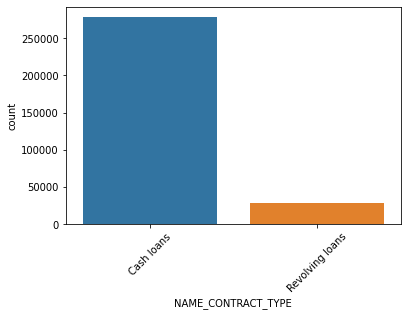

Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64
___________________________________________________________________________

2
CODE_GENDER


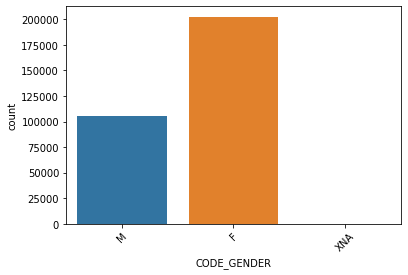

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64
___________________________________________________________________________

3
FLAG_OWN_CAR


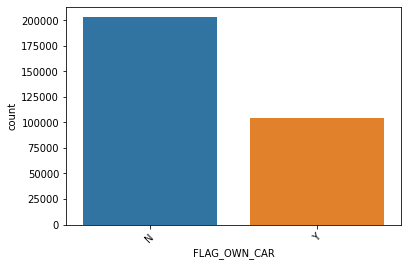

N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64
___________________________________________________________________________

4
FLAG_OWN_REALTY


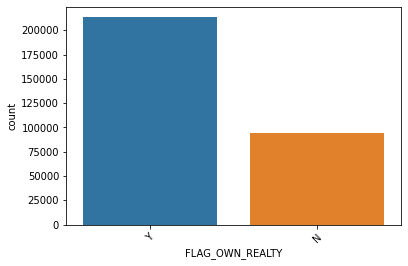

Y    213312
N     94199
Name: FLAG_OWN_REALTY, dtype: int64
___________________________________________________________________________

5
NAME_TYPE_SUITE


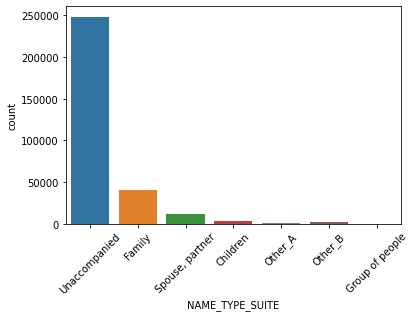

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64
___________________________________________________________________________

6
NAME_INCOME_TYPE


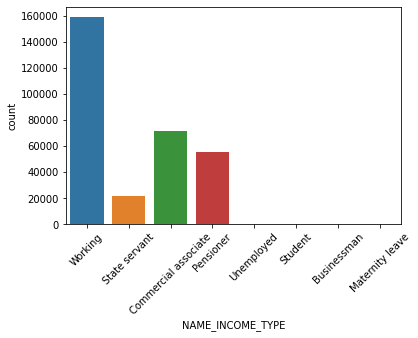

Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64
___________________________________________________________________________

7
NAME_EDUCATION_TYPE


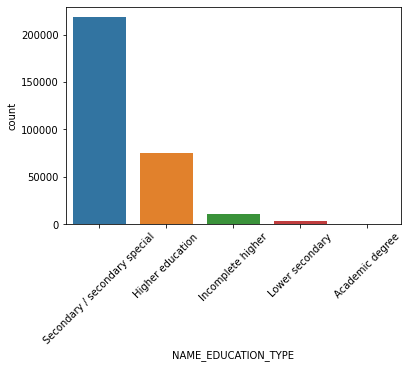

Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: NAME_EDUCATION_TYPE, dtype: int64
___________________________________________________________________________

8
NAME_FAMILY_STATUS


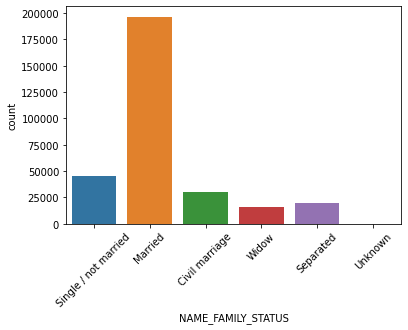

Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: NAME_FAMILY_STATUS, dtype: int64
___________________________________________________________________________

9
NAME_HOUSING_TYPE


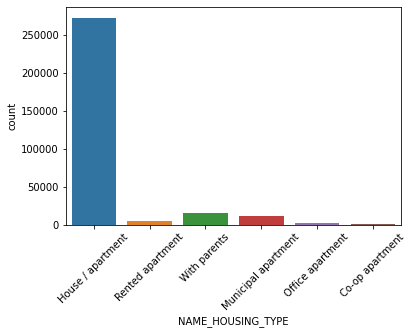

House / apartment      272868
With parents            14840
Municipal apartment     11183
Rented apartment         4881
Office apartment         2617
Co-op apartment          1122
Name: NAME_HOUSING_TYPE, dtype: int64
___________________________________________________________________________

10
OCCUPATION_TYPE


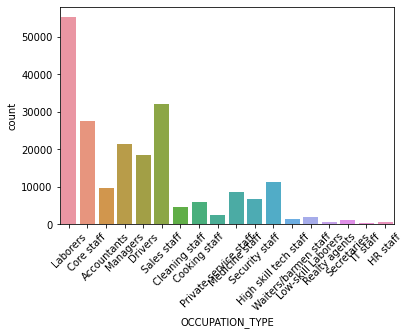

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64
___________________________________________________________________________

11
WEEKDAY_APPR_PROCESS_START


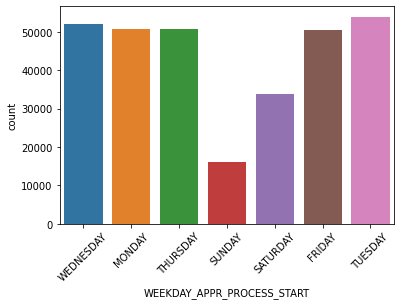

TUESDAY      53901
WEDNESDAY    51934
MONDAY       50714
THURSDAY     50591
FRIDAY       50338
SATURDAY     33852
SUNDAY       16181
Name: WEEKDAY_APPR_PROCESS_START, dtype: int64
___________________________________________________________________________

12
ORGANIZATION_TYPE


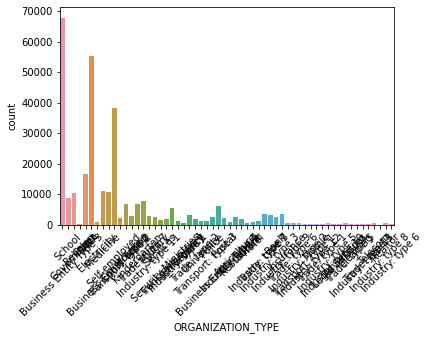

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

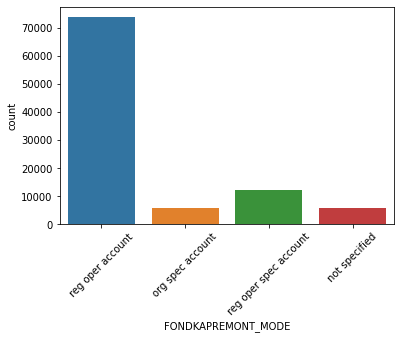

reg oper account         73830
reg oper spec account    12080
not specified             5687
org spec account          5619
Name: FONDKAPREMONT_MODE, dtype: int64
___________________________________________________________________________

14
HOUSETYPE_MODE


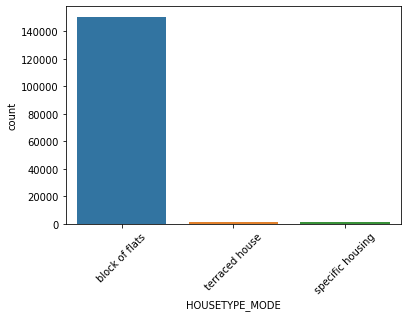

block of flats      150503
specific housing      1499
terraced house        1212
Name: HOUSETYPE_MODE, dtype: int64
___________________________________________________________________________

15
WALLSMATERIAL_MODE


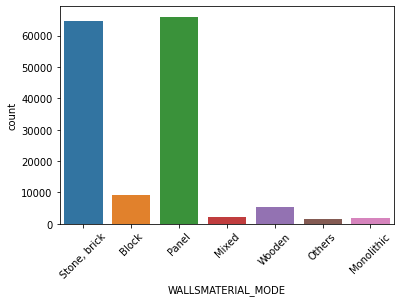

Panel           66040
Stone, brick    64815
Block            9253
Wooden           5362
Mixed            2296
Monolithic       1779
Others           1625
Name: WALLSMATERIAL_MODE, dtype: int64
___________________________________________________________________________

16
EMERGENCYSTATE_MODE


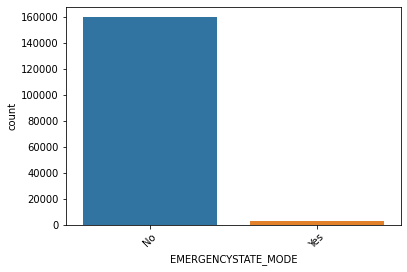

No     159428
Yes      2328
Name: EMERGENCYSTATE_MODE, dtype: int64
___________________________________________________________________________



In [104]:
a = 1
for col in train_cat.columns:
    print(a)
    print(col)
    sns.countplot(data = train_cat, x = col)
    plt.xticks(rotation=45)
    plt.show()
    print(train_cat[col].value_counts())
    #print(train_cat[col].value_counts(normalize=True))
    #print('unique values:{}'.format(train_cat[col].unique()))
    #print('unique values counts:{}.'.format(len(train_cat[col].unique())))
    print("_" * 75)
    print('')
    a += 1

### Multivariat Kategorik

In [105]:
# Kategorik dengan hue = 'TARGET'

1  NAME_CONTRACT_TYPE


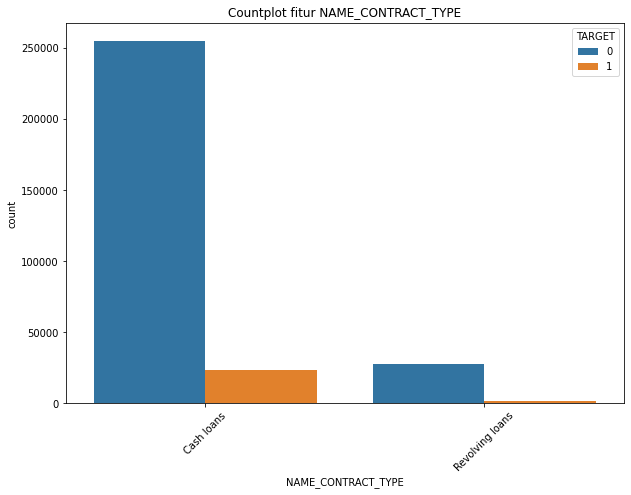

2  CODE_GENDER


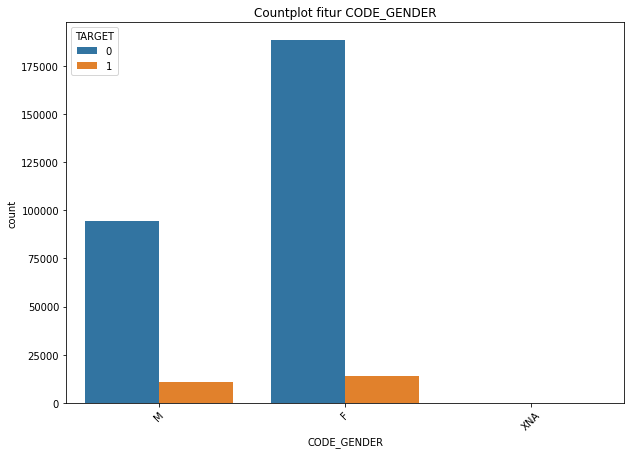

3  FLAG_OWN_CAR


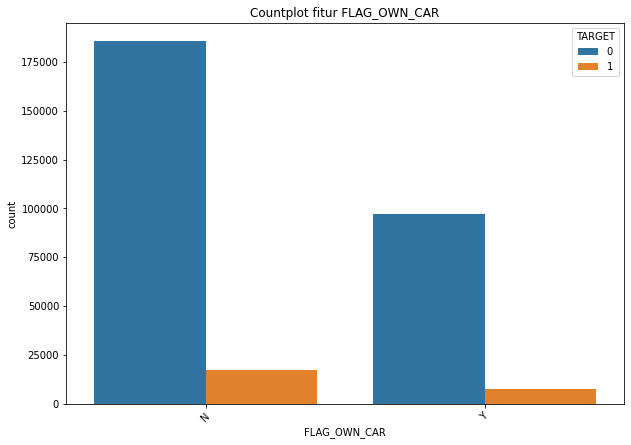

4  FLAG_OWN_REALTY


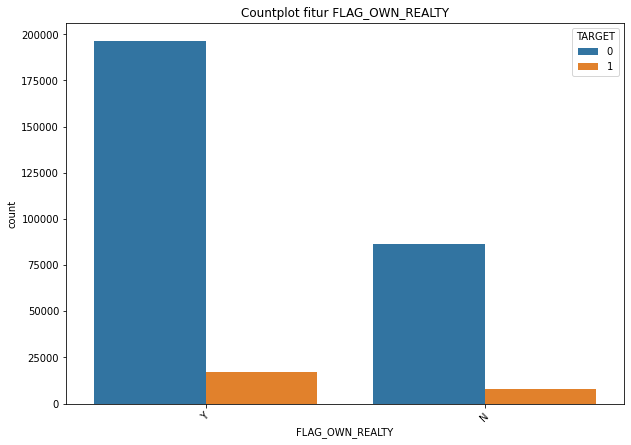

5  NAME_TYPE_SUITE


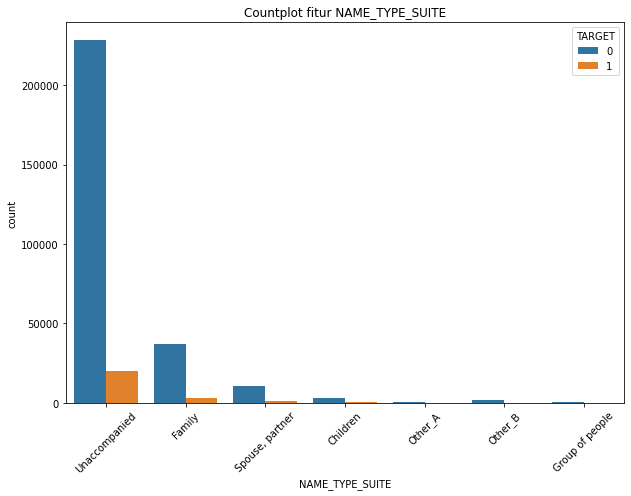

6  NAME_INCOME_TYPE


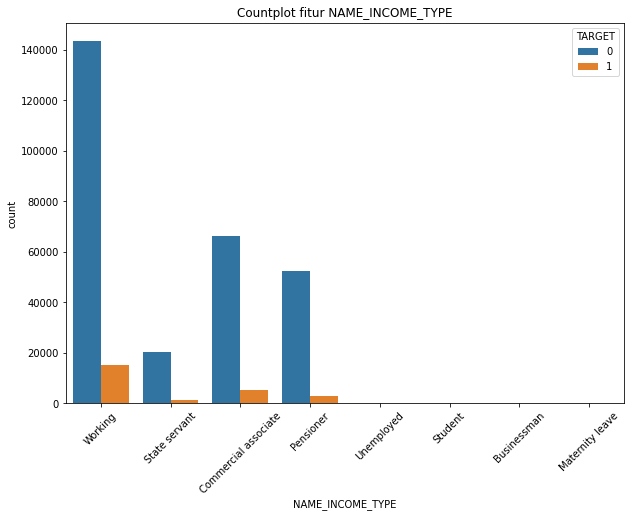

7  NAME_EDUCATION_TYPE


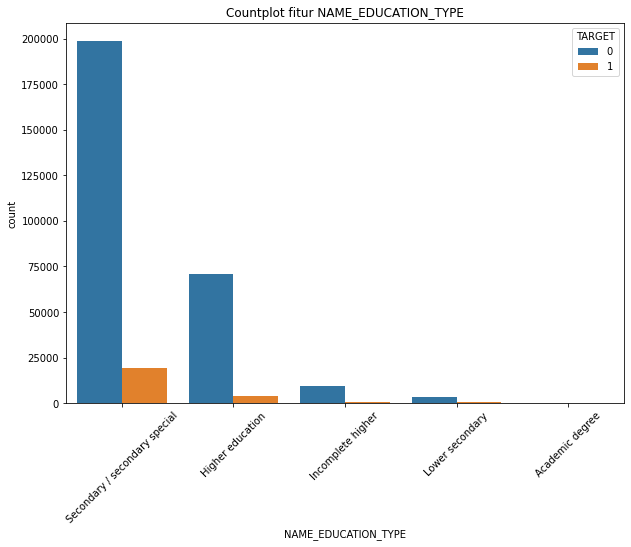

8  NAME_FAMILY_STATUS


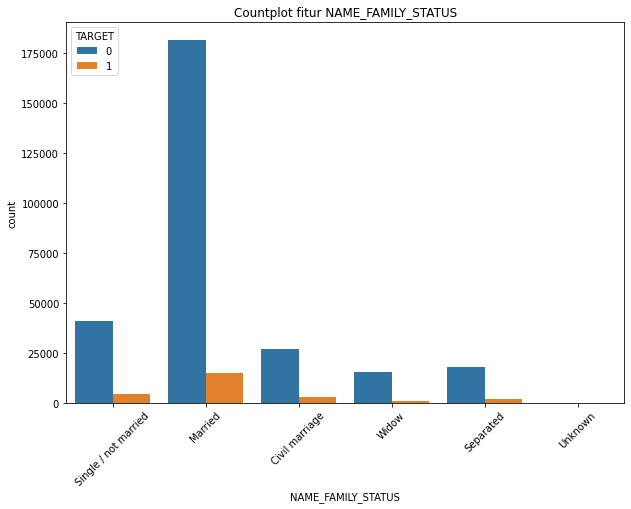

9  NAME_HOUSING_TYPE


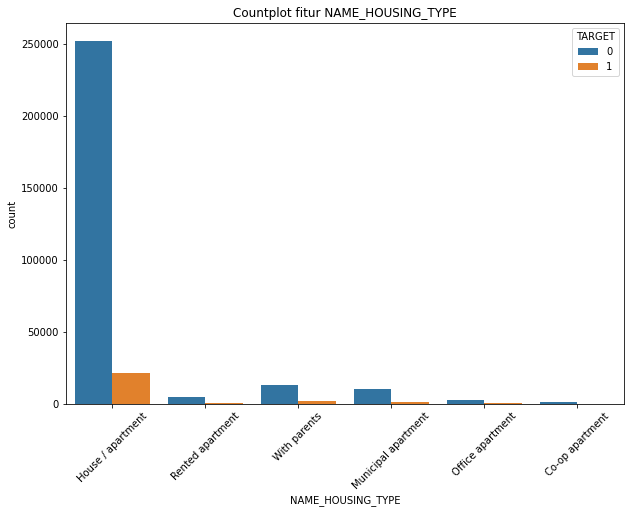

10  OCCUPATION_TYPE


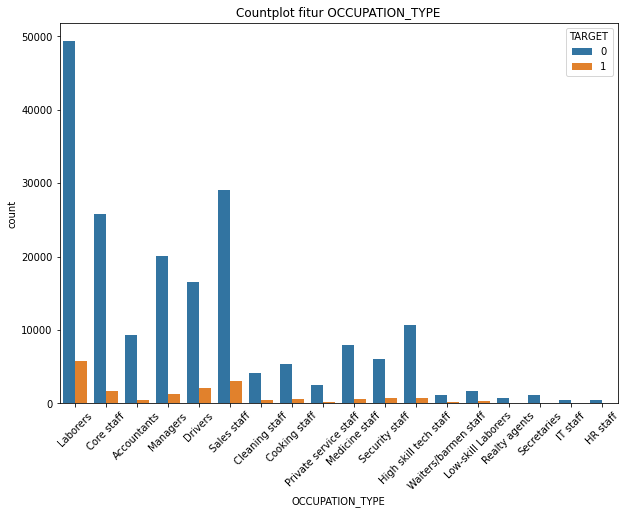

11  WEEKDAY_APPR_PROCESS_START


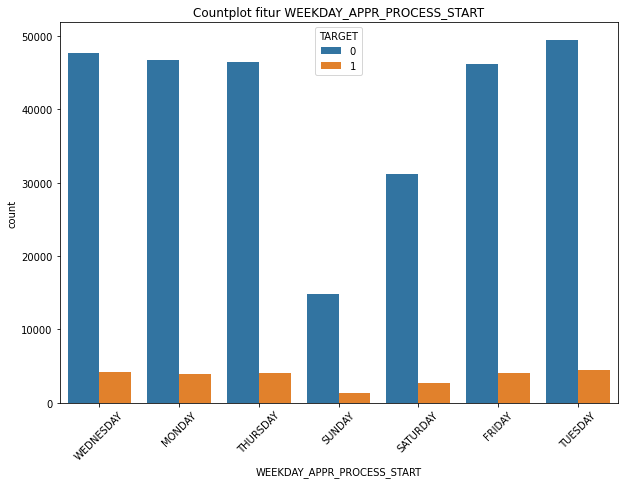

12  ORGANIZATION_TYPE


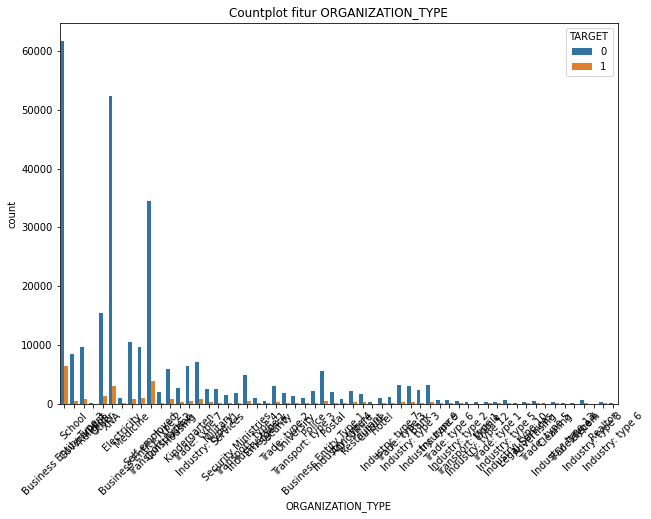

13  FONDKAPREMONT_MODE


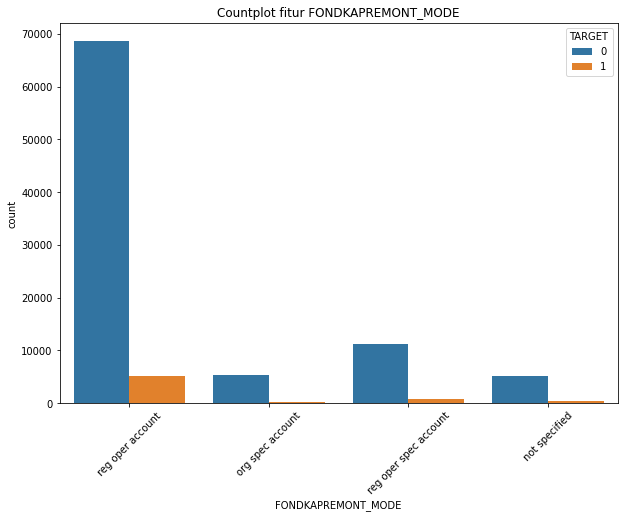

14  HOUSETYPE_MODE


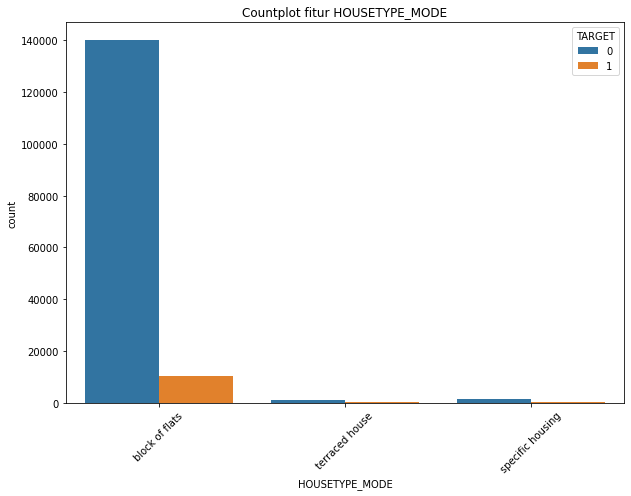

15  WALLSMATERIAL_MODE


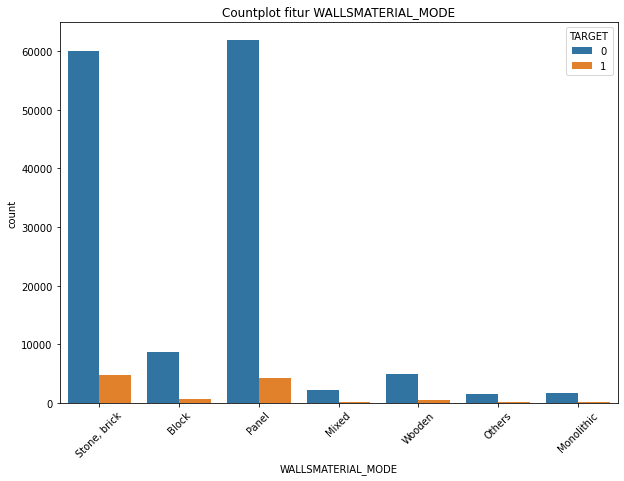

16  EMERGENCYSTATE_MODE


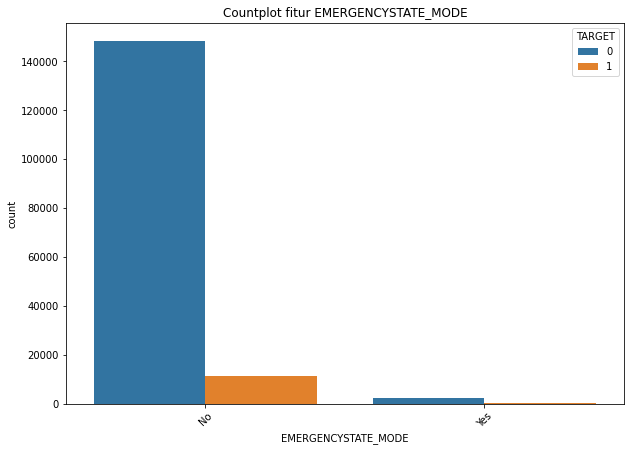

"\n      #buat stacked barplot \n      crt = pd.crosstab(index = train_cat[col], columns = train['TARGET'])\n      crt.plot(kind = 'bar', stacked = True)\n      plt.title('Stacked barplot kolom {}'.format(col))\n      plt.xticks(rotation = 45)\n      plt.show()\n"

In [106]:
a=1
for col in train_cat.columns:
      #countplot dengan hue attrition
      plt.figure(figsize = (10, 7))
      print(a,'',col)
      sns.countplot(data= train, x = col, hue = 'TARGET')
      plt.title('Countplot fitur {}'.format(col))
      plt.xticks(rotation = 45)
      plt.show()
      a+=1
'''
      #buat stacked barplot 
      crt = pd.crosstab(index = train_cat[col], columns = train['TARGET'])
      crt.plot(kind = 'bar', stacked = True)
      plt.title('Stacked barplot kolom {}'.format(col))
      plt.xticks(rotation = 45)
      plt.show()
'''

## Data Preprocessing

### Missing Value Handling

In [35]:
# Pisahkan Xtrain dan y train
X_train = train.drop(['TARGET'], axis =1)
y_train = train['TARGET']
X_test  = test

In [36]:
# Pishkan numerik dan kategorik pada x-train dan x-test
## Karena handling untuk numerik dan kategorik berbeda

X_train_num = X_train.select_dtypes('number')
X_train_cat = X_train.select_dtypes('object')
X_test_num = X_test.select_dtypes('number')
X_test_cat = X_test.select_dtypes('object')

#### Handling Numerik

In [60]:
# Persentase missing value x_train_num
pd.options.display.max_rows = None
X_train_num.isna().sum()/len(X_train_num)*100

CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
REGION_POPULATION_RELATIVE       0.000000
AGE                              0.000000
YEAR_EMPLOYED                    0.000000
YEAR_REGISTRATION                0.000000
YEAR_ID_PUBLISH                  0.000000
OWN_CAR_AGE                     65.990810
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0.000000
FLAG_WORK_PHONE                  0.000000
FLAG_CONT_MOBILE                 0.000000
FLAG_PHONE                       0.000000
FLAG_EMAIL                       0.000000
CNT_FAM_MEMBERS                  0.000650
REGION_RATING_CLIENT             0.000000
REGION_RATING_CLIENT_W_CITY      0.000000
HOUR_APPR_PROCESS_START          0.000000
REG_REGION_NOT_LIVE_REGION       0.000000
REG_REGION_NOT_WORK_REGION       0.000000
LIVE_REGION_NOT_WORK_REGION      0

In [61]:
# Persentase missing value X_test_num
pd.options.display.max_rows = None
mv_X_test_num = X_test_num.isna().sum()/len(X_test_num)*100
mv_X_test_num

CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.049237
AMT_GOODS_PRICE                  0.000000
REGION_POPULATION_RELATIVE       0.000000
AGE                              0.000000
YEAR_EMPLOYED                    0.000000
YEAR_REGISTRATION                0.000000
YEAR_ID_PUBLISH                  0.000000
OWN_CAR_AGE                     66.289184
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0.000000
FLAG_WORK_PHONE                  0.000000
FLAG_CONT_MOBILE                 0.000000
FLAG_PHONE                       0.000000
FLAG_EMAIL                       0.000000
CNT_FAM_MEMBERS                  0.000000
REGION_RATING_CLIENT             0.000000
REGION_RATING_CLIENT_W_CITY      0.000000
HOUR_APPR_PROCESS_START          0.000000
REG_REGION_NOT_LIVE_REGION       0.000000
REG_REGION_NOT_WORK_REGION       0.000000
LIVE_REGION_NOT_WORK_REGION      0

Oke, missing value kurang dari 10% lakukan simple imputer, 10-20%: lakukan knnimputer, >=30%: drop fitur

Karena pas knn lama banget ga jalan, jalan jadi >10% drop aja :(

1. '> 30%: Drop Feature'

- X_train_num

In [62]:
print('missing_value > 30% pada data X_train_num:')
print('')
dropmva30 = X_train_num.columns[(X_train_num.isna().sum()/len(X_train_num)*100) > 10]
dropmva30

missing_value > 30% pada data X_train_num:



Index(['OWN_CAR_AGE', 'EXT_SOURCE_1', 'EXT_SOURCE_3', 'APARTMENTS_AVG',
       'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG',
       'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG',
       'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG',
       'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG',
       'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE',
       'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE',
       'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE',
       'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE',
       'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI',
       'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI',
       'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI',
       'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI',
       'NONLIVINGAPARTMENTS_MEDI', 'NONLIVIN

In [63]:
X_train_num_h30 = X_train_num.drop(dropmva30, axis =1)
X_train_num_h30.shape

(307511, 52)

In [64]:
X_train_num_h30.isna().sum()/len(X_train_num_h30)*100

CNT_CHILDREN                   0.000000
AMT_INCOME_TOTAL               0.000000
AMT_CREDIT                     0.000000
AMT_ANNUITY                    0.003902
AMT_GOODS_PRICE                0.090403
REGION_POPULATION_RELATIVE     0.000000
AGE                            0.000000
YEAR_EMPLOYED                  0.000000
YEAR_REGISTRATION              0.000000
YEAR_ID_PUBLISH                0.000000
FLAG_MOBIL                     0.000000
FLAG_EMP_PHONE                 0.000000
FLAG_WORK_PHONE                0.000000
FLAG_CONT_MOBILE               0.000000
FLAG_PHONE                     0.000000
FLAG_EMAIL                     0.000000
CNT_FAM_MEMBERS                0.000650
REGION_RATING_CLIENT           0.000000
REGION_RATING_CLIENT_W_CITY    0.000000
HOUR_APPR_PROCESS_START        0.000000
REG_REGION_NOT_LIVE_REGION     0.000000
REG_REGION_NOT_WORK_REGION     0.000000
LIVE_REGION_NOT_WORK_REGION    0.000000
REG_CITY_NOT_LIVE_CITY         0.000000
REG_CITY_NOT_WORK_CITY         0.000000


- X_test_num

Mengikuti yang dari train karena jumlah kolom train dan test harus

In [65]:
X_test_num_h30 = X_test_num[X_train_num_h30.columns]
X_test_num_h30.shape

(48744, 52)

In [66]:
X_test_num_h30.isna().sum()/len(X_test_num_h30)*100

CNT_CHILDREN                   0.000000
AMT_INCOME_TOTAL               0.000000
AMT_CREDIT                     0.000000
AMT_ANNUITY                    0.049237
AMT_GOODS_PRICE                0.000000
REGION_POPULATION_RELATIVE     0.000000
AGE                            0.000000
YEAR_EMPLOYED                  0.000000
YEAR_REGISTRATION              0.000000
YEAR_ID_PUBLISH                0.000000
FLAG_MOBIL                     0.000000
FLAG_EMP_PHONE                 0.000000
FLAG_WORK_PHONE                0.000000
FLAG_CONT_MOBILE               0.000000
FLAG_PHONE                     0.000000
FLAG_EMAIL                     0.000000
CNT_FAM_MEMBERS                0.000000
REGION_RATING_CLIENT           0.000000
REGION_RATING_CLIENT_W_CITY    0.000000
HOUR_APPR_PROCESS_START        0.000000
REG_REGION_NOT_LIVE_REGION     0.000000
REG_REGION_NOT_WORK_REGION     0.000000
LIVE_REGION_NOT_WORK_REGION    0.000000
REG_CITY_NOT_LIVE_CITY         0.000000
REG_CITY_NOT_WORK_CITY         0.000000


2. Missing_Value < 10%: Simple Imputer strategy median      

- X_train_num

In [67]:
print('missing_value <10% pada data X_train_num:')
print('')
X_train_num_mv010 = X_train_num.columns[((X_train_num.isna().sum()/len(X_train_num)*100) <= 10) & ((X_train_num.isna().sum()/len(X_train_num)*100) > 0)]
X_train_num_mv010

missing_value <10% pada data X_train_num:



Index(['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'CNT_FAM_MEMBERS', 'EXT_SOURCE_2',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE'],
      dtype='object')

In [68]:
# X_train_num dengan missing_value > 0 & <=10

X_train_num_mvu10 = X_train_num_h30[X_train_num_mv010]
X_train_num_mvu10.isna().sum()/len(X_train_num_mvu10)*100

AMT_ANNUITY                 0.003902
AMT_GOODS_PRICE             0.090403
CNT_FAM_MEMBERS             0.000650
EXT_SOURCE_2                0.214626
OBS_30_CNT_SOCIAL_CIRCLE    0.332021
DEF_30_CNT_SOCIAL_CIRCLE    0.332021
OBS_60_CNT_SOCIAL_CIRCLE    0.332021
DEF_60_CNT_SOCIAL_CIRCLE    0.332021
DAYS_LAST_PHONE_CHANGE      0.000325
dtype: float64

In [69]:
X_train_num_mvu10.shape

(307511, 9)

In [70]:
# yang tanpa mv>0 & <=10

X_train_num_non_mvu10 = X_train_num_h30.drop(X_train_num_mv010, axis =1)
X_train_num_non_mvu10.isna().sum()/len(X_train_num_non_mvu10)*100

CNT_CHILDREN                   0.0
AMT_INCOME_TOTAL               0.0
AMT_CREDIT                     0.0
REGION_POPULATION_RELATIVE     0.0
AGE                            0.0
YEAR_EMPLOYED                  0.0
YEAR_REGISTRATION              0.0
YEAR_ID_PUBLISH                0.0
FLAG_MOBIL                     0.0
FLAG_EMP_PHONE                 0.0
FLAG_WORK_PHONE                0.0
FLAG_CONT_MOBILE               0.0
FLAG_PHONE                     0.0
FLAG_EMAIL                     0.0
REGION_RATING_CLIENT           0.0
REGION_RATING_CLIENT_W_CITY    0.0
HOUR_APPR_PROCESS_START        0.0
REG_REGION_NOT_LIVE_REGION     0.0
REG_REGION_NOT_WORK_REGION     0.0
LIVE_REGION_NOT_WORK_REGION    0.0
REG_CITY_NOT_LIVE_CITY         0.0
REG_CITY_NOT_WORK_CITY         0.0
LIVE_CITY_NOT_WORK_CITY        0.0
FLAG_DOCUMENT_2                0.0
FLAG_DOCUMENT_3                0.0
FLAG_DOCUMENT_4                0.0
FLAG_DOCUMENT_5                0.0
FLAG_DOCUMENT_6                0.0
FLAG_DOCUMENT_7     

In [71]:
X_train_num_non_mvu10.shape

(307511, 43)

In [72]:
# handling
# simple imputer (strategy = median) untuk X_train_num dengan mv>0 dan mv<= 10 

si_num = SimpleImputer(strategy='median')
X_train_num_mvu10_imp = pd.DataFrame(si_num.fit_transform(X_train_num_mvu10), columns=si_num.feature_names_in_)

In [73]:
X_train_num_mvu10_imp.isna().sum()/len(X_train_num_mvu10_imp)*100

AMT_ANNUITY                 0.0
AMT_GOODS_PRICE             0.0
CNT_FAM_MEMBERS             0.0
EXT_SOURCE_2                0.0
OBS_30_CNT_SOCIAL_CIRCLE    0.0
DEF_30_CNT_SOCIAL_CIRCLE    0.0
OBS_60_CNT_SOCIAL_CIRCLE    0.0
DEF_60_CNT_SOCIAL_CIRCLE    0.0
DAYS_LAST_PHONE_CHANGE      0.0
dtype: float64

In [74]:
# gabungkan lagi dengan yang sebelumnya
X_train_num_h10 = pd.concat([X_train_num_mvu10_imp, X_train_num_non_mvu10], axis =1)
X_train_num_h10.shape

(307511, 52)

In [75]:
X_train_num_h10.isna().sum()/len(X_train_num_h10)*100

AMT_ANNUITY                    0.0
AMT_GOODS_PRICE                0.0
CNT_FAM_MEMBERS                0.0
EXT_SOURCE_2                   0.0
OBS_30_CNT_SOCIAL_CIRCLE       0.0
DEF_30_CNT_SOCIAL_CIRCLE       0.0
OBS_60_CNT_SOCIAL_CIRCLE       0.0
DEF_60_CNT_SOCIAL_CIRCLE       0.0
DAYS_LAST_PHONE_CHANGE         0.0
CNT_CHILDREN                   0.0
AMT_INCOME_TOTAL               0.0
AMT_CREDIT                     0.0
REGION_POPULATION_RELATIVE     0.0
AGE                            0.0
YEAR_EMPLOYED                  0.0
YEAR_REGISTRATION              0.0
YEAR_ID_PUBLISH                0.0
FLAG_MOBIL                     0.0
FLAG_EMP_PHONE                 0.0
FLAG_WORK_PHONE                0.0
FLAG_CONT_MOBILE               0.0
FLAG_PHONE                     0.0
FLAG_EMAIL                     0.0
REGION_RATING_CLIENT           0.0
REGION_RATING_CLIENT_W_CITY    0.0
HOUR_APPR_PROCESS_START        0.0
REG_REGION_NOT_LIVE_REGION     0.0
REG_REGION_NOT_WORK_REGION     0.0
LIVE_REGION_NOT_WORK

- X_test_num

In [76]:
# dengan mv 10
X_test_num_mvu10 = X_test_num_h30[X_train_num_mvu10.columns]
# tanpa mv 10
X_test_num_non_mvu10 = X_test_num_h30[X_train_num_non_mvu10.columns]

In [77]:
print(X_test_num_mvu10.shape)
print(X_test_num_non_mvu10.shape)

(48744, 9)
(48744, 43)


In [78]:
# handling mengikuti train tanpa fit ulang langsung transform
# simple imputer (strategy = median) untuk X_train_num dengan mv>0 dan mv<= 10 

X_test_num_mvu10_imp = pd.DataFrame(si_num.transform(X_test_num_mvu10), columns=si_num.feature_names_in_)

X_train_num_mvu10_imp.isna().sum()/len(X_train_num_mvu10_imp)*100

AMT_ANNUITY                 0.0
AMT_GOODS_PRICE             0.0
CNT_FAM_MEMBERS             0.0
EXT_SOURCE_2                0.0
OBS_30_CNT_SOCIAL_CIRCLE    0.0
DEF_30_CNT_SOCIAL_CIRCLE    0.0
OBS_60_CNT_SOCIAL_CIRCLE    0.0
DEF_60_CNT_SOCIAL_CIRCLE    0.0
DAYS_LAST_PHONE_CHANGE      0.0
dtype: float64

In [79]:
# gabung lagi
X_test_num_h10 = pd.concat([X_test_num_mvu10_imp, X_test_num_non_mvu10], axis =1)
X_test_num_h10.shape

(48744, 52)

In [80]:
X_test_num_h10.isna().sum()/len(X_test_num_h10)*100

AMT_ANNUITY                    0.0
AMT_GOODS_PRICE                0.0
CNT_FAM_MEMBERS                0.0
EXT_SOURCE_2                   0.0
OBS_30_CNT_SOCIAL_CIRCLE       0.0
DEF_30_CNT_SOCIAL_CIRCLE       0.0
OBS_60_CNT_SOCIAL_CIRCLE       0.0
DEF_60_CNT_SOCIAL_CIRCLE       0.0
DAYS_LAST_PHONE_CHANGE         0.0
CNT_CHILDREN                   0.0
AMT_INCOME_TOTAL               0.0
AMT_CREDIT                     0.0
REGION_POPULATION_RELATIVE     0.0
AGE                            0.0
YEAR_EMPLOYED                  0.0
YEAR_REGISTRATION              0.0
YEAR_ID_PUBLISH                0.0
FLAG_MOBIL                     0.0
FLAG_EMP_PHONE                 0.0
FLAG_WORK_PHONE                0.0
FLAG_CONT_MOBILE               0.0
FLAG_PHONE                     0.0
FLAG_EMAIL                     0.0
REGION_RATING_CLIENT           0.0
REGION_RATING_CLIENT_W_CITY    0.0
HOUR_APPR_PROCESS_START        0.0
REG_REGION_NOT_LIVE_REGION     0.0
REG_REGION_NOT_WORK_REGION     0.0
LIVE_REGION_NOT_WORK

Lanjut kategorik, untuk yang missng value Numerik 10-30 % nanti dulu menggunakan knn inputer bersamaan dengan missng value kategorik 10-30% jika ada

#### Handling Kategorik

 X_train_cat

In [81]:
X_train_cat.isna().sum()/len(X_train_cat)*100

NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
FLAG_OWN_REALTY                0.000000
NAME_TYPE_SUITE                0.420148
NAME_INCOME_TYPE               0.000000
NAME_EDUCATION_TYPE            0.000000
NAME_FAMILY_STATUS             0.000000
NAME_HOUSING_TYPE              0.000000
OCCUPATION_TYPE               31.345545
WEEKDAY_APPR_PROCESS_START     0.000000
ORGANIZATION_TYPE              0.000000
FONDKAPREMONT_MODE            68.386172
HOUSETYPE_MODE                50.176091
WALLSMATERIAL_MODE            50.840783
EMERGENCYSTATE_MODE           47.398304
dtype: float64

 Missing Value > 30 %: drop feature

In [83]:
print('missing_value > 30% pada data X_train_cat:')
print('')
dropmva30 = X_train_cat.columns[(X_train_cat.isna().sum()/len(X_train_cat)*100) > 10]
dropmva30

missing_value > 30% pada data X_train_cat:



Index(['OCCUPATION_TYPE', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE',
       'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'],
      dtype='object')

In [84]:
X_train_cat_h = X_train_cat.drop(dropmva30, axis =1)
X_train_cat_h.shape

(307511, 11)

 Missing Value < 10%: simple imputer

In [85]:
print('missing_value <10% pada data X_train_cat:')
print('')
X_train_cat_mv10 = X_train_cat_h.columns[((X_train_cat_h.isna().sum()/len(X_train_cat_h)*100) <= 10) & ((X_train_cat_h.isna().sum()/len(X_train_cat_h)*100) > 0)]
X_train_cat_mv10

missing_value <10% pada data X_train_cat:



Index(['NAME_TYPE_SUITE'], dtype='object')

Lakukan simple imputer strategy most frequent pada koolom 

In [86]:
# simple imputer
simp = SimpleImputer(strategy='most_frequent')

X_train_cat_h['NAME_TYPE_SUITE'] = simp.fit_transform(X_train_cat_h[['NAME_TYPE_SUITE']])

In [87]:
X_train_cat_h.isna().sum()/len(X_train_cat_h)*100

NAME_CONTRACT_TYPE            0.0
CODE_GENDER                   0.0
FLAG_OWN_CAR                  0.0
FLAG_OWN_REALTY               0.0
NAME_TYPE_SUITE               0.0
NAME_INCOME_TYPE              0.0
NAME_EDUCATION_TYPE           0.0
NAME_FAMILY_STATUS            0.0
NAME_HOUSING_TYPE             0.0
WEEKDAY_APPR_PROCESS_START    0.0
ORGANIZATION_TYPE             0.0
dtype: float64

X_test_cat

In [88]:
X_test_cat.isna().sum()/len(X_test_cat)*100

NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
FLAG_OWN_REALTY                0.000000
NAME_TYPE_SUITE                1.868948
NAME_INCOME_TYPE               0.000000
NAME_EDUCATION_TYPE            0.000000
NAME_FAMILY_STATUS             0.000000
NAME_HOUSING_TYPE              0.000000
OCCUPATION_TYPE               32.014197
WEEKDAY_APPR_PROCESS_START     0.000000
ORGANIZATION_TYPE              0.000000
FONDKAPREMONT_MODE            67.284179
HOUSETYPE_MODE                48.455194
WALLSMATERIAL_MODE            49.017315
EMERGENCYSTATE_MODE           45.562531
dtype: float64

In [89]:
X_test_cat_h = X_test_cat[X_train_cat_h.columns]
X_test_cat_h.shape

(48744, 11)

In [90]:
X_test_cat_h.isna().sum()/len(X_test_cat_h)*100

NAME_CONTRACT_TYPE            0.000000
CODE_GENDER                   0.000000
FLAG_OWN_CAR                  0.000000
FLAG_OWN_REALTY               0.000000
NAME_TYPE_SUITE               1.868948
NAME_INCOME_TYPE              0.000000
NAME_EDUCATION_TYPE           0.000000
NAME_FAMILY_STATUS            0.000000
NAME_HOUSING_TYPE             0.000000
WEEKDAY_APPR_PROCESS_START    0.000000
ORGANIZATION_TYPE             0.000000
dtype: float64

In [91]:
# simple imputer NAME_TYPE_SUITE
 
X_test_cat_h['NAME_TYPE_SUITE'] = simp.transform(X_test_cat_h[['NAME_TYPE_SUITE']])               

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [92]:
X_test_cat_h.isna().sum()/len(X_test_cat_h)*100

NAME_CONTRACT_TYPE            0.0
CODE_GENDER                   0.0
FLAG_OWN_CAR                  0.0
FLAG_OWN_REALTY               0.0
NAME_TYPE_SUITE               0.0
NAME_INCOME_TYPE              0.0
NAME_EDUCATION_TYPE           0.0
NAME_FAMILY_STATUS            0.0
NAME_HOUSING_TYPE             0.0
WEEKDAY_APPR_PROCESS_START    0.0
ORGANIZATION_TYPE             0.0
dtype: float64

#### Last Handlling
KNNImputer untuk numerik, kategorik tidak karena sudah tidak ada missing value

In [54]:
## 

print(X_train_num_h10.shape)
print(X_test_num_h10.shape)
print(X_train_cat_h.shape)
print(X_test_cat_h.shape)

(307511, 59)
(48744, 59)
(307511, 11)
(48744, 11)


- X_train

In [55]:
'''
#encode semua fitur kategorik
oe = OrdinalEncoder()
X_train_cat_h_enc = pd.DataFrame(oe.fit_transform(X_train_cat_h), columns = oe.feature_names_in_)
'''

'\n#encode semua fitur kategorik\noe = OrdinalEncoder()\nX_train_cat_h_enc = pd.DataFrame(oe.fit_transform(X_train_cat_h), columns = oe.feature_names_in_)\n'

In [56]:
'''
#gabungkan X_train numerik dan kategorik yang telah diencode untuk fit KNNImputer
X_train_mix = pd.concat([X_train_num_h10, X_train_cat_h_enc], axis=1)
'''

'\n#gabungkan X_train numerik dan kategorik yang telah diencode untuk fit KNNImputer\nX_train_mix = pd.concat([X_train_num_h10, X_train_cat_h_enc], axis=1)\n'

In [57]:
# X_train_mix.isna().sum()/len(X_train_mix)*100

In [58]:
knn_imp = KNNImputer(n_neighbors =5)

In [59]:
X_train_num_knn = pd.DataFrame(knn_imp.fit_transform(X_train_num_h10), columns=knn_imp.feature_names_in_)

KeyboardInterrupt: ignored

In [ ]:
X_train_num_knn.to_csv('X_train_num_knn.csv', index = False)
files.download('X_train_num_knn.csv')

In [ ]:
#pisahkan lagi untuk inverse encode
X_train_num_knn = X_train_mix_knn[X_train_num_h10.columns]
X_train_cat_knn = X_train_mix_knn[X_train_num_h10.columns]

In [ ]:
churn_obj_imp.head()

In [ ]:
# Kembalikan yang sudah dimputasi menjadi kategorik
churn_obj_imp[oe.feature_names_in_]  = oe.inverse_transform(churn_obj_imp[oe.feature_names_in_])

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [ ]:
churn_obj_imp.head()

In [ ]:
churn_final= pd.concat([churn_num_imp, churn_obj_imp], axis = 1)

In [ ]:
churn_final.head()

## Feature Engineering

#### Transformasi

In [104]:
print(X_train_num_h10.shape)
print(X_test_num_h10.shape)
print(X_train_cat_h.shape)
print(X_test_cat_h.shape)

(307511, 52)
(48744, 52)
(307511, 11)
(48744, 11)


- X_train

In [105]:
# Scaling untuk fitur numerik
minmax = MinMaxScaler()
X_train_num_scaled = pd.DataFrame(minmax.fit_transform(X_train_num_h10), columns = minmax.feature_names_in_)

In [106]:
# OneHotEncoder
ohe = OneHotEncoder(handle_unknown = 'ignore')
X_train_cat_ohe = pd.DataFrame(ohe.fit_transform(X_train_cat_h).toarray(), columns=ohe.get_feature_names_out(ohe.feature_names_in_))

In [114]:
# merge
X_train_transformed = pd.concat([X_train_num_scaled, X_train_cat_ohe], axis =1)

In [115]:
X_train_transformed.shape

(307511, 158)

In [ ]:
# X_train_transformed.isna().sum()

X_test

In [117]:
# Scaling untuk fitur numerik
X_test_num_scaled = pd.DataFrame(minmax.transform(X_test_num_h10), columns = minmax.feature_names_in_)

# Encode fitur kategorik
X_test_cat_ohe = pd.DataFrame(ohe.transform(X_test_cat_h).toarray(), columns=ohe.get_feature_names_out(ohe.feature_names_in_))

In [118]:
# merge
X_test_transformed = pd.concat([X_test_num_scaled, X_test_cat_ohe], axis =1)

In [119]:
X_test_transformed.shape

(48744, 158)

#### Feature Selection

- Multicolinearity Reduction

In [122]:
feature_comb = list(itertools.combinations(X_train_transformed.columns, 2))

In [123]:
drop = []
for a, b in feature_comb:     
    coef, pvalue = spearmanr(X_train_transformed[a], X_train_transformed[b])
    if pvalue < 0.05:
        if coef > 0.8:
             if b not in drop and a not in drop:
                 drop.append(b)
        elif coef < -0.8:
             if b not in drop and a not in drop:
                 drop.append(b)
        
drop

['AMT_GOODS_PRICE',
 'AMT_CREDIT',
 'CNT_CHILDREN',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'NAME_INCOME_TYPE_Pensioner',
 'ORGANIZATION_TYPE_XNA',
 'REGION_RATING_CLIENT_W_CITY',
 'LIVE_REGION_NOT_WORK_REGION',
 'LIVE_CITY_NOT_WORK_CITY',
 'NAME_CONTRACT_TYPE_Revolving loans',
 'CODE_GENDER_M',
 'FLAG_OWN_CAR_Y',
 'FLAG_OWN_REALTY_Y',
 'NAME_TYPE_SUITE_Unaccompanied',
 'NAME_EDUCATION_TYPE_Secondary / secondary special']

In [125]:
 X_train_sel = X_train_transformed.drop(drop, axis=1)

In [126]:
 X_train_sel.shape

(307511, 142)

In [127]:
X_train_sel.to_csv('X_train_sel.csv', index = False)
files.download('X_train_sel.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Mutual Infromation

In [128]:
mi = mutual_info_classif(X_train_sel, y_train, random_state=42)
X_train_sel_mi = pd.DataFrame({'feature': X_train_sel.columns, 'mi': mi}).sort_values('mi', ascending=False)

In [132]:
X_train_sel_mi.head()

feature        mi
15                     FLAG_CONT_MOBILE  0.065498
12                           FLAG_MOBIL  0.065145
44        NAME_CONTRACT_TYPE_Cash loans  0.054595
73  NAME_HOUSING_TYPE_House / apartment  0.050657
13                       FLAG_EMP_PHONE  0.044827

In [133]:
# drop fitur dengan mi =0
X_train_sel_mi([mi])

TypeError: ignored

In [134]:
mi_0 = X_train_sel_mi['mi'] == 0
X_train_sel_mi0 = X_train_sel_mi[mi_0]

In [136]:
X_train_sel_mi0.head()

feature   mi
130      ORGANIZATION_TYPE_Trade: type 1  0.0
120             ORGANIZATION_TYPE_Postal  0.0
138  ORGANIZATION_TYPE_Transport: type 2  0.0
24                       FLAG_DOCUMENT_2  0.0
26                       FLAG_DOCUMENT_4  0.0

In [137]:
drop2 = X_train_sel_mi0['feature'].unique()

In [138]:
drop2

array(['ORGANIZATION_TYPE_Trade: type 1', 'ORGANIZATION_TYPE_Postal',
       'ORGANIZATION_TYPE_Transport: type 2', 'FLAG_DOCUMENT_2',
       'FLAG_DOCUMENT_4', 'ORGANIZATION_TYPE_Police',
       'ORGANIZATION_TYPE_Trade: type 6', 'FLAG_DOCUMENT_14',
       'ORGANIZATION_TYPE_Realtor', 'FLAG_DOCUMENT_5',
       'ORGANIZATION_TYPE_Restaurant', 'ORGANIZATION_TYPE_Trade: type 2',
       'ORGANIZATION_TYPE_Security',
       'ORGANIZATION_TYPE_Security Ministries', 'FLAG_DOCUMENT_13',
       'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_11',
       'NAME_HOUSING_TYPE_Co-op apartment', 'ORGANIZATION_TYPE_Insurance',
       'ORGANIZATION_TYPE_Culture',
       'NAME_EDUCATION_TYPE_Incomplete higher',
       'NAME_INCOME_TYPE_Unemployed', 'NAME_INCOME_TYPE_Student',
       'NAME_INCOME_TYPE_Maternity leave', 'NAME_INCOME_TYPE_Businessman',
       'NAME_TYPE_SUITE_Other_B', 'NAME_TYPE_SUITE_Group of people',
       'ORGANIZATION_TYPE_Advertising', 'ORGANIZATION_TYPE_Agriculture',
       'ORGANIZATION_TYPE_

In [139]:
# feature selection2 (mi)
X_train_sel2 = X_train_sel.drop(drop2, axis=1)

In [140]:
X_train_sel2.to_csv('X_train_sel2.csv', index = False)
files.download('X_train_sel2.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [141]:
X_train_sel2.shape

(307511, 97)

X_test

In [142]:
X_test_sel = X_test_transformed[X_train_sel2.columns]

In [143]:
X_test_sel.shape

(48744, 97)

In [144]:
X_test_sel.to_csv('X_test_sel.csv', index = False)
files.download('X_test_sel.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Model

In [18]:
X_train_sel2 = pd.read_csv('/content/gdrive/MyDrive/Bambams_DSJ/Rakamin_Academy/VIX-DS-HCI/Final_Task/home-credit-default-risk/X_train_sel2.csv', delimiter = ',')
X_test_sel = pd.read_csv('/content/gdrive/MyDrive/Bambams_DSJ/Rakamin_Academy/VIX-DS-HCI/Final_Task/home-credit-default-risk/X_test_sel.csv', delimiter = ',')

### Logistic Regression

In [21]:
print(X_train_sel2.shape)
print(X_test_sel.shape)

(307511, 97)
(48744, 97)


In [38]:
print(y_train.shape)

(307511,)


In [39]:
param_grid = {'penalty': ['l1', 'l2', 'elasticnet', 'none']}
logreg = LogisticRegression(random_state=42, solver='saga')
gscv = GridSearchCV(logreg, param_grid, cv=5, return_train_score=False)

In [40]:
gscv1 = gscv.fit(X_train_sel2, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter

In [41]:
gscv1.best_params_

{'penalty': 'l2'}

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter

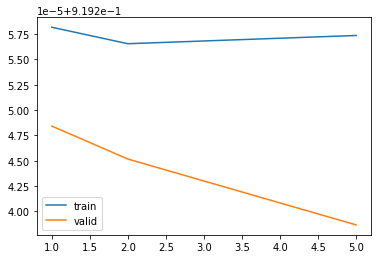

In [42]:
# C
c = [1, 2, 5]
train = []
valid = []

for par in c:
    logreg2 = LogisticRegression(random_state=42,
                                 penalty='l2',
                                 C=par,
                                 solver='saga')
    result = cross_validate(logreg2, X_train_sel2, y_train, cv=5, return_train_score=True)
    train.append(result['train_score'].mean())
    valid.append(result['test_score'].mean())

sns.lineplot(x = c, y = train, label = 'train')
sns.lineplot( x = c, y = valid, label = 'valid')
plt.show()

In [43]:
logreg_final = LogisticRegression(C=1, penalty = 'l2', random_state=42, solver='saga')
logreg_final.fit(X_train_sel2, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


LogisticRegression(C=1, random_state=42, solver='saga')

In [44]:
# treshold
y_pred_train = logreg_final.predict_proba(X_train_sel2)[:,1]
fpr, tpr, thre_roc = roc_curve(y_train, y_pred_train)

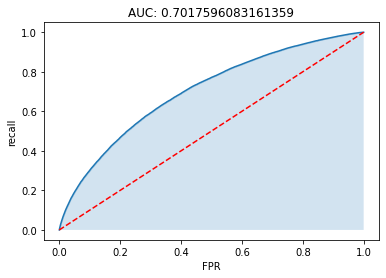

In [45]:
sns.lineplot(x = fpr, y = tpr)
plt.plot([0, 1], [0,1], color='red', linestyle='--')
plt.fill_between(fpr, 0, tpr, alpha=0.2)
plt.xlabel('FPR')
plt.ylabel('recall')
plt.title('AUC: {}'.format(roc_auc_score(y_train, y_pred_train)))
plt.show()

In [55]:
roc_auc_score(y_train, y_pred_train)

0.7017596083161359

In [56]:
np.argmax((1-fpr)*tpr)

25854

In [57]:
thre_roc[25854] 

0.08144410359564315

In [62]:
classif_pr(X_train_sel2, y_train, logreg_final, thre_roc[25854] )

              precision    recall  f1-score   support

           1       0.14      0.63      0.23     24825
           0       0.95      0.67      0.79    282686

    accuracy                           0.66    307511
   macro avg       0.55      0.65      0.51    307511
weighted avg       0.89      0.66      0.74    307511



### Adaboost

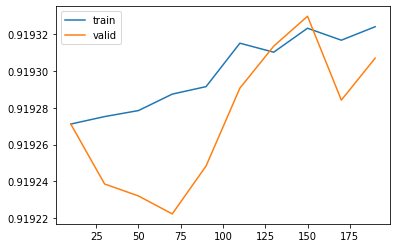

In [64]:
params = np.arange(10,200,20)
train = []
valid = []

for par in params:
    ada2 = AdaBoostClassifier(random_state=42,
                                n_estimators=par)
    result = cross_validate(ada2, X_train_sel2, y_train, cv=5, return_train_score=True)
    train.append(result['train_score'].mean())
    valid.append(result['test_score'].mean())

sns.lineplot(x = params, y = train, label = 'train')
sns.lineplot( x = params, y = valid, label = 'valid')
plt.show()

In [65]:
params[np.argmax(valid)]

150

In [66]:
ada_final = AdaBoostClassifier(n_estimators= 150)

In [67]:
ada_final.fit(X_train_sel2, y_train)

AdaBoostClassifier(n_estimators=150)

In [69]:
classif_pr(X_train_sel2, y_train, ada_final, thre_roc[25854] )

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       0.08      1.00      0.15     24825
           0       0.00      0.00      0.00    282686

    accuracy                           0.08    307511
   macro avg       0.04      0.50      0.07    307511
weighted avg       0.01      0.08      0.01    307511



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Evaluasi


Memprediksi kolom target pada test set menggunakan model final yang dibuat: Logistic Regression



In [71]:
y_pred = logreg_final.predict_proba(X_test_sel)[:,1] > thre_roc[25854] 

In [72]:
y_pred

array([False,  True, False, ..., False,  True, False])

In [73]:
y_pred_int = y_pred.astype(int)

In [74]:
target_test = pd.DataFrame(y_pred_int, columns= ['label'])
target_test.head()

label
0      0
1      1
2      0
3      0
4      1